#Business Problem: Predicting Used Car Resale Prices

Scenario:

You work for a used car dealership that wants to predict the resale prices of cars based on several features such as the car's age, mileage, brand, fuel type, etc. 

The goal is to help the dealership price their cars competitively and provide accurate quotes to customers.

Exploratory Data Analysis:

        Understanding the data 
            a. df.shape - rows and column number 
            b. df.head() - check to give 5 rows 
            c. df.columns - what all columns 
            d. df.info() - column name, dtypes 
            e. df.describe() - summary satistics 
            f. df.isnull().sum() - check for missing 
            g. df.column_name.value_counts() - check the number of each unique data under column 
            h. df.duplicated.sum() - Check for duplication 
            i. df.plot(kind = 'box') - Check for outlier 
            j. df.corr() - Correlation

Visualization (univariate and bivariate) (Descriptive Analytics - what is happening in the past):

        Univariate 
            a. Histogram 
            b. Pie chart 
            c. Box plot

        Bivariate: 
            a. Scatter Plot 
            b. Bar Plot 
            c. Pair Plot

Data Preprocessing:

        Handling Missing values
        Handling Outlier values
        Remove Noisy data
        Dropping unwanted columns
        Dropping Duplicates
        Encoding of Categorical data
        Feature scaling on Numerical data(Standardisation/ Normalisation)
        Feature Engineering
        Feature Selection

Split the data:

        Train and Test Spilt

Model:

        Model on Train data
        Finetune the Model
        Finalize the Model

Predict the result:

        Predict the Train
        Predict the Test


Evalution:

        Evaluation of Train data (Error Metrics)
        Evaluation of Test data


Comparison:

        Compare the train and test results based on that take the decision to iterate the step from Data preprocessing
        
Deploy the Model

End Point

Monitoring

Retraining (on sufficient interval)

In [519]:
# importing required packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [520]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.feature_selection import SelectKBest,f_regression

In [388]:
os.getcwd()

'/Users/bkannadasan/Documents/GitHub/DataScience/MachineLearning/Linear_regression_practice'

In [475]:
# Creating pandas dataframe from the given dataset "used_car_prices_dataset_final.csv" and assigning to variable orig_Data
# Hence orig_Data will be considered as the original dataset
orig_Data=pd.read_csv('../LinearRegression/Dataset/used_car_prices_dataset_final.csv')

In [390]:
orig_Data.shape

(4666, 10)

In [391]:
orig_Data

CarAge       Mileage     Brand  FuelType Transmission  OwnerCount  \
0         15  70539.725266     Honda  Electric       Manual         3.0   
1         11  72118.008487     Honda  Electric    Automatic         4.0   
2          8  38721.050239      Ford    Hybrid       Manual         2.0   
3          7  33675.655109       Kia    Petrol    Automatic         3.0   
4         19  51562.861259  Mercedes    Petrol    Automatic         4.0   
...      ...           ...       ...       ...          ...         ...   
4661       4  22710.582928      Audi    Hybrid       Manual         2.0   
4662       4  66193.150603   Hyundai    Diesel    Automatic         4.0   
4663       1  54614.234981      Ford  Electric    Automatic         2.0   
4664       7  52035.766674    Toyota    Hybrid       Manual         4.0   
4665      18  56126.950679    Toyota    Petrol       Manual         1.0   

      EngineSize  Horsepower CarCondition   ResalePrice  
0       1.858776  116.781923         Poor  37380.232721  
1       2.464409  150.064915         Fair  58279.184367  
2       1.666394  140.577568         Fair  52420.515613  
3       2.799322  157.020208         Poor  54195.804720  
4       2.423886  196.907490         Fair  57287.511089  
...          ...         ...          ...           ...  
4661    1.839159  170.177585         Fair  56808.958580  
4662    1.838883  162.177454         Poor  56224.633133  
4663    2.478123  178.078306    Excellent  68440.018358  
4664    1.629055  191.210803    Excellent  64847.894059  
4665    0.988205  173.368420         Fair  43329.185500  

[4666 rows x 10 columns]

In [392]:
orig_Data.head()

CarAge       Mileage     Brand  FuelType Transmission  OwnerCount  \
0      15  70539.725266     Honda  Electric       Manual         3.0   
1      11  72118.008487     Honda  Electric    Automatic         4.0   
2       8  38721.050239      Ford    Hybrid       Manual         2.0   
3       7  33675.655109       Kia    Petrol    Automatic         3.0   
4      19  51562.861259  Mercedes    Petrol    Automatic         4.0   

   EngineSize  Horsepower CarCondition   ResalePrice  
0    1.858776  116.781923         Poor  37380.232721  
1    2.464409  150.064915         Fair  58279.184367  
2    1.666394  140.577568         Fair  52420.515613  
3    2.799322  157.020208         Poor  54195.804720  
4    2.423886  196.907490         Fair  57287.511089

In [265]:
orig_Data.tail()

CarAge       Mileage    Brand  FuelType Transmission  OwnerCount  \
4661       4  22710.582928     Audi    Hybrid       Manual         2.0   
4662       4  66193.150603  Hyundai    Diesel    Automatic         4.0   
4663       1  54614.234981     Ford  Electric    Automatic         2.0   
4664       7  52035.766674   Toyota    Hybrid       Manual         4.0   
4665      18  56126.950679   Toyota    Petrol       Manual         1.0   

      EngineSize  Horsepower CarCondition   ResalePrice  
4661    1.839159  170.177585         Fair  56808.958580  
4662    1.838883  162.177454         Poor  56224.633133  
4663    2.478123  178.078306    Excellent  68440.018358  
4664    1.629055  191.210803    Excellent  64847.894059  
4665    0.988205  173.368420         Fair  43329.185500

In [270]:
orig_Data.columns

Index(['CarAge', 'Mileage', 'Brand', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'ResalePrice'],
      dtype='object')

In [271]:
orig_Data.dtypes

CarAge            int64
Mileage         float64
Brand            object
FuelType         object
Transmission     object
OwnerCount      float64
EngineSize      float64
Horsepower      float64
CarCondition     object
ResalePrice     float64
dtype: object

In [272]:
orig_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarAge        4666 non-null   int64  
 1   Mileage       4666 non-null   float64
 2   Brand         4666 non-null   object 
 3   FuelType      4666 non-null   object 
 4   Transmission  4666 non-null   object 
 5   OwnerCount    4533 non-null   float64
 6   EngineSize    4666 non-null   float64
 7   Horsepower    4666 non-null   float64
 8   CarCondition  4666 non-null   object 
 9   ResalePrice   4666 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 364.7+ KB


In [273]:
orig_Data.describe()

CarAge        Mileage   OwnerCount   EngineSize   Horsepower  \
count  4666.000000    4666.000000  4533.000000  4666.000000  4666.000000   
mean     10.272396   51426.427843     2.481800     2.038584   149.847050   
std       5.941061   24202.419914     1.135924     0.578350    39.985538   
min       1.000000  -26733.110969     1.000000    -0.239261   -28.617994   
25%       5.000000   36405.518638     1.000000     1.670417   122.888099   
50%      10.000000   49959.169302     2.000000     2.020539   149.576750   
75%      15.000000   64324.464932     4.000000     2.361428   176.628790   
max      30.000000  150000.000000     4.000000     5.000000   291.701613   

        ResalePrice  
count   4666.000000  
mean   52181.774725  
std    12106.945975  
min     -599.850702  
25%    44039.237132  
50%    52222.640637  
75%    60278.028717  
max    94400.286774

In [274]:
orig_Data.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [275]:
orig_Data.duplicated().sum()

np.int64(0)

In [276]:
orig_Data.value_counts()

CarAge  Mileage         Brand     FuelType  Transmission  OwnerCount  EngineSize  Horsepower  CarCondition  ResalePrice 
1       -8588.973800    Honda     Hybrid    Automatic     2.0         2.065434    168.964728  Excellent     77372.991826    1
13       56638.368954   Nissan    Electric  Automatic     4.0         2.386730    120.328081  Good          53447.567762    1
         58586.816456   Ford      Electric  Manual        1.0         1.445409    138.321569  Poor          48794.910241    1
         58566.841013   Ford      Hybrid    Automatic     1.0         1.866725    165.782151  Good          54997.869355    1
         57927.339129   Toyota    Diesel    Automatic     2.0         2.275740    150.444819  Fair          39968.062475    1
                                                                                                                           ..
7        40314.832961   Mercedes  Petrol    Manual        2.0         2.211975    187.376704  Fair          61696.795696   

In [278]:
orig_Data['Brand'].value_counts()

Brand
Ford        540
BMW         529
Toyota      527
Kia         522
Hyundai     522
Mercedes    519
Audi        514
Honda       504
Nissan      489
Name: count, dtype: int64

In [393]:
for i in orig_Data.columns:
    print(orig_Data[i].value_counts().sort_index(ascending=True))

CarAge
1     235
2     244
3     256
4     253
5     248
6     240
7     211
8     272
9     231
10    228
11    226
12    241
13    266
14    218
15    273
16    210
17    290
18    219
19    239
30     66
Name: count, dtype: int64
Mileage
-26733.110969      1
-23767.305829      1
-22021.702089      1
-14830.276507      1
-14420.327120      1
                  ..
 112353.622584     1
 114861.859392     1
 117547.658382     1
 120581.103751     1
 150000.000000    83
Name: count, Length: 4584, dtype: int64
Brand
Audi        514
BMW         529
Ford        540
Honda       504
Hyundai     522
Kia         522
Mercedes    519
Nissan      489
Toyota      527
Name: count, dtype: int64
FuelType
Diesel      1221
Electric    1146
Hybrid      1176
Petrol      1123
Name: count, dtype: int64
Transmission
Automatic    2302
Manual       2364
Name: count, dtype: int64
OwnerCount
1.0    1207
2.0    1086
3.0    1089
4.0    1151
Name: count, dtype: int64
EngineSize
-0.239261     1
 0.155733     1
 0.508

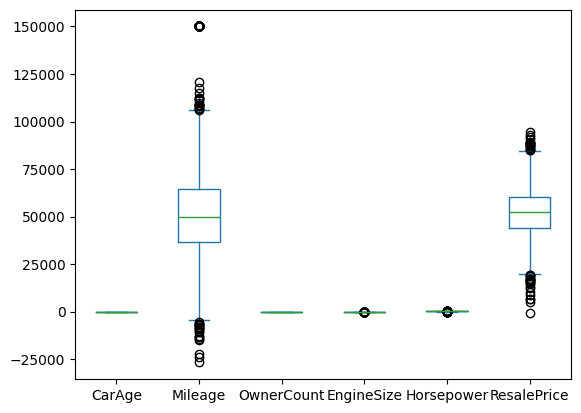

In [282]:
orig_Data.plot(kind='box')
plt.show()

In [283]:
num_data=orig_Data.select_dtypes(exclude='object')

In [284]:
num_data

CarAge       Mileage  OwnerCount  EngineSize  Horsepower   ResalePrice
0         15  70539.725266         3.0    1.858776  116.781923  37380.232721
1         11  72118.008487         4.0    2.464409  150.064915  58279.184367
2          8  38721.050239         2.0    1.666394  140.577568  52420.515613
3          7  33675.655109         3.0    2.799322  157.020208  54195.804720
4         19  51562.861259         4.0    2.423886  196.907490  57287.511089
...      ...           ...         ...         ...         ...           ...
4661       4  22710.582928         2.0    1.839159  170.177585  56808.958580
4662       4  66193.150603         4.0    1.838883  162.177454  56224.633133
4663       1  54614.234981         2.0    2.478123  178.078306  68440.018358
4664       7  52035.766674         4.0    1.629055  191.210803  64847.894059
4665      18  56126.950679         1.0    0.988205  173.368420  43329.185500

[4666 rows x 6 columns]

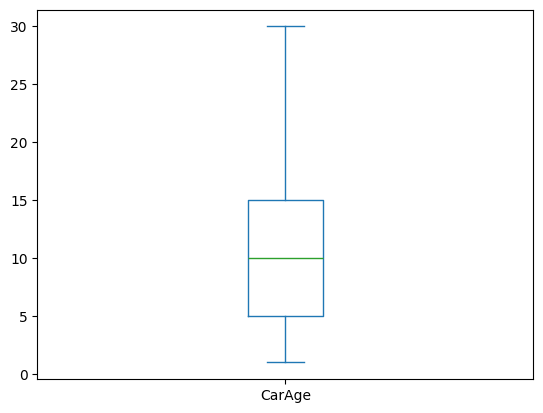

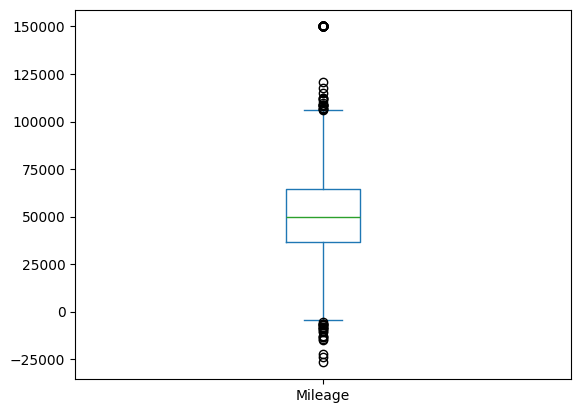

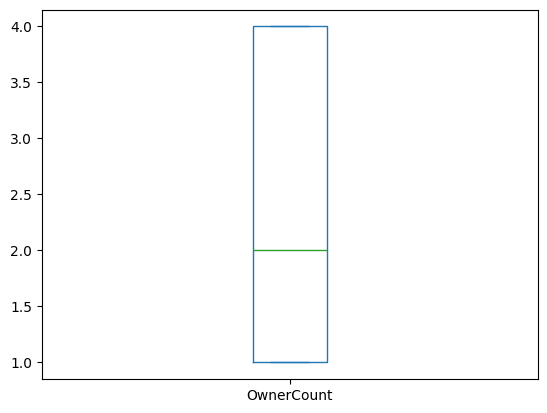

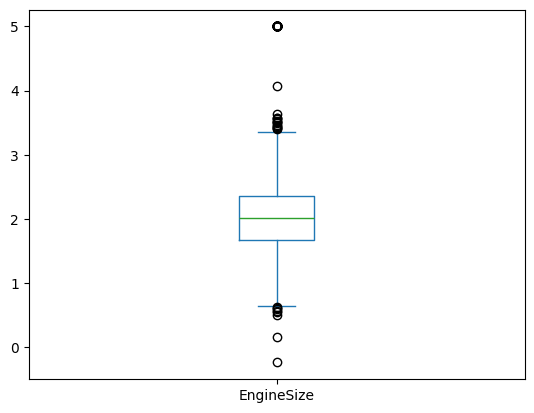

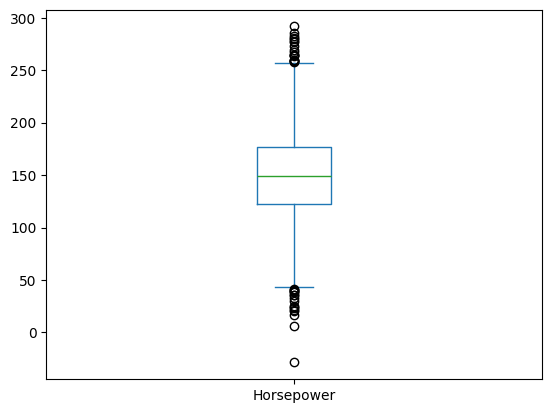

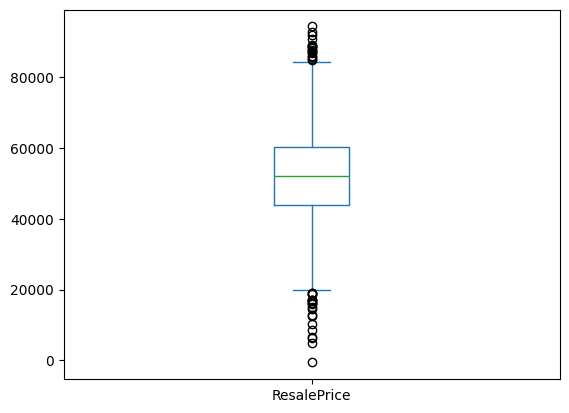

In [285]:
for i in num_data.columns:
    num_data[i].plot(kind='box')
    plt.show()

In [394]:
num_data.corr()

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  \
CarAge       1.000000  0.061936    0.034821    0.027316    0.009051   
Mileage      0.061936  1.000000    0.014765    0.055866   -0.000176   
OwnerCount   0.034821  0.014765    1.000000   -0.007302    0.015496   
EngineSize   0.027316  0.055866   -0.007302    1.000000   -0.011504   
Horsepower   0.009051 -0.000176    0.015496   -0.011504    1.000000   
ResalePrice -0.477215 -0.210357    0.008008    0.204210    0.654101   

             ResalePrice  
CarAge         -0.477215  
Mileage        -0.210357  
OwnerCount      0.008008  
EngineSize      0.204210  
Horsepower      0.654101  
ResalePrice     1.000000

<Axes: >

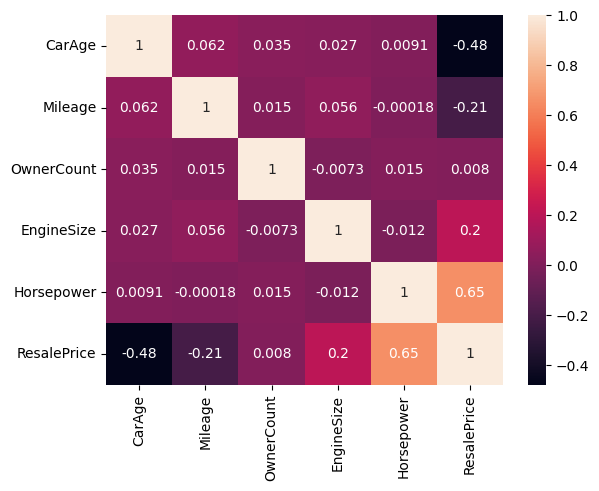

In [287]:
sns.heatmap(num_data.corr(),annot=True)

<Axes: ylabel='Frequency'>

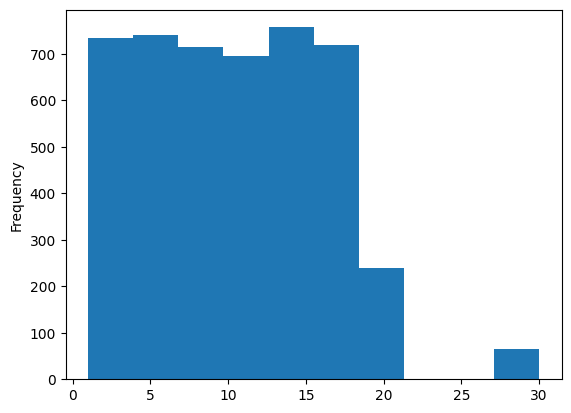

In [288]:
orig_Data['CarAge'].plot(kind='hist')

<Axes: >

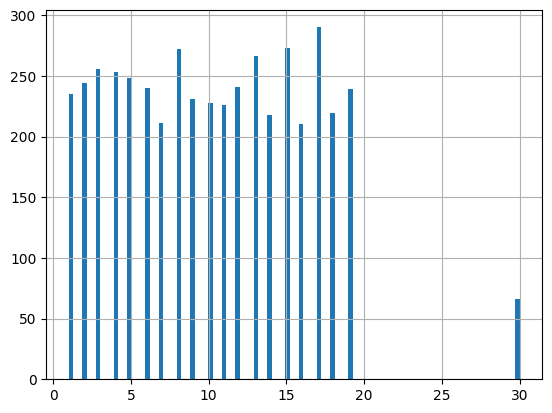

In [256]:
orig_Data['CarAge'].hist(bins=100)

Visulations all the numerical columns

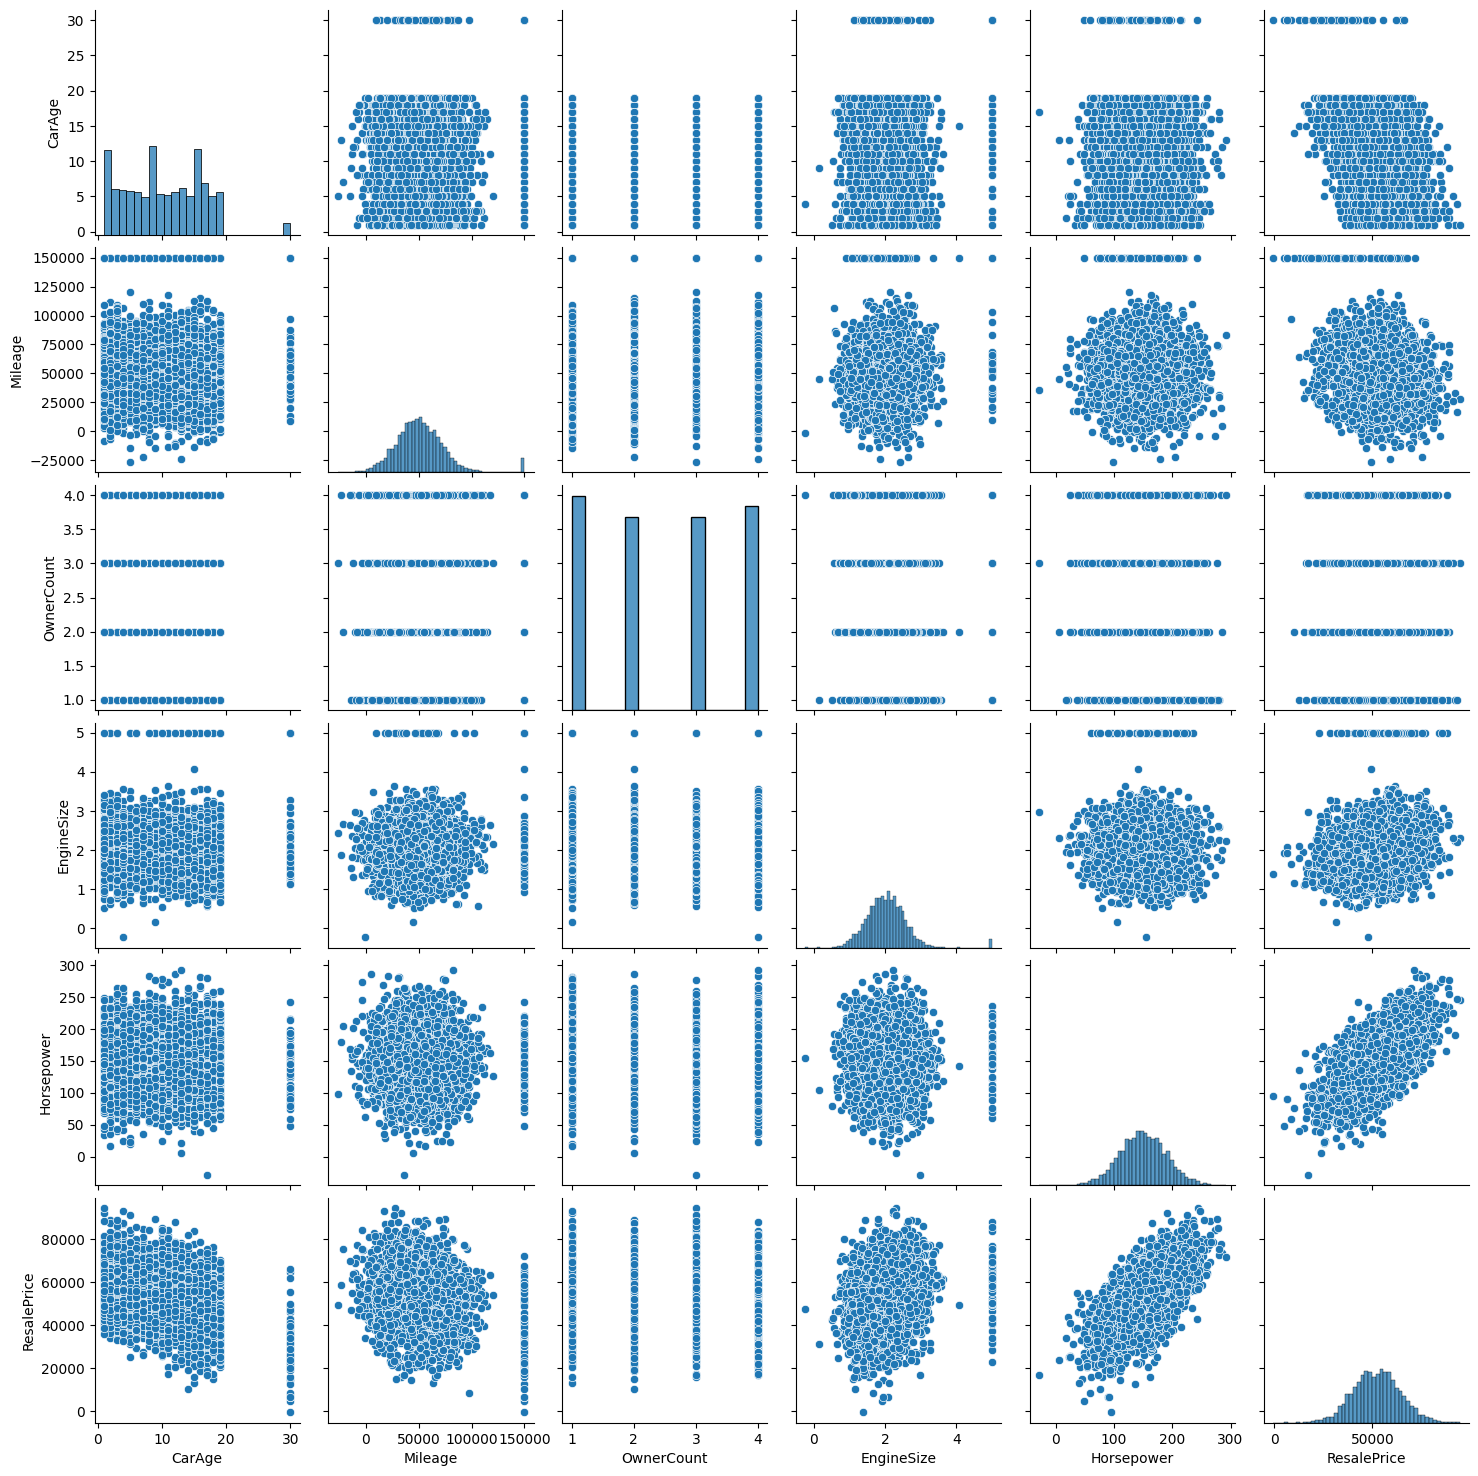

In [289]:
sns.pairplot(orig_Data[num_data.columns])

In [395]:
orig_Data['CarAge'].value_counts()

CarAge
17    290
15    273
8     272
13    266
3     256
4     253
5     248
2     244
12    241
6     240
19    239
1     235
9     231
10    228
11    226
18    219
14    218
7     211
16    210
30     66
Name: count, dtype: int64

<Axes: ylabel='count'>

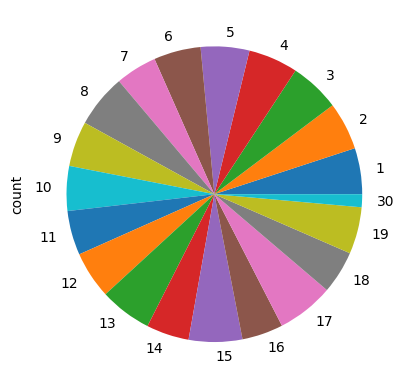

In [292]:
orig_Data['CarAge'].value_counts().sort_index().plot(kind='pie')

In [296]:
#plt.pie(orig_Data['CarAge'].value_counts(),labels=orig_Data['CarAge'].column)

<Axes: ylabel='count'>

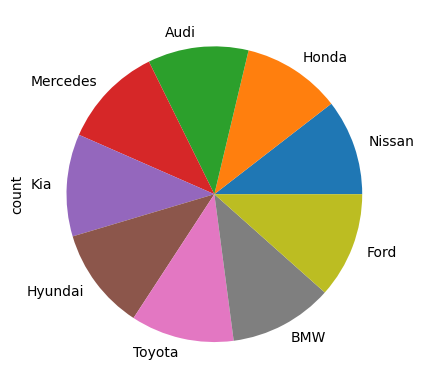

In [260]:
orig_Data['Brand'].value_counts().sort_values().plot(kind='pie')

In [297]:
orig_Data['CarAge'].mean()

np.float64(10.272396056579511)

In [299]:
orig_Data.groupby('Brand').ResalePrice.mean()

Brand
Audi        52840.653986
BMW         52778.242673
Ford        52174.289180
Honda       51712.553646
Hyundai     51844.957376
Kia         52983.687577
Mercedes    51911.198747
Nissan      51984.681362
Toyota      51385.497438
Name: ResalePrice, dtype: float64

In [ ]:
orig_Data.groupby['Brand'].ResalePrice.mean()

TypeError: 'method' object is not subscriptable

In [ ]:
orig_Data.groupby('Brand').ResalePrice.mean()

Brand
Audi        52840.653986
BMW         52778.242673
Ford        52174.289180
Honda       51712.553646
Hyundai     51844.957376
Kia         52983.687577
Mercedes    51911.198747
Nissan      51984.681362
Toyota      51385.497438
Name: ResalePrice, dtype: float64

In [300]:
orig_Data.groupby('CarAge').ResalePrice.mean()

CarAge
1     60755.198942
2     60383.752890
3     58914.633359
4     58646.413913
5     56856.587102
6     56326.018298
7     55769.502346
8     54100.842277
9     53862.131755
10    52737.413639
11    51906.256403
12    50456.914134
13    49252.008841
14    48189.330458
15    47485.803066
16    47102.592691
17    46012.209520
18    44328.259497
19    43839.100763
30    31821.631809
Name: ResalePrice, dtype: float64

<Axes: xlabel='CarAge'>

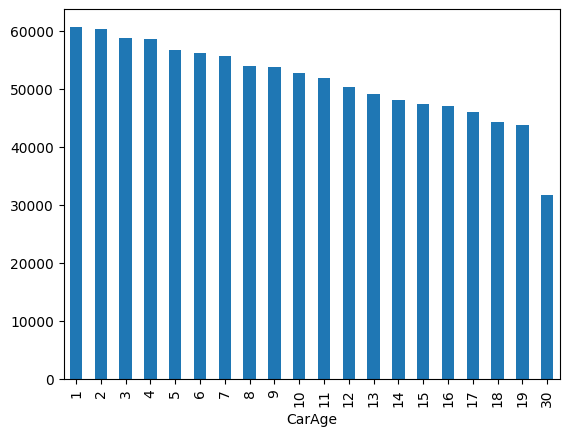

In [301]:
orig_Data.groupby('CarAge').ResalePrice.mean().plot(kind='bar')

In [302]:
orig_Data.groupby('FuelType').ResalePrice.mean()

FuelType
Diesel      52371.845560
Electric    52192.217288
Hybrid      52091.530747
Petrol      52058.963731
Name: ResalePrice, dtype: float64

<Axes: xlabel='FuelType'>

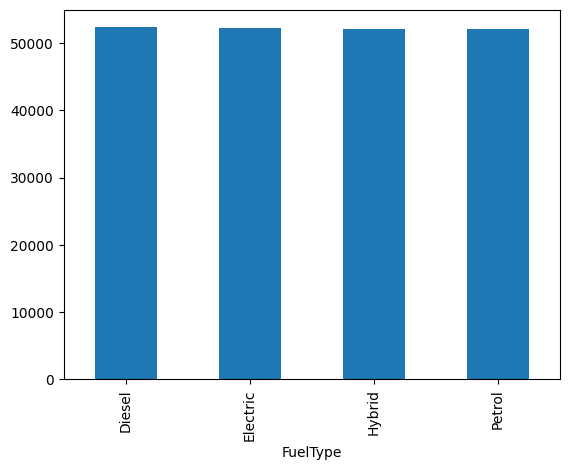

In [303]:
orig_Data.groupby('FuelType').ResalePrice.mean().plot(kind='bar')

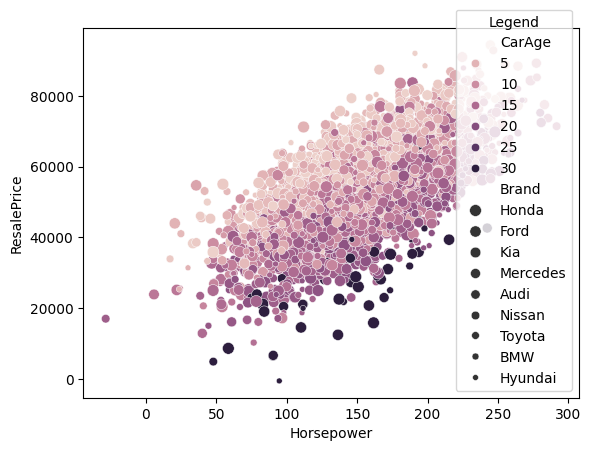

In [320]:
sns.scatterplot(x=orig_Data['Horsepower'],y=orig_Data['ResalePrice'],hue=orig_Data['CarAge'],size=orig_Data['Brand'])
plt.legend(loc='lower right', title='Legend')

<Axes: xlabel='Horsepower', ylabel='ResalePrice'>

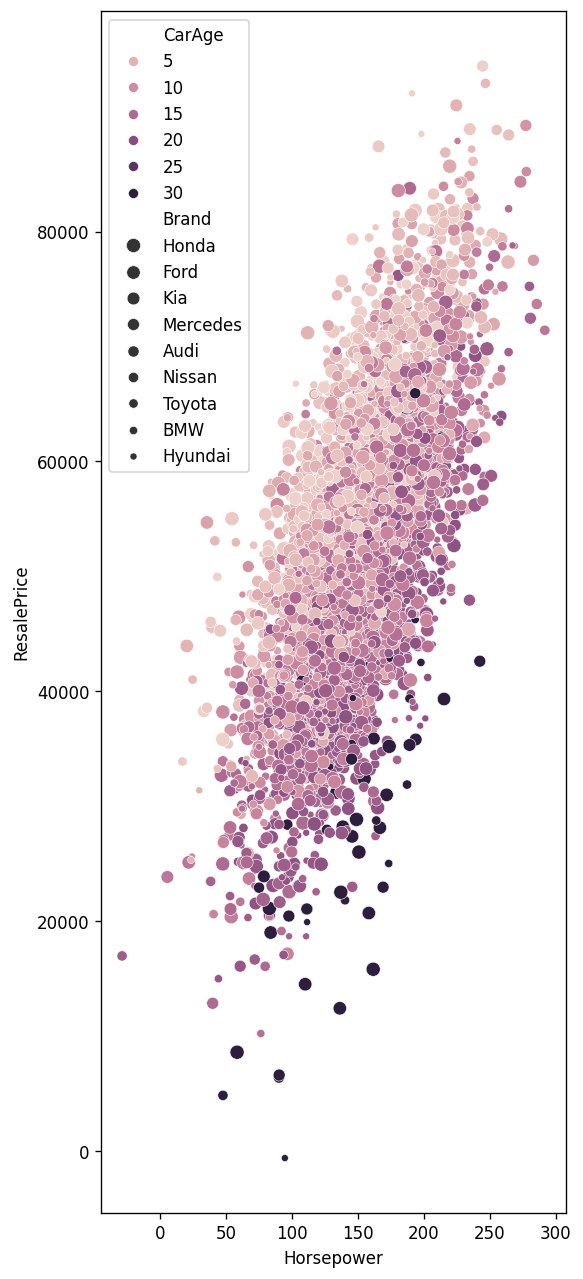

In [321]:
plt.figure(figsize=(5,13),dpi=120)
sns.scatterplot(x=orig_Data['Horsepower'],y=orig_Data['ResalePrice'],hue=orig_Data['CarAge'],size=orig_Data['Brand'])

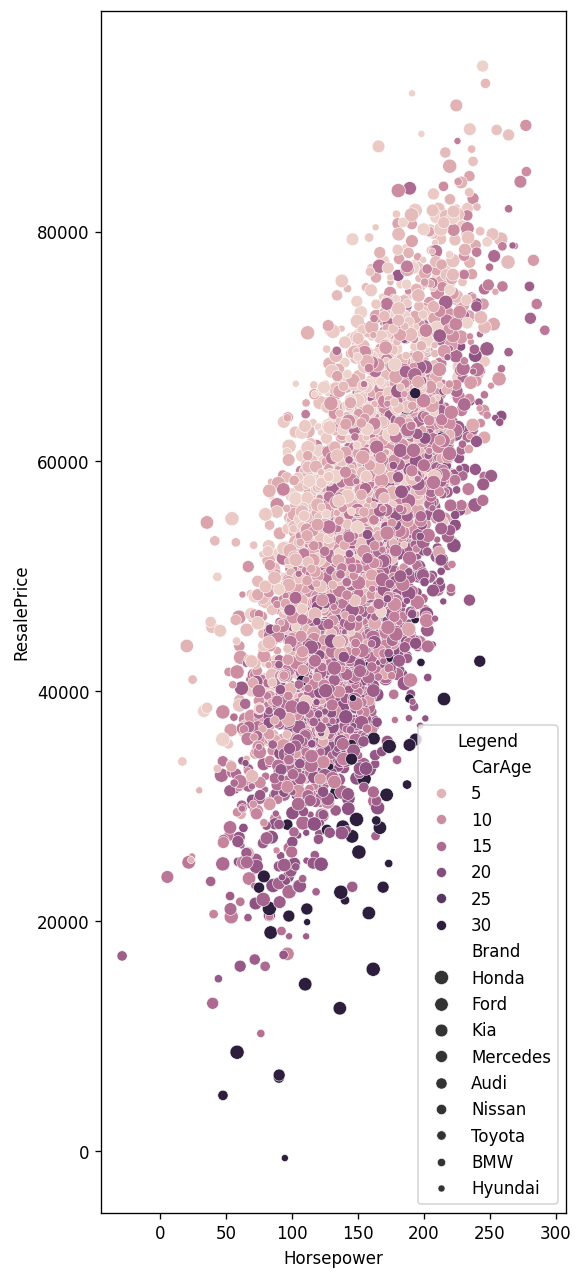

In [322]:
plt.figure(figsize=(5,13),dpi=120)
sns.scatterplot(x=orig_Data['Horsepower'],y=orig_Data['ResalePrice'],hue=orig_Data['CarAge'],size=orig_Data['Brand'])
plt.legend(loc='lower right', title='Legend')

Preprocessing Techniques to Implement:

        Handling Missing Values: Impute missing values in Mileage, OwnerCount, and Horsepower.
        Encoding Categorical Variables: Encode Brand, FuelType, Transmission, and CarCondition features.
        Scaling Numeric Features: Scale CarAge, Mileage, EngineSize, Horsepower.
        Outlier Detection and Treatment: Detect and handle outliers in CarAge, EngineSize, and Mileage.


In [396]:
orig_Data.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [324]:
orig_Data.shape

(4666, 10)

In [326]:
orig_Data.OwnerCount.value_counts()

OwnerCount
1.0    1207
4.0    1151
3.0    1089
2.0    1086
Name: count, dtype: int64

In [327]:
orig_Data[orig_Data['OwnerCount'].isna()]

CarAge        Mileage     Brand  FuelType Transmission  OwnerCount  \
23         3   52523.558073      Ford    Hybrid    Automatic         NaN   
46        30   60445.012720   Hyundai    Hybrid    Automatic         NaN   
93        30   42773.788761      Ford    Diesel       Manual         NaN   
116        4   48779.920563      Audi    Diesel       Manual         NaN   
163       17   52461.564033    Nissan    Diesel    Automatic         NaN   
186       30  150000.000000  Mercedes    Diesel       Manual         NaN   
233       30   45280.600256      Ford    Hybrid    Automatic         NaN   
256       17    8270.446833    Toyota    Hybrid       Manual         NaN   
303       12   77044.053577   Hyundai  Electric       Manual         NaN   
326       30    9630.242712   Hyundai  Electric    Automatic         NaN   
373       30  150000.000000    Nissan    Petrol       Manual         NaN   
396        9   10629.915731    Nissan    Diesel       Manual         NaN   
443       10   61826.984835    Toyota    Petrol    Automatic         NaN   
466       30   13124.128330      Ford    Petrol    Automatic         NaN   
513       30   67750.079348       Kia    Petrol    Automatic         NaN   
536       15   45209.961560   Hyundai  Electric    Automatic         NaN   
583        2   37402.308953       Kia  Electric    Automatic         NaN   
606       30   26976.925269   Hyundai    Petrol    Automatic         NaN   
653       30   83573.493467       Kia  Electric    Automatic         NaN   
676        4   77131.667717      Ford    Petrol       Manual         NaN   
723       13   40451.785876      Ford    Diesel       Manual         NaN   
746       30  150000.000000  Mercedes    Hybrid       Manual         NaN   
793       30   37782.847204      Audi  Electric       Manual         NaN   
816        5   78489.916425    Nissan    Petrol       Manual         NaN   
863        5   64639.110050      Ford    Diesel       Manual         NaN   
886       30   65094.665961      Ford    Hybrid    Automatic         NaN   
933       30  150000.000000      Audi    Hybrid    Automatic         NaN   
956        5   42301.142232   Hyundai  Electric    Automatic         NaN   
1003      11   23337.432904      Audi    Hybrid       Manual         NaN   
1026      30   33096.920831     Honda  Electric       Manual         NaN   
1073      30   60016.631820       BMW    Hybrid       Manual         NaN   
1096      15   57203.283679    Nissan  Electric    Automatic         NaN   
1143      10   59785.090702  Mercedes    Petrol    Automatic         NaN   
1166      30   57727.653077    Toyota    Petrol       Manual         NaN   
1213      30   79420.693816      Ford    Hybrid       Manual         NaN   
1236      13   40317.630108      Audi    Petrol       Manual         NaN   
1283       5   75618.791533   Hyundai    Diesel       Manual         NaN   
1306      30  150000.000000      Audi    Petrol       Manual         NaN   
1353      30   61757.117763      Audi    Petrol    Automatic         NaN   
1376      11   68976.261929    Toyota  Electric       Manual         NaN   
1423       6   26930.151480       BMW    Diesel       Manual         NaN   
1446      30   80689.642036      Ford  Electric       Manual         NaN   
1493      30  150000.000000      Ford  Electric    Automatic         NaN   
1516       1   59755.496422  Mercedes  Electric    Automatic         NaN   
1563      18   50389.165110      Audi    Hybrid    Automatic         NaN   
1586      30   51689.335728    Nissan  Electric    Automatic         NaN   
1633      30   57852.682313       BMW    Diesel    Automatic         NaN   
1656      11  108363.471101       Kia    Hybrid       Manual         NaN   
1703      15   39880.676020     Honda    Petrol    Automatic         NaN   
1726      30   28879.384001    Toyota    Diesel       Manual         NaN   
1773      30   70537.892365     Honda  Electric       Manual         NaN   
1796      16   32966.756513      Audi    Hybrid    Aut

In [328]:
orig_Data[['CarAge','ResalePrice']][orig_Data['OwnerCount'].isna()].value_counts()

CarAge  ResalePrice  
1        56375.009017    1
30       22922.487989    1
         31040.039752    1
         31000.070581    1
         29761.034099    1
         28860.728383    1
         28766.991466    1
         28410.801162    1
         28223.653870    1
         28142.116125    1
         27956.317763    1
         27383.948423    1
         26021.187249    1
         25027.106961    1
         23903.285686    1
         22967.911227    1
         22528.437072    1
        -599.850702      1
         21828.729310    1
         21109.334953    1
         21076.776425    1
         21070.286871    1
         20718.577696    1
         20454.884372    1
         19928.626119    1
         19021.126483    1
         15827.743731    1
         14524.220986    1
         12432.641456    1
         8608.948468     1
         6624.338694     1
         6402.716697     1
         31211.017307    1
         31891.821136    1
         32396.560728    1
         33446.970505    1
      

In [329]:
orig_Data[['CarAge','ResalePrice']][orig_Data['OwnerCount'].isna()].value_counts().sort_index(ascending=False)

CarAge  ResalePrice  
30       65939.615227    1
         64498.433458    1
         62008.173956    1
         55275.203791    1
         49829.910878    1
         48936.156943    1
         48723.087180    1
         48636.431137    1
         46794.100432    1
         46247.499366    1
         42895.507307    1
         42626.821662    1
         42519.186582    1
         42050.134829    1
         42012.329085    1
         40947.338093    1
         40152.455487    1
         39418.702984    1
         39379.121853    1
         39334.485340    1
         38746.964894    1
         37054.901519    1
         35899.966172    1
         35811.964457    1
         35412.464397    1
         35336.702213    1
         35219.175250    1
         34616.600372    1
         34110.731181    1
         34047.972302    1
         33446.970505    1
         32396.560728    1
         31891.821136    1
         31211.017307    1
         31040.039752    1
         31000.070581    1
      

In [331]:
orig_Data[['CarAge']][orig_Data['OwnerCount'].isna()].value_counts().sort_index(ascending=False)

CarAge
30        66
19         2
18         2
17         3
16         4
15         7
14         3
13         6
12         3
11         4
10         3
9          3
8          1
7          1
6          5
5          6
4          6
3          2
2          4
1          2
Name: count, dtype: int64

In [337]:
orig_Data[['CarAge']].value_counts().sort_index()

CarAge
1         235
2         244
3         256
4         253
5         248
6         240
7         211
8         272
9         231
10        228
11        226
12        241
13        266
14        218
15        273
16        210
17        290
18        219
19        239
30         66
Name: count, dtype: int64

In [339]:
orig_Data[['CarAge']].value_counts().sort_index().shape

(20,)

In [347]:
orig_Data['OwnerCount'][orig_Data['CarAge']==30]

46     NaN
93     NaN
186    NaN
233    NaN
326    NaN
373    NaN
466    NaN
513    NaN
606    NaN
653    NaN
746    NaN
793    NaN
886    NaN
933    NaN
1026   NaN
1073   NaN
1166   NaN
1213   NaN
1306   NaN
1353   NaN
1446   NaN
1493   NaN
1586   NaN
1633   NaN
1726   NaN
1773   NaN
1866   NaN
1913   NaN
2006   NaN
2053   NaN
2146   NaN
2193   NaN
2286   NaN
2333   NaN
2426   NaN
2473   NaN
2566   NaN
2613   NaN
2706   NaN
2753   NaN
2846   NaN
2893   NaN
2986   NaN
3033   NaN
3126   NaN
3173   NaN
3266   NaN
3313   NaN
3406   NaN
3453   NaN
3546   NaN
3593   NaN
3686   NaN
3733   NaN
3826   NaN
3873   NaN
3966   NaN
4013   NaN
4106   NaN
4153   NaN
4246   NaN
4293   NaN
4386   NaN
4433   NaN
4526   NaN
4573   NaN
Name: OwnerCount, dtype: float64

In [348]:
orig_Data['OwnerCount'][orig_Data['CarAge']==30].value_counts().shape

(0,)

In [350]:
orig_Data['OwnerCount'].value_counts()

OwnerCount
1.0    1207
4.0    1151
3.0    1089
2.0    1086
Name: count, dtype: int64

In [352]:
orig_Data['OwnerCount'].mean()

np.float64(2.481800132362674)

In [354]:
orig_Data.groupby('CarAge').OwnerCount.mean()

CarAge
1     2.424893
2     2.458333
3     2.429134
4     2.376518
5     2.413223
6     2.404255
7     2.495238
8     2.527675
9     2.456140
10    2.608889
11    2.549550
12    2.369748
13    2.457692
14    2.581395
15    2.511278
16    2.572816
17    2.439024
18    2.423963
19    2.691983
30         NaN
Name: OwnerCount, dtype: float64

In [400]:
orig_Data[(orig_Data['OwnerCount'].isna()) & (orig_Data['CarAge'] < 30)]

CarAge       Mileage    Brand  FuelType Transmission  OwnerCount  \
23         3  52523.558073     Ford    Hybrid    Automatic         NaN   
116        4  48779.920563     Audi    Diesel       Manual         NaN   
163       17  52461.564033   Nissan    Diesel    Automatic         NaN   
256       17   8270.446833   Toyota    Hybrid       Manual         NaN   
303       12  77044.053577  Hyundai  Electric       Manual         NaN   
...      ...           ...      ...       ...          ...         ...   
4363       5  44236.879390   Toyota    Hybrid       Manual         NaN   
4456      12  29280.761428   Nissan    Diesel       Manual         NaN   
4503       6  18811.284417     Audi    Petrol       Manual         NaN   
4596       6  88232.121341   Nissan    Diesel    Automatic         NaN   
4643       6  32191.284941      BMW    Petrol       Manual         NaN   

      EngineSize  Horsepower CarCondition   ResalePrice  
23      2.546010  211.078567    Excellent  81960.799605  
116     2.115195  105.592075         Good  47360.671813  
163     3.058166  166.297898         Fair  51481.007236  
256     1.728033  198.325797         Fair  53592.895211  
303     2.240718  185.336247         Poor  57491.658845  
...          ...         ...          ...           ...  
4363    2.592693  144.069046         Good  51990.063655  
4456    2.421784  150.072581         Fair  50704.066421  
4503    2.233541  166.267605         Good  53548.830157  
4596    1.036345  154.620745         Poor  55599.341393  
4643    1.985406   96.665726         Poor  63801.481699  

[67 rows x 10 columns]

In [399]:
pd.set_option('display.max_rows',10)

In [401]:
orig_Data[(orig_Data['OwnerCount'].isna()) & (orig_Data['CarAge'] < 30)]

CarAge       Mileage    Brand  FuelType Transmission  OwnerCount  \
23         3  52523.558073     Ford    Hybrid    Automatic         NaN   
116        4  48779.920563     Audi    Diesel       Manual         NaN   
163       17  52461.564033   Nissan    Diesel    Automatic         NaN   
256       17   8270.446833   Toyota    Hybrid       Manual         NaN   
303       12  77044.053577  Hyundai  Electric       Manual         NaN   
...      ...           ...      ...       ...          ...         ...   
4363       5  44236.879390   Toyota    Hybrid       Manual         NaN   
4456      12  29280.761428   Nissan    Diesel       Manual         NaN   
4503       6  18811.284417     Audi    Petrol       Manual         NaN   
4596       6  88232.121341   Nissan    Diesel    Automatic         NaN   
4643       6  32191.284941      BMW    Petrol       Manual         NaN   

      EngineSize  Horsepower CarCondition   ResalePrice  
23      2.546010  211.078567    Excellent  81960.799605  
116     2.115195  105.592075         Good  47360.671813  
163     3.058166  166.297898         Fair  51481.007236  
256     1.728033  198.325797         Fair  53592.895211  
303     2.240718  185.336247         Poor  57491.658845  
...          ...         ...          ...           ...  
4363    2.592693  144.069046         Good  51990.063655  
4456    2.421784  150.072581         Fair  50704.066421  
4503    2.233541  166.267605         Good  53548.830157  
4596    1.036345  154.620745         Poor  55599.341393  
4643    1.985406   96.665726         Poor  63801.481699  

[67 rows x 10 columns]

In [402]:
orig_Data[(orig_Data['OwnerCount'].isna())]

CarAge       Mileage     Brand FuelType Transmission  OwnerCount  \
23         3  52523.558073      Ford   Hybrid    Automatic         NaN   
46        30  60445.012720   Hyundai   Hybrid    Automatic         NaN   
93        30  42773.788761      Ford   Diesel       Manual         NaN   
116        4  48779.920563      Audi   Diesel       Manual         NaN   
163       17  52461.564033    Nissan   Diesel    Automatic         NaN   
...      ...           ...       ...      ...          ...         ...   
4503       6  18811.284417      Audi   Petrol       Manual         NaN   
4526      30   9107.419924   Hyundai   Diesel    Automatic         NaN   
4573      30  66133.528043  Mercedes   Hybrid    Automatic         NaN   
4596       6  88232.121341    Nissan   Diesel    Automatic         NaN   
4643       6  32191.284941       BMW   Petrol       Manual         NaN   

      EngineSize  Horsepower CarCondition   ResalePrice  
23      2.546010  211.078567    Excellent  81960.799605  
46      1.721939  134.552136    Excellent  29761.034099  
93      1.947410  110.126575    Excellent  14524.220986  
116     2.115195  105.592075         Good  47360.671813  
163     3.058166  166.297898         Fair  51481.007236  
...          ...         ...          ...           ...  
4503    2.233541  166.267605         Good  53548.830157  
4526    2.336859  146.263272         Poor  39418.702984  
4573    5.000000  145.230169    Excellent  34110.731181  
4596    1.036345  154.620745         Poor  55599.341393  
4643    1.985406   96.665726         Poor  63801.481699  

[133 rows x 10 columns]

In [ ]:
orig_Data.head(10)

CarAge       Mileage     Brand  FuelType Transmission  OwnerCount  \
0      15  70539.725266     Honda  Electric       Manual         3.0   
1      11  72118.008487     Honda  Electric    Automatic         4.0   
2       8  38721.050239      Ford    Hybrid       Manual         2.0   
3       7  33675.655109       Kia    Petrol    Automatic         3.0   
4      19  51562.861259  Mercedes    Petrol    Automatic         4.0   
5      11  67232.722490  Mercedes    Hybrid       Manual         4.0   
6      11  52781.207973      Ford    Diesel    Automatic         2.0   
7       4  18460.070356      Audi    Hybrid    Automatic         2.0   
8       8  33943.511121    Nissan    Diesel    Automatic         4.0   
9       3  48520.542728    Nissan    Hybrid    Automatic         4.0   

   EngineSize  Horsepower CarCondition   ResalePrice  
0    1.858776  116.781923         Poor  37380.232721  
1    2.464409  150.064915         Fair  58279.184367  
2    1.666394  140.577568         Fair  52420.515613  
3    2.799322  157.020208         Poor  54195.804720  
4    2.423886  196.907490         Fair  57287.511089  
5    1.456448  134.917726         Good  43357.110349  
6    1.022554  153.461044         Poor  54773.999052  
7    2.094350  137.076770         Fair  64204.443853  
8    2.248564  190.402073    Excellent  64674.376285  
9    2.381361  156.275858         Good  63337.649660

In [358]:
orig_Data.OwnerCount.value_counts()

OwnerCount
1.0    1207
4.0    1151
3.0    1089
2.0    1086
Name: count, dtype: int64

In [359]:
orig_Data[['CarAge','OwnerCount']].value_counts().sort_index()

CarAge  OwnerCount
1       1.0           67
        2.0           56
        3.0           54
        4.0           56
2       1.0           70
        2.0           59
        3.0           42
        4.0           69
3       1.0           69
        2.0           61
        3.0           70
        4.0           54
4       1.0           78
        2.0           53
        3.0           61
        4.0           55
5       1.0           72
        2.0           54
        3.0           60
        4.0           56
6       1.0           66
        2.0           64
        3.0           49
        4.0           56
7       1.0           53
        2.0           49
        3.0           59
        4.0           49
8       1.0           61
        2.0           76
        3.0           64
        4.0           70
9       1.0           65
        2.0           47
        3.0           63
        4.0           53
10      1.0           43
        2.0           61
        3.0           62
      

In [403]:
orig_Data.groupby(['CarAge','OwnerCount']).value_counts().sort_index()

CarAge  OwnerCount  Mileage        Brand    FuelType  Transmission  EngineSize  Horsepower  CarCondition  ResalePrice 
1       1.0         2431.366803    Nissan   Electric  Manual        2.327368    184.422128  Poor          80811.392770    1
                    10383.270582   Toyota   Diesel    Automatic     2.506841    142.054271  Excellent     67604.314600    1
                    14035.705212   Nissan   Electric  Automatic     3.036665    113.477983  Good          54094.318925    1
                    15126.547952   BMW      Diesel    Manual        1.478604    143.583501  Fair          62007.866380    1
                    20016.375961   Honda    Petrol    Automatic     0.968385    151.040215  Fair          56143.101461    1
                                                                                                                         ..
19      4.0         77840.775032   Hyundai  Diesel    Manual        2.053236    214.749702  Fair          47823.909244    1
             

In [404]:
orig_Data[['CarAge','ResalePrice']][orig_Data['OwnerCount'].isna()].sort_values('CarAge')

CarAge   ResalePrice
1516       1  64952.987992
2963       1  56375.009017
583        2  62827.134015
3803       2  41701.918315
3103       2  58630.514956
...      ...           ...
513       30  35811.964457
2193      30  46247.499366
2146      30  20454.884372
3173      30  33446.970505
2333      30  48723.087180

[133 rows x 2 columns]

In [372]:
orig_Data[['CarAge']][orig_Data['OwnerCount'].isna()].head()

CarAge
23        3
46       30
93       30
116       4
163      17

In [ ]:
orig_Data[['ResalePrice']][orig_Data['OwnerCount'].isna()].head()

ResalePrice
23   81960.799605
46   29761.034099
93   14524.220986
116  47360.671813
163  51481.007236

In [373]:
carage_prcie=pd.DataFrame(orig_Data[['CarAge','ResalePrice']][orig_Data['OwnerCount'].isna()])

In [ ]:
carage_prcie

CarAge   ResalePrice
23         3  81960.799605
46        30  29761.034099
93        30  14524.220986
116        4  47360.671813
163       17  51481.007236
...      ...           ...
4503       6  53548.830157
4526      30  39418.702984
4573      30  34110.731181
4596       6  55599.341393
4643       6  63801.481699

[133 rows x 2 columns]

<Axes: >

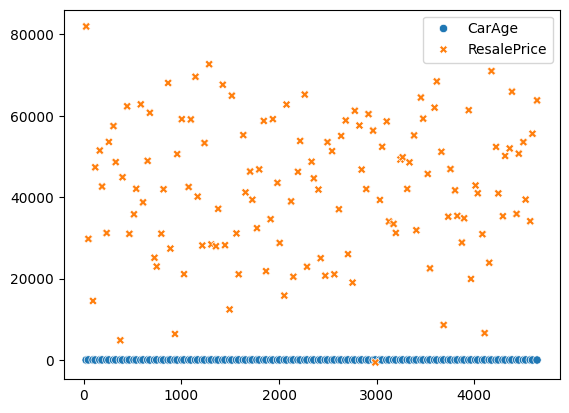

In [374]:
sns.scatterplot(pd.DataFrame(orig_Data[['CarAge','ResalePrice']][orig_Data['OwnerCount'].isna()]))

<Axes: xlabel='CarAge', ylabel='ResalePrice'>

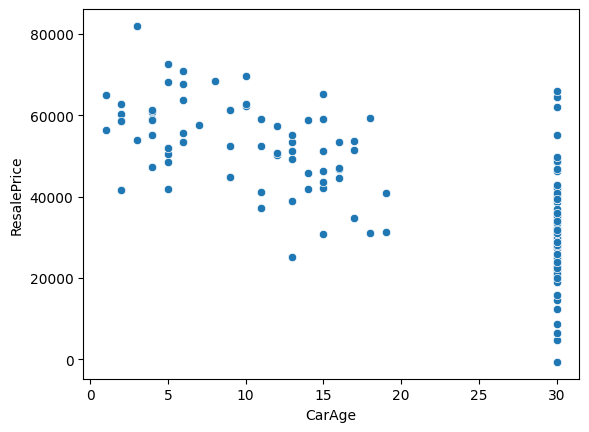

In [448]:
sns.scatterplot(x=carage_prcie['CarAge'],y=carage_prcie['ResalePrice'])

<Axes: >

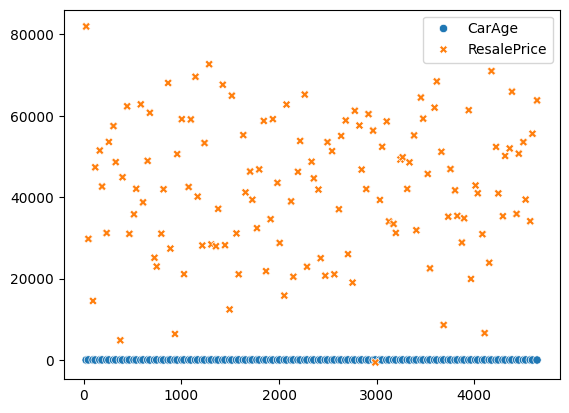

In [ ]:
sns.scatterplot(carage_prcie)

In [ ]:
sns.scatterplot(x=orig_Data[['CarAge']][orig_Data['OwnerCount'].isna()],y=orig_Data[['ResalePrice']][orig_Data['OwnerCount'].isna()])

ValueError: If using all scalar values, you must pass an index

In [384]:
orig_Data['OwnerCount'].value_counts().sort_values(ascending=False)

OwnerCount
1.0    1340
4.0    1151
3.0    1089
2.0    1086
Name: count, dtype: int64

In [434]:
orig_Data[orig_Data['CarAge']==30]['OwnerCount']

46      1.0
93      1.0
186     1.0
233     1.0
326     1.0
       ... 
4293    1.0
4386    1.0
4433    1.0
4526    1.0
4573    1.0
Name: OwnerCount, Length: 66, dtype: float64

In [469]:
orig_Data.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [587]:
mode_data=orig_Data.copy()
mean2_data=orig_Data.copy()
mean3_data=orig_Data.copy()

In [588]:
mode_data.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [589]:
mode_data['OwnerCount'].fillna(mode_data['OwnerCount'].mode()[0])


0       3.0
1       4.0
2       2.0
3       3.0
4       4.0
5       4.0
6       2.0
7       2.0
8       4.0
9       4.0
10      1.0
11      4.0
12      4.0
13      1.0
14      4.0
15      1.0
16      3.0
17      2.0
18      3.0
19      2.0
20      2.0
21      4.0
22      2.0
23      1.0
24      4.0
25      1.0
26      3.0
27      4.0
28      3.0
29      2.0
30      4.0
31      4.0
32      1.0
33      1.0
34      3.0
35      1.0
36      2.0
37      2.0
38      1.0
39      1.0
40      1.0
41      3.0
42      2.0
43      3.0
44      3.0
45      4.0
46      1.0
47      2.0
48      1.0
49      4.0
50      1.0
51      3.0
52      2.0
53      3.0
54      3.0
55      4.0
56      2.0
57      2.0
58      4.0
59      4.0
60      4.0
61      4.0
62      2.0
63      2.0
64      3.0
65      3.0
66      3.0
67      2.0
68      1.0
69      3.0
70      1.0
71      1.0
72      4.0
73      2.0
74      2.0
75      3.0
76      3.0
77      2.0
78      4.0
79      2.0
80      1.0
81      2.0
82      4.0
83  

In [590]:
mode_data['OwnerCount']=mode_data['OwnerCount'].fillna(mode_data['OwnerCount'].mode()[0])

In [591]:
mode_data.isna().sum()

CarAge          0
Mileage         0
Brand           0
FuelType        0
Transmission    0
OwnerCount      0
EngineSize      0
Horsepower      0
CarCondition    0
ResalePrice     0
dtype: int64

In [592]:
orig_Data.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [593]:
mode_data['OwnerCount'][mode_data['CarAge']==30]

46      1.0
93      1.0
186     1.0
233     1.0
326     1.0
373     1.0
466     1.0
513     1.0
606     1.0
653     1.0
746     1.0
793     1.0
886     1.0
933     1.0
1026    1.0
1073    1.0
1166    1.0
1213    1.0
1306    1.0
1353    1.0
1446    1.0
1493    1.0
1586    1.0
1633    1.0
1726    1.0
1773    1.0
1866    1.0
1913    1.0
2006    1.0
2053    1.0
2146    1.0
2193    1.0
2286    1.0
2333    1.0
2426    1.0
2473    1.0
2566    1.0
2613    1.0
2706    1.0
2753    1.0
2846    1.0
2893    1.0
2986    1.0
3033    1.0
3126    1.0
3173    1.0
3266    1.0
3313    1.0
3406    1.0
3453    1.0
3546    1.0
3593    1.0
3686    1.0
3733    1.0
3826    1.0
3873    1.0
3966    1.0
4013    1.0
4106    1.0
4153    1.0
4246    1.0
4293    1.0
4386    1.0
4433    1.0
4526    1.0
4573    1.0
Name: OwnerCount, dtype: float64

In [594]:
# print(mean2_data[mean2_data['CarAge']==30]['OwnerCount'])
mode_data[mode_data['CarAge']==30]['OwnerCount']

46      1.0
93      1.0
186     1.0
233     1.0
326     1.0
373     1.0
466     1.0
513     1.0
606     1.0
653     1.0
746     1.0
793     1.0
886     1.0
933     1.0
1026    1.0
1073    1.0
1166    1.0
1213    1.0
1306    1.0
1353    1.0
1446    1.0
1493    1.0
1586    1.0
1633    1.0
1726    1.0
1773    1.0
1866    1.0
1913    1.0
2006    1.0
2053    1.0
2146    1.0
2193    1.0
2286    1.0
2333    1.0
2426    1.0
2473    1.0
2566    1.0
2613    1.0
2706    1.0
2753    1.0
2846    1.0
2893    1.0
2986    1.0
3033    1.0
3126    1.0
3173    1.0
3266    1.0
3313    1.0
3406    1.0
3453    1.0
3546    1.0
3593    1.0
3686    1.0
3733    1.0
3826    1.0
3873    1.0
3966    1.0
4013    1.0
4106    1.0
4153    1.0
4246    1.0
4293    1.0
4386    1.0
4433    1.0
4526    1.0
4573    1.0
Name: OwnerCount, dtype: float64

In [595]:
mean2_data['OwnerCount']=mean2_data['OwnerCount'].fillna(2)

In [596]:
mean2_data.isna().sum()

CarAge          0
Mileage         0
Brand           0
FuelType        0
Transmission    0
OwnerCount      0
EngineSize      0
Horsepower      0
CarCondition    0
ResalePrice     0
dtype: int64

In [597]:
mean2_data['OwnerCount'][mean2_data['CarAge']==30].head()

46     2.0
93     2.0
186    2.0
233    2.0
326    2.0
Name: OwnerCount, dtype: float64

In [598]:
orig_Data.isna().sum()

CarAge            0
Mileage           0
Brand             0
FuelType          0
Transmission      0
OwnerCount      133
EngineSize        0
Horsepower        0
CarCondition      0
ResalePrice       0
dtype: int64

In [599]:
mean3_data['OwnerCount']=mean3_data['OwnerCount'].fillna(3)

In [600]:
mean3_data['OwnerCount'][mean3_data['CarAge']==30].head()

46     3.0
93     3.0
186    3.0
233    3.0
326    3.0
Name: OwnerCount, dtype: float64

In [601]:
mean3_data.head()

CarAge       Mileage     Brand  FuelType Transmission  OwnerCount  \
0      15  70539.725266     Honda  Electric       Manual         3.0   
1      11  72118.008487     Honda  Electric    Automatic         4.0   
2       8  38721.050239      Ford    Hybrid       Manual         2.0   
3       7  33675.655109       Kia    Petrol    Automatic         3.0   
4      19  51562.861259  Mercedes    Petrol    Automatic         4.0   

   EngineSize  Horsepower CarCondition   ResalePrice  
0    1.858776  116.781923         Poor  37380.232721  
1    2.464409  150.064915         Fair  58279.184367  
2    1.666394  140.577568         Fair  52420.515613  
3    2.799322  157.020208         Poor  54195.804720  
4    2.423886  196.907490         Fair  57287.511089

In [ ]:
orig_Data['OwnerCount'].value_counts()

OwnerCount
1.0    1340
4.0    1151
3.0    1089
2.0    1086
Name: count, dtype: int64

In [497]:
orig_Data

CarAge       Mileage     Brand  FuelType Transmission  OwnerCount  \
0         15  70539.725266     Honda  Electric       Manual         3.0   
1         11  72118.008487     Honda  Electric    Automatic         4.0   
2          8  38721.050239      Ford    Hybrid       Manual         2.0   
3          7  33675.655109       Kia    Petrol    Automatic         3.0   
4         19  51562.861259  Mercedes    Petrol    Automatic         4.0   
...      ...           ...       ...       ...          ...         ...   
4661       4  22710.582928      Audi    Hybrid       Manual         2.0   
4662       4  66193.150603   Hyundai    Diesel    Automatic         4.0   
4663       1  54614.234981      Ford  Electric    Automatic         2.0   
4664       7  52035.766674    Toyota    Hybrid       Manual         4.0   
4665      18  56126.950679    Toyota    Petrol       Manual         1.0   

      EngineSize  Horsepower CarCondition   ResalePrice  
0       1.858776  116.781923         Poor  37380.232721  
1       2.464409  150.064915         Fair  58279.184367  
2       1.666394  140.577568         Fair  52420.515613  
3       2.799322  157.020208         Poor  54195.804720  
4       2.423886  196.907490         Fair  57287.511089  
...          ...         ...          ...           ...  
4661    1.839159  170.177585         Fair  56808.958580  
4662    1.838883  162.177454         Poor  56224.633133  
4663    2.478123  178.078306    Excellent  68440.018358  
4664    1.629055  191.210803    Excellent  64847.894059  
4665    0.988205  173.368420         Fair  43329.185500  

[4666 rows x 10 columns]

In [ ]:
orig_Data['Mileage'].value_counts().sum()

np.int64(4666)

In [498]:
orig_Data['Horsepower'].value_counts().sum()

np.int64(4666)

In [604]:
pd.set_option('display.max_rows',10)
mean3_data

CarAge       Mileage     Brand  FuelType Transmission  OwnerCount  \
0         15  70539.725266     Honda  Electric       Manual         3.0   
1         11  72118.008487     Honda  Electric    Automatic         4.0   
2          8  38721.050239      Ford    Hybrid       Manual         2.0   
3          7  33675.655109       Kia    Petrol    Automatic         3.0   
4         19  51562.861259  Mercedes    Petrol    Automatic         4.0   
...      ...           ...       ...       ...          ...         ...   
4661       4  22710.582928      Audi    Hybrid       Manual         2.0   
4662       4  66193.150603   Hyundai    Diesel    Automatic         4.0   
4663       1  54614.234981      Ford  Electric    Automatic         2.0   
4664       7  52035.766674    Toyota    Hybrid       Manual         4.0   
4665      18  56126.950679    Toyota    Petrol       Manual         1.0   

      EngineSize  Horsepower CarCondition   ResalePrice  
0       1.858776  116.781923         Poor  37380.232721  
1       2.464409  150.064915         Fair  58279.184367  
2       1.666394  140.577568         Fair  52420.515613  
3       2.799322  157.020208         Poor  54195.804720  
4       2.423886  196.907490         Fair  57287.511089  
...          ...         ...          ...           ...  
4661    1.839159  170.177585         Fair  56808.958580  
4662    1.838883  162.177454         Poor  56224.633133  
4663    2.478123  178.078306    Excellent  68440.018358  
4664    1.629055  191.210803    Excellent  64847.894059  
4665    0.988205  173.368420         Fair  43329.185500  

[4666 rows x 10 columns]

In [605]:
orig_Data.dtypes

CarAge            int64
Mileage         float64
Brand            object
FuelType         object
Transmission     object
OwnerCount      float64
EngineSize      float64
Horsepower      float64
CarCondition     object
ResalePrice     float64
dtype: object

In [606]:
orig_Data.select_dtypes(include='object')

Brand  FuelType Transmission CarCondition
0        Honda  Electric       Manual         Poor
1        Honda  Electric    Automatic         Fair
2         Ford    Hybrid       Manual         Fair
3          Kia    Petrol    Automatic         Poor
4     Mercedes    Petrol    Automatic         Fair
...        ...       ...          ...          ...
4661      Audi    Hybrid       Manual         Fair
4662   Hyundai    Diesel    Automatic         Poor
4663      Ford  Electric    Automatic    Excellent
4664    Toyota    Hybrid       Manual    Excellent
4665    Toyota    Petrol       Manual         Fair

[4666 rows x 4 columns]

In [ ]:
orig_Data.select_dtypes(include='object').columns

Index(['Brand', 'FuelType', 'Transmission', 'CarCondition'], dtype='object')

In [ ]:
for i in orig_Data.select_dtypes(include='object').columns:
    print(orig_Data[i].value_counts())

Brand
Ford        540
BMW         529
Toyota      527
Kia         522
Hyundai     522
Mercedes    519
Audi        514
Honda       504
Nissan      489
Name: count, dtype: int64
FuelType
Diesel      1221
Hybrid      1176
Electric    1146
Petrol      1123
Name: count, dtype: int64
Transmission
Manual       2364
Automatic    2302
Name: count, dtype: int64
CarCondition
Fair         1190
Excellent    1188
Poor         1148
Good         1140
Name: count, dtype: int64


In [502]:
pd.get_dummies(orig_Data,columns=['Brand'],dtype='int')

CarAge       Mileage  FuelType Transmission  OwnerCount  EngineSize  \
0         15  70539.725266  Electric       Manual         3.0    1.858776   
1         11  72118.008487  Electric    Automatic         4.0    2.464409   
2          8  38721.050239    Hybrid       Manual         2.0    1.666394   
3          7  33675.655109    Petrol    Automatic         3.0    2.799322   
4         19  51562.861259    Petrol    Automatic         4.0    2.423886   
...      ...           ...       ...          ...         ...         ...   
4661       4  22710.582928    Hybrid       Manual         2.0    1.839159   
4662       4  66193.150603    Diesel    Automatic         4.0    1.838883   
4663       1  54614.234981  Electric    Automatic         2.0    2.478123   
4664       7  52035.766674    Hybrid       Manual         4.0    1.629055   
4665      18  56126.950679    Petrol       Manual         1.0    0.988205   

      Horsepower CarCondition   ResalePrice  Brand_Audi  Brand_BMW  \
0     116.781923         Poor  37380.232721           0          0   
1     150.064915         Fair  58279.184367           0          0   
2     140.577568         Fair  52420.515613           0          0   
3     157.020208         Poor  54195.804720           0          0   
4     196.907490         Fair  57287.511089           0          0   
...          ...          ...           ...         ...        ...   
4661  170.177585         Fair  56808.958580           1          0   
4662  162.177454         Poor  56224.633133           0          0   
4663  178.078306    Excellent  68440.018358           0          0   
4664  191.210803    Excellent  64847.894059           0          0   
4665  173.368420         Fair  43329.185500           0          0   

      Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Kia  Brand_Mercedes  \
0              0            1              0          0               0   
1              0            1              0          0               0   
2              1            0              0          0               0   
3              0            0              0          1               0   
4              0            0              0          0               1   
...          ...          ...            ...        ...             ...   
4661           0            0              0          0               0   
4662           0            0              1          0               0   
4663           1            0              0          0               0   
4664           0            0              0          0               0   
4665           0            0              0          0               0   

      Brand_Nissan  Brand_Toyota  
0                0             0  
1                0             0  
2                0             0  
3                0             0  
4                0             0  
...            ...           ...  
4661             0             0  
4662             0             0  
4663             0             0  
4664             0             1  
4665             0             1  

[4666 rows x 18 columns]

In [607]:
mode_data=pd.get_dummies(mode_data,columns=['Brand','FuelType','Transmission'],dtype='int')
mean2_data=pd.get_dummies(mean2_data,columns=['Brand','FuelType','Transmission'],dtype='int')
mean3_data=pd.get_dummies(mean3_data,columns=['Brand','FuelType','Transmission'],dtype='int')

In [608]:
mode_data

CarAge       Mileage  OwnerCount  EngineSize  Horsepower CarCondition  \
0         15  70539.725266         3.0    1.858776  116.781923         Poor   
1         11  72118.008487         4.0    2.464409  150.064915         Fair   
2          8  38721.050239         2.0    1.666394  140.577568         Fair   
3          7  33675.655109         3.0    2.799322  157.020208         Poor   
4         19  51562.861259         4.0    2.423886  196.907490         Fair   
...      ...           ...         ...         ...         ...          ...   
4661       4  22710.582928         2.0    1.839159  170.177585         Fair   
4662       4  66193.150603         4.0    1.838883  162.177454         Poor   
4663       1  54614.234981         2.0    2.478123  178.078306    Excellent   
4664       7  52035.766674         4.0    1.629055  191.210803    Excellent   
4665      18  56126.950679         1.0    0.988205  173.368420         Fair   

       ResalePrice  Brand_Audi  Brand_BMW  Brand_Ford  ...  Brand_Kia  \
0     37380.232721           0          0           0  ...          0   
1     58279.184367           0          0           0  ...          0   
2     52420.515613           0          0           1  ...          0   
3     54195.804720           0          0           0  ...          1   
4     57287.511089           0          0           0  ...          0   
...            ...         ...        ...         ...  ...        ...   
4661  56808.958580           1          0           0  ...          0   
4662  56224.633133           0          0           0  ...          0   
4663  68440.018358           0          0           1  ...          0   
4664  64847.894059           0          0           0  ...          0   
4665  43329.185500           0          0           0  ...          0   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0                  0             0             0                0   
1                  0             0             0                0   
2                  0             0             0                0   
3                  0             0             0                0   
4                  1             0             0                0   
...              ...           ...           ...              ...   
4661               0             0             0                0   
4662               0             0             0                1   
4663               0             0             0                0   
4664               0             0             1                0   
4665               0             0             1                0   

      FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0                     1                0                0   
1                     1                0                0   
2                     0                1                0   
3                     0                0                1   
4                     0                0                1   
...                 ...              ...              ...   
4661                  0                1                0   
4662                  0                0                0   
4663                  1                0                0   
4664                  0                1                0   
4665                  0                0                1   

      Transmission_Automatic  Transmission_Manual  
0                          0                    1  
1                          1                    0  
2                          0                    1  
3                          1                    0  
4                          1                    0  
...                      ...                  ...  
4661                       0                    1  
4662                       1                    0  
4663                       1                    0  
4664                       0                    1  
4665                       0                  

In [609]:
mean2_data

CarAge       Mileage  OwnerCount  EngineSize  Horsepower CarCondition  \
0         15  70539.725266         3.0    1.858776  116.781923         Poor   
1         11  72118.008487         4.0    2.464409  150.064915         Fair   
2          8  38721.050239         2.0    1.666394  140.577568         Fair   
3          7  33675.655109         3.0    2.799322  157.020208         Poor   
4         19  51562.861259         4.0    2.423886  196.907490         Fair   
...      ...           ...         ...         ...         ...          ...   
4661       4  22710.582928         2.0    1.839159  170.177585         Fair   
4662       4  66193.150603         4.0    1.838883  162.177454         Poor   
4663       1  54614.234981         2.0    2.478123  178.078306    Excellent   
4664       7  52035.766674         4.0    1.629055  191.210803    Excellent   
4665      18  56126.950679         1.0    0.988205  173.368420         Fair   

       ResalePrice  Brand_Audi  Brand_BMW  Brand_Ford  ...  Brand_Kia  \
0     37380.232721           0          0           0  ...          0   
1     58279.184367           0          0           0  ...          0   
2     52420.515613           0          0           1  ...          0   
3     54195.804720           0          0           0  ...          1   
4     57287.511089           0          0           0  ...          0   
...            ...         ...        ...         ...  ...        ...   
4661  56808.958580           1          0           0  ...          0   
4662  56224.633133           0          0           0  ...          0   
4663  68440.018358           0          0           1  ...          0   
4664  64847.894059           0          0           0  ...          0   
4665  43329.185500           0          0           0  ...          0   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0                  0             0             0                0   
1                  0             0             0                0   
2                  0             0             0                0   
3                  0             0             0                0   
4                  1             0             0                0   
...              ...           ...           ...              ...   
4661               0             0             0                0   
4662               0             0             0                1   
4663               0             0             0                0   
4664               0             0             1                0   
4665               0             0             1                0   

      FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0                     1                0                0   
1                     1                0                0   
2                     0                1                0   
3                     0                0                1   
4                     0                0                1   
...                 ...              ...              ...   
4661                  0                1                0   
4662                  0                0                0   
4663                  1                0                0   
4664                  0                1                0   
4665                  0                0                1   

      Transmission_Automatic  Transmission_Manual  
0                          0                    1  
1                          1                    0  
2                          0                    1  
3                          1                    0  
4                          1                    0  
...                      ...                  ...  
4661                       0                    1  
4662                       1                    0  
4663                       1                    0  
4664                       0                    1  
4665                       0                  

In [610]:
mean3_data

CarAge       Mileage  OwnerCount  EngineSize  Horsepower CarCondition  \
0         15  70539.725266         3.0    1.858776  116.781923         Poor   
1         11  72118.008487         4.0    2.464409  150.064915         Fair   
2          8  38721.050239         2.0    1.666394  140.577568         Fair   
3          7  33675.655109         3.0    2.799322  157.020208         Poor   
4         19  51562.861259         4.0    2.423886  196.907490         Fair   
...      ...           ...         ...         ...         ...          ...   
4661       4  22710.582928         2.0    1.839159  170.177585         Fair   
4662       4  66193.150603         4.0    1.838883  162.177454         Poor   
4663       1  54614.234981         2.0    2.478123  178.078306    Excellent   
4664       7  52035.766674         4.0    1.629055  191.210803    Excellent   
4665      18  56126.950679         1.0    0.988205  173.368420         Fair   

       ResalePrice  Brand_Audi  Brand_BMW  Brand_Ford  ...  Brand_Kia  \
0     37380.232721           0          0           0  ...          0   
1     58279.184367           0          0           0  ...          0   
2     52420.515613           0          0           1  ...          0   
3     54195.804720           0          0           0  ...          1   
4     57287.511089           0          0           0  ...          0   
...            ...         ...        ...         ...  ...        ...   
4661  56808.958580           1          0           0  ...          0   
4662  56224.633133           0          0           0  ...          0   
4663  68440.018358           0          0           1  ...          0   
4664  64847.894059           0          0           0  ...          0   
4665  43329.185500           0          0           0  ...          0   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0                  0             0             0                0   
1                  0             0             0                0   
2                  0             0             0                0   
3                  0             0             0                0   
4                  1             0             0                0   
...              ...           ...           ...              ...   
4661               0             0             0                0   
4662               0             0             0                1   
4663               0             0             0                0   
4664               0             0             1                0   
4665               0             0             1                0   

      FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0                     1                0                0   
1                     1                0                0   
2                     0                1                0   
3                     0                0                1   
4                     0                0                1   
...                 ...              ...              ...   
4661                  0                1                0   
4662                  0                0                0   
4663                  1                0                0   
4664                  0                1                0   
4665                  0                0                1   

      Transmission_Automatic  Transmission_Manual  
0                          0                    1  
1                          1                    0  
2                          0                    1  
3                          1                    0  
4                          1                    0  
...                      ...                  ...  
4661                       0                    1  
4662                       1                    0  
4663                       1                    0  
4664                       0                    1  
4665                       0                  

In [611]:
mean3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CarAge                  4666 non-null   int64  
 1   Mileage                 4666 non-null   float64
 2   OwnerCount              4666 non-null   float64
 3   EngineSize              4666 non-null   float64
 4   Horsepower              4666 non-null   float64
 5   CarCondition            4666 non-null   object 
 6   ResalePrice             4666 non-null   float64
 7   Brand_Audi              4666 non-null   int64  
 8   Brand_BMW               4666 non-null   int64  
 9   Brand_Ford              4666 non-null   int64  
 10  Brand_Honda             4666 non-null   int64  
 11  Brand_Hyundai           4666 non-null   int64  
 12  Brand_Kia               4666 non-null   int64  
 13  Brand_Mercedes          4666 non-null   int64  
 14  Brand_Nissan            4666 non-null   

In [612]:
print(mode_data['OwnerCount'].value_counts())
print(mean2_data['OwnerCount'].value_counts())
print(mean3_data['OwnerCount'].value_counts())

OwnerCount
1.0    1340
4.0    1151
3.0    1089
2.0    1086
Name: count, dtype: int64
OwnerCount
2.0    1219
1.0    1207
4.0    1151
3.0    1089
Name: count, dtype: int64
OwnerCount
3.0    1222
1.0    1207
4.0    1151
2.0    1086
Name: count, dtype: int64


In [614]:
orig_Data['CarCondition'].value_counts()

CarCondition
Fair         1190
Excellent    1188
Poor         1148
Good         1140
Name: count, dtype: int64

In [616]:
map1={'Poor':1,'Fair':2,'Good':3,'Excellent':4}

In [618]:
mode_data['CarCondition']=mode_data['CarCondition'].map(map1)
mean2_data['CarCondition']=mean2_data['CarCondition'].map(map1)
mean3_data['CarCondition']=mean3_data['CarCondition'].map(map1)

<Axes: >

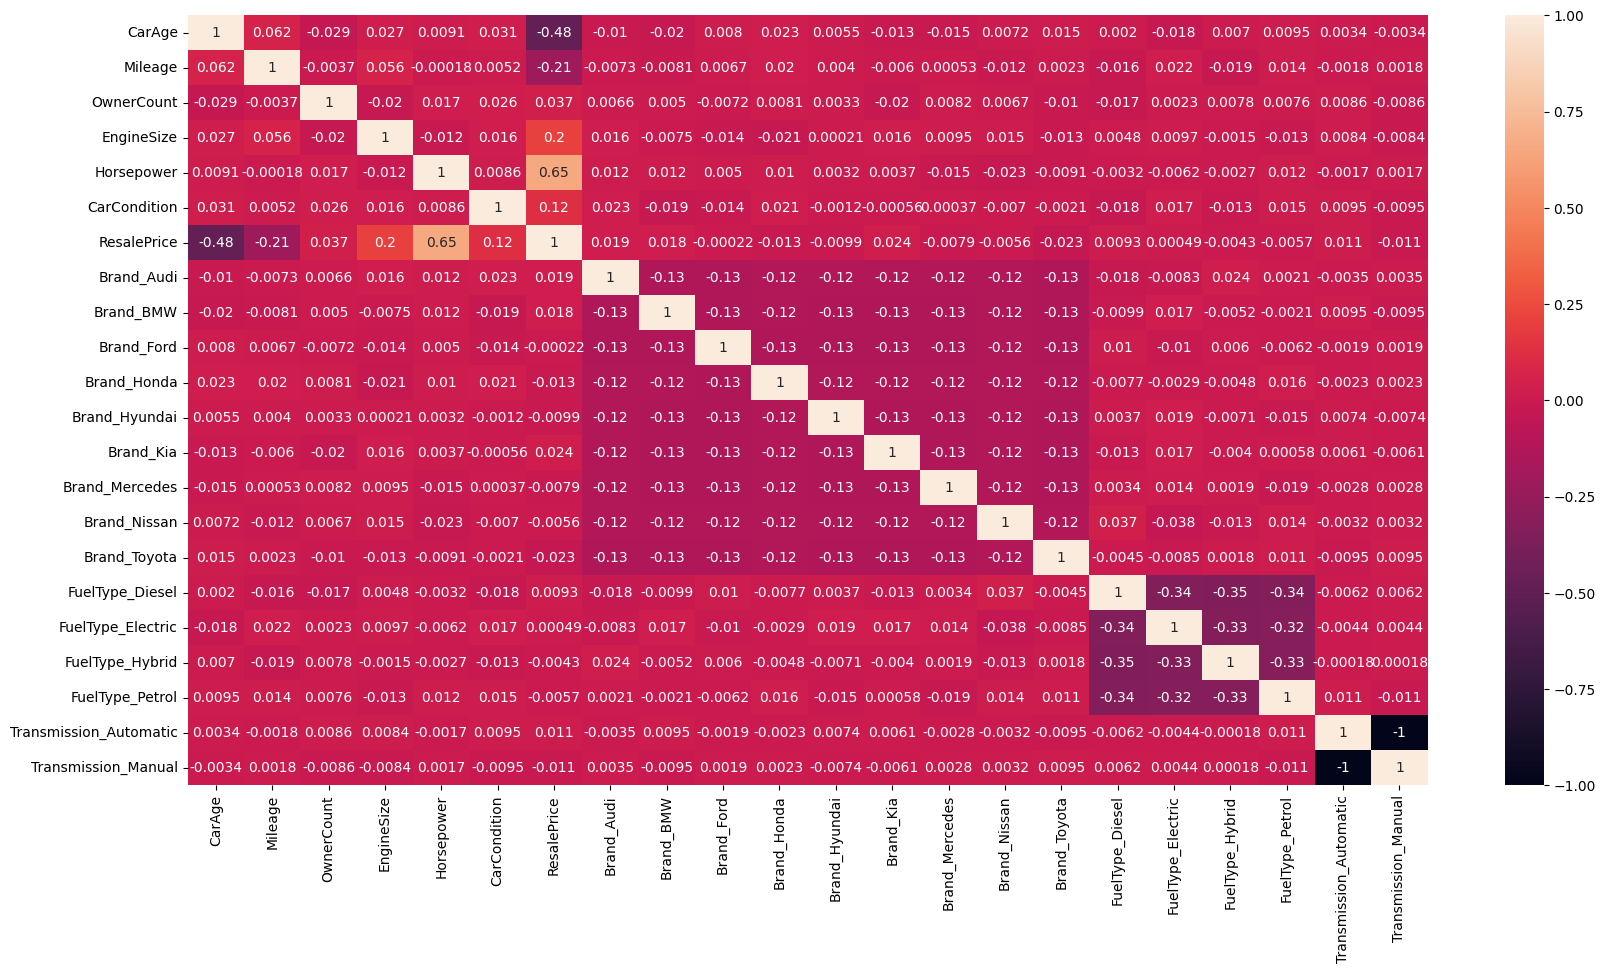

In [619]:
plt.figure(figsize=(20,10))
sns.heatmap(mode_data.corr(),annot=True)

<Axes: >

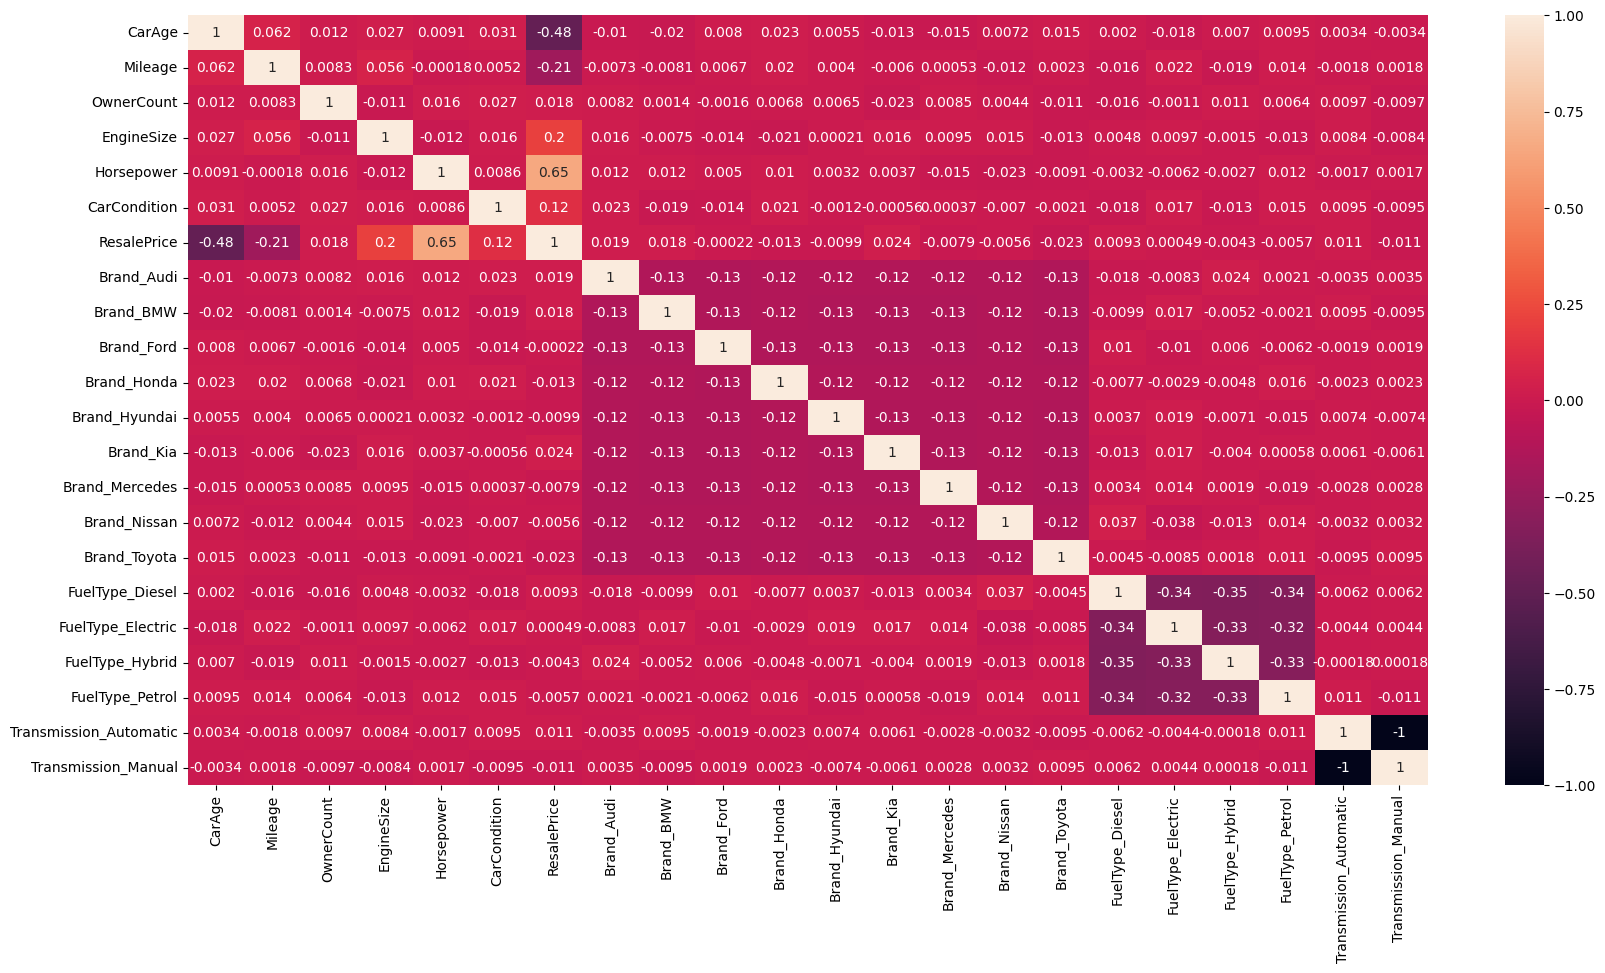

In [620]:
plt.figure(figsize=(20,10))
sns.heatmap(mean2_data.corr(),annot=True)


<Axes: >

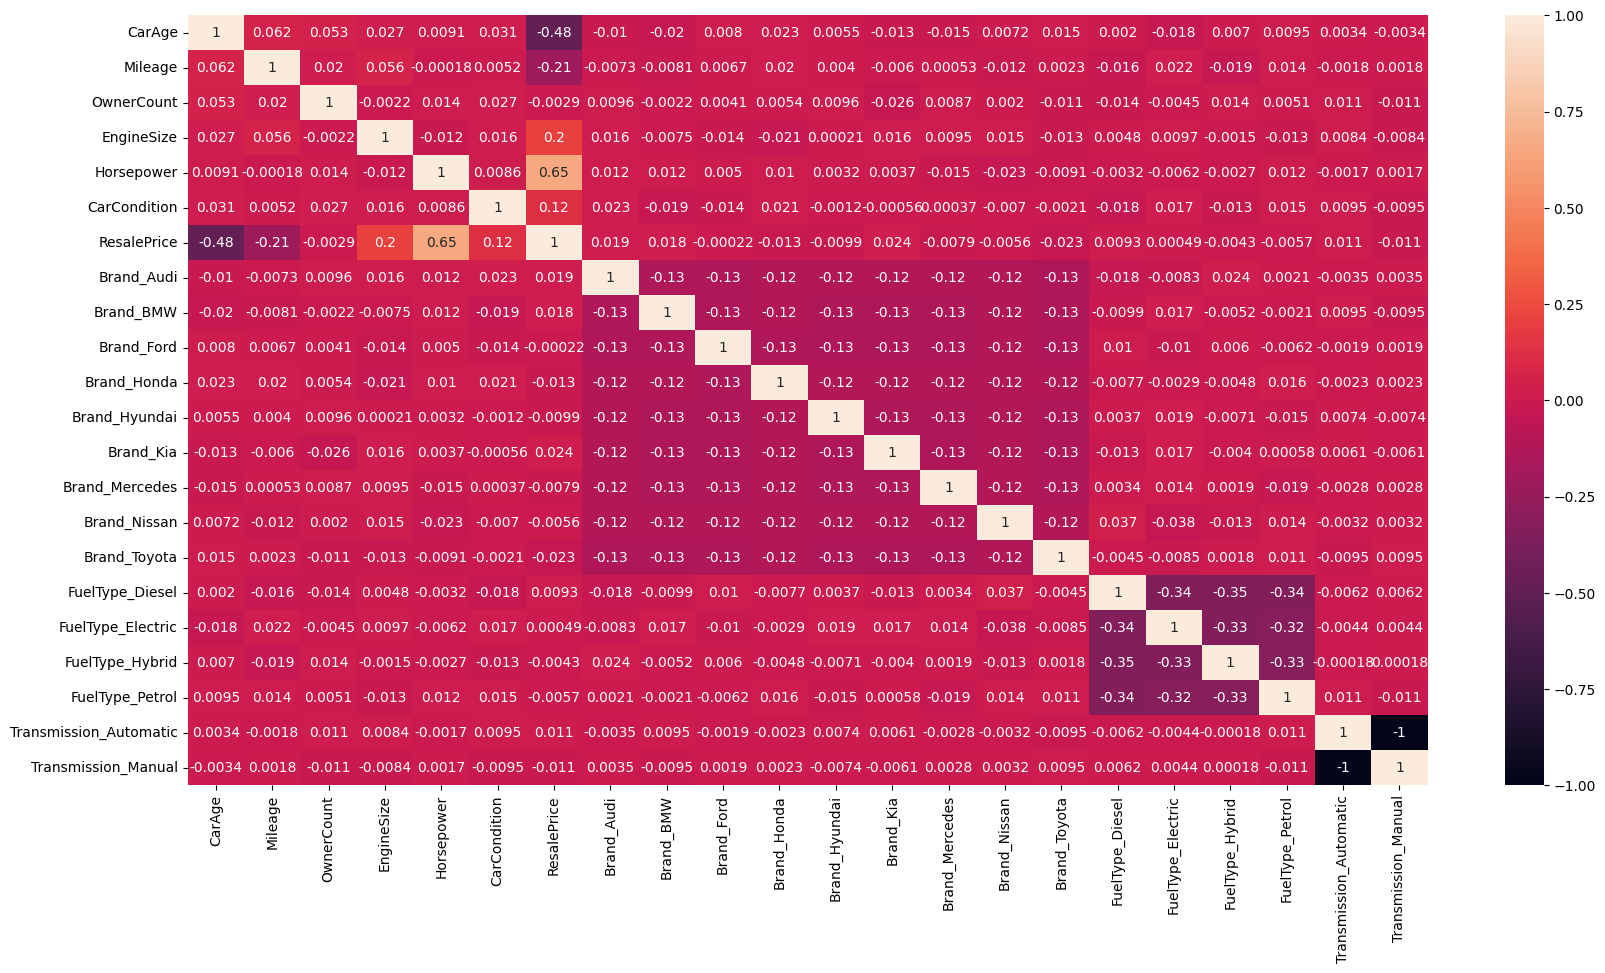

In [621]:
plt.figure(figsize=(20,10))
sns.heatmap(mean3_data.corr(),annot=True)


In [622]:
mode_data.corr()

CarAge   Mileage  OwnerCount  EngineSize  \
CarAge                  1.000000  0.061936   -0.028693    0.027316   
Mileage                 0.061936  1.000000   -0.003691    0.055866   
OwnerCount             -0.028693 -0.003691    1.000000   -0.020292   
EngineSize              0.027316  0.055866   -0.020292    1.000000   
Horsepower              0.009051 -0.000176    0.017384   -0.011504   
...                          ...       ...         ...         ...   
FuelType_Electric      -0.018453  0.022229    0.002285    0.009689   
FuelType_Hybrid         0.006952 -0.019380    0.007783   -0.001522   
FuelType_Petrol         0.009460  0.013894    0.007597   -0.013163   
Transmission_Automatic  0.003388 -0.001807    0.008648    0.008359   
Transmission_Manual    -0.003388  0.001807   -0.008648   -0.008359   

                        Horsepower  CarCondition  ResalePrice  Brand_Audi  \
CarAge                    0.009051      0.031123    -0.477215   -0.010257   
Mileage                  -0.000176      0.005211    -0.210357   -0.007303   
OwnerCount                0.017384      0.026093     0.037084    0.006607   
EngineSize               -0.011504      0.015749     0.204210    0.015836   
Horsepower                1.000000      0.008639     0.654101    0.011851   
...                            ...           ...          ...         ...   
FuelType_Electric        -0.006174      0.016649     0.000492   -0.008336   
FuelType_Hybrid          -0.002680     -0.013160    -0.004327    0.024364   
FuelType_Petrol           0.012260      0.014824    -0.005712    0.002069   
Transmission_Automatic   -0.001694      0.009478     0.010877   -0.003539   
Transmission_Manual       0.001694     -0.009478    -0.010877    0.003539   

                        Brand_BMW  Brand_Ford  ...  Brand_Kia  Brand_Mercedes  \
CarAge                  -0.019583    0.007997  ...  -0.013413       -0.014615   
Mileage                 -0.008059    0.006746  ...  -0.006049        0.000533   
OwnerCount               0.004995   -0.007226  ...  -0.019841        0.008246   
EngineSize              -0.007469   -0.014371  ...   0.015660        0.009507   
Horsepower               0.012216    0.005049  ...   0.003740       -0.014854   
...                           ...         ...  ...        ...             ...   
FuelType_Electric        0.017391   -0.010315  ...   0.017049        0.013508   
FuelType_Hybrid         -0.005180    0.006019  ...  -0.004013        0.001873   
FuelType_Petrol         -0.002084   -0.006215  ...   0.000583       -0.018993   
Transmission_Automatic   0.009484   -0.001893  ...   0.006076       -0.002797   
Transmission_Manual     -0.009484    0.001893  ...  -0.006076        0.002797   

                        Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
CarAge                      0.007161      0.014754         0.002003   
Mileage                    -0.012309      0.002316        -0.016137   
OwnerCount                  0.006747     -0.010425        -0.017314   
EngineSize                  0.015094     -0.012593         0.004817   
Horsepower                 -0.022589     -0.009144        -0.003231   
...                              ...           ...              ...   
FuelType_Electric          -0.037552     -0.008549        -0.339691   
FuelType_Hybrid            -0.013288      0.001836        -0.345584   
FuelType_Petrol             0.013599      0.011345        -0.335172   
Transmission_Automatic     -0.003151     -0.009478        -0.006230   
Transmission_Manual         0.003151      0.009478         0.006230   

                        FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
CarAge                          -0.018453         0.006952         0.009460   
Mileage                          0.022229        -0.019380         0.013894   
OwnerCount                       0.002285         0.007783         0.007597   
EngineSize                       0.009689        -0.001522        -0.013163   
Horsepower                      -0.0061

In [623]:
t1=mode_data.corr()
t2=mean2_data.corr()
t3=mean3_data.corr()

In [624]:
type(test)

list

In [625]:
test=[t1.loc['ResalePrice']]+[t2.loc['ResalePrice']]+[t3.loc['ResalePrice']]

In [626]:
test

[CarAge                   -0.477215
 Mileage                  -0.210357
 OwnerCount                0.037084
 EngineSize                0.204210
 Horsepower                0.654101
                             ...   
 FuelType_Electric         0.000492
 FuelType_Hybrid          -0.004327
 FuelType_Petrol          -0.005712
 Transmission_Automatic    0.010877
 Transmission_Manual      -0.010877
 Name: ResalePrice, Length: 22, dtype: float64,
 CarAge                   -0.477215
 Mileage                  -0.210357
 OwnerCount                0.017512
 EngineSize                0.204210
 Horsepower                0.654101
                             ...   
 FuelType_Electric         0.000492
 FuelType_Hybrid          -0.004327
 FuelType_Petrol          -0.005712
 Transmission_Automatic    0.010877
 Transmission_Manual      -0.010877
 Name: ResalePrice, Length: 22, dtype: float64,
 CarAge                   -0.477215
 Mileage                  -0.210357
 OwnerCount               -0.002851
 Eng

In [627]:
pd.DataFrame(test)

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  \
ResalePrice -0.477215 -0.210357    0.037084     0.20421    0.654101   
ResalePrice -0.477215 -0.210357    0.017512     0.20421    0.654101   
ResalePrice -0.477215 -0.210357   -0.002851     0.20421    0.654101   

             CarCondition  ResalePrice  Brand_Audi  Brand_BMW  Brand_Ford  \
ResalePrice      0.124087          1.0     0.01915   0.017619   -0.000224   
ResalePrice      0.124087          1.0     0.01915   0.017619   -0.000224   
ResalePrice      0.124087          1.0     0.01915   0.017619   -0.000224   

             ...  Brand_Kia  Brand_Mercedes  Brand_Nissan  Brand_Toyota  \
ResalePrice  ...   0.023511       -0.007907     -0.005571     -0.023471   
ResalePrice  ...   0.023511       -0.007907     -0.005571     -0.023471   
ResalePrice  ...   0.023511       -0.007907     -0.005571     -0.023471   

             FuelType_Diesel  FuelType_Electric  FuelType_Hybrid  \
ResalePrice         0.009347           0.000492        -0.004327   
ResalePrice         0.009347           0.000492        -0.004327   
ResalePrice         0.009347           0.000492        -0.004327   

             FuelType_Petrol  Transmission_Automatic  Transmission_Manual  
ResalePrice        -0.005712                0.010877            -0.010877  
ResalePrice        -0.005712                0.010877            -0.010877  
ResalePrice        -0.005712                0.010877            -0.010877  

[3 rows x 22 columns]

In [552]:
test.loc['ResalePrice']

CarAge                   -0.477215
Mileage                  -0.210357
OwnerCount                0.037084
EngineSize                0.204210
Horsepower                0.654101
                            ...   
Transmission_Manual      -0.010877
CarCondition_Excellent    0.118305
CarCondition_Fair        -0.049730
CarCondition_Good         0.006821
CarCondition_Poor        -0.076140
Name: ResalePrice, Length: 25, dtype: float64

In [ ]:
orig_Data

CarAge       Mileage     Brand  FuelType Transmission  OwnerCount  \
0         15  70539.725266     Honda  Electric       Manual         3.0   
1         11  72118.008487     Honda  Electric    Automatic         4.0   
2          8  38721.050239      Ford    Hybrid       Manual         2.0   
3          7  33675.655109       Kia    Petrol    Automatic         3.0   
4         19  51562.861259  Mercedes    Petrol    Automatic         4.0   
...      ...           ...       ...       ...          ...         ...   
4661       4  22710.582928      Audi    Hybrid       Manual         2.0   
4662       4  66193.150603   Hyundai    Diesel    Automatic         4.0   
4663       1  54614.234981      Ford  Electric    Automatic         2.0   
4664       7  52035.766674    Toyota    Hybrid       Manual         4.0   
4665      18  56126.950679    Toyota    Petrol       Manual         1.0   

      EngineSize  Horsepower CarCondition   ResalePrice  
0       1.858776  116.781923         Poor  37380.232721  
1       2.464409  150.064915         Fair  58279.184367  
2       1.666394  140.577568         Fair  52420.515613  
3       2.799322  157.020208         Poor  54195.804720  
4       2.423886  196.907490         Fair  57287.511089  
...          ...         ...          ...           ...  
4661    1.839159  170.177585         Fair  56808.958580  
4662    1.838883  162.177454         Poor  56224.633133  
4663    2.478123  178.078306    Excellent  68440.018358  
4664    1.629055  191.210803    Excellent  64847.894059  
4665    0.988205  173.368420         Fair  43329.185500  

[4666 rows x 10 columns]

In [ ]:
car_ds_1=pd.get_dummies(orig_Data,columns=['Brand','FuelType','Transmission'],dtype='int')

In [562]:
car_ds_1

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0     0.795836  0.789811    0.488897   -0.310932   -0.827016     -1.347687   
1     0.122484  0.855030    1.361247    0.736355    0.005449     -0.453700   
2    -0.382531 -0.525019   -0.383452   -0.643607   -0.231846     -0.453700   
3    -0.550869 -0.733508    0.488897    1.315501    0.179413     -1.347687   
4     1.469189  0.005638    1.361247    0.666281    1.177063     -0.453700   
...        ...       ...         ...         ...         ...           ...   
4661 -1.055884 -1.186614   -0.383452   -0.344854    0.508502     -0.453700   
4662 -1.055884  0.610200    1.361247   -0.345330    0.308405     -1.347687   
4663 -1.560898  0.131729   -0.383452    0.760070    0.706112      1.334276   
4664 -0.550869  0.025179    1.361247   -0.708175    1.034579      1.334276   
4665  1.300851  0.194238   -1.255802   -1.816360    0.588310     -0.453700   

      ResalePrice  Brand_Audi  Brand_BMW  Brand_Ford  ...  Brand_Kia  \
0       -1.222697   -0.351846   -0.35759   -0.361770  ...  -0.354916   
1        0.503683   -0.351846   -0.35759   -0.361770  ...  -0.354916   
2        0.019721   -0.351846   -0.35759    2.764189  ...  -0.354916   
3        0.166371   -0.351846   -0.35759   -0.361770  ...   2.817569   
4        0.421765   -0.351846   -0.35759   -0.361770  ...  -0.354916   
...           ...         ...        ...         ...  ...        ...   
4661     0.382233    2.842151   -0.35759   -0.361770  ...  -0.354916   
4662     0.333965   -0.351846   -0.35759   -0.361770  ...  -0.354916   
4663     1.343030   -0.351846   -0.35759    2.764189  ...  -0.354916   
4664     1.046298   -0.351846   -0.35759   -0.361770  ...  -0.354916   
4665    -0.731278   -0.351846   -0.35759   -0.361770  ...  -0.354916   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0          -0.353766     -0.342154     -0.356827        -0.595337   
1          -0.353766     -0.342154     -0.356827        -0.595337   
2          -0.353766     -0.342154     -0.356827        -0.595337   
3          -0.353766     -0.342154     -0.356827        -0.595337   
4           2.826724     -0.342154     -0.356827        -0.595337   
...              ...           ...           ...              ...   
4661       -0.353766     -0.342154     -0.356827        -0.595337   
4662       -0.353766     -0.342154     -0.356827         1.679720   
4663       -0.353766     -0.342154     -0.356827        -0.595337   
4664       -0.353766     -0.342154      2.802479        -0.595337   
4665       -0.353766     -0.342154      2.802479        -0.595337   

      FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0              1.752585        -0.580485        -0.562995   
1              1.752585        -0.580485        -0.562995   
2             -0.570586         1.722698        -0.562995   
3             -0.570586        -0.580485         1.776216   
4             -0.570586        -0.580485         1.776216   
...                 ...              ...              ...   
4661          -0.570586         1.722698        -0.562995   
4662          -0.570586        -0.580485        -0.562995   
4663           1.752585        -0.580485        -0.562995   
4664          -0.570586         1.722698        -0.562995   
4665          -0.570586        -0.580485         1.776216   

      Transmission_Automatic  Transmission_Manual  
0                  -0.986800             0.986800  
1                   1.013377            -1.013377  
2                  -0.986800             0.986800  
3                   1.013377            -1.013377  
4                   1.013377            -1.013377  
...                      ...                  ...  
4661               -0.986800             0.986800  
4662                1.013377            -1.013377  
4663                1.013377            -1.013377  
4664               -0.986800             0.986800  
4665               -0.986800             0.986800  

[4666 rows x 22 col

In [577]:
pd.set_option('display.max_rows',None)
mode_data[0:1].T

0
CarAge                     15.000000
Mileage                 70539.725266
OwnerCount                  3.000000
EngineSize                  1.858776
Horsepower                116.781923
ResalePrice             37380.232721
Brand_Audi                  0.000000
Brand_BMW                   0.000000
Brand_Ford                  0.000000
Brand_Honda                 1.000000
Brand_Hyundai               0.000000
Brand_Kia                   0.000000
Brand_Mercedes              0.000000
Brand_Nissan                0.000000
Brand_Toyota                0.000000
FuelType_Diesel             0.000000
FuelType_Electric           1.000000
FuelType_Hybrid             0.000000
FuelType_Petrol             0.000000
Transmission_Automatic      0.000000
Transmission_Manual         1.000000
CarCondition_Excellent      0.000000
CarCondition_Fair           0.000000
CarCondition_Good           0.000000
CarCondition_Poor           1.000000

In [580]:
mode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CarAge                  4666 non-null   int64  
 1   Mileage                 4666 non-null   float64
 2   OwnerCount              4666 non-null   float64
 3   EngineSize              4666 non-null   float64
 4   Horsepower              4666 non-null   float64
 5   ResalePrice             4666 non-null   float64
 6   Brand_Audi              4666 non-null   int64  
 7   Brand_BMW               4666 non-null   int64  
 8   Brand_Ford              4666 non-null   int64  
 9   Brand_Honda             4666 non-null   int64  
 10  Brand_Hyundai           4666 non-null   int64  
 11  Brand_Kia               4666 non-null   int64  
 12  Brand_Mercedes          4666 non-null   int64  
 13  Brand_Nissan            4666 non-null   int64  
 14  Brand_Toyota            4666 non-null   

In [628]:
mode_data_X=mode_data.drop(columns=['ResalePrice'])
mode_data_y=mode_data['ResalePrice']

In [633]:
print(mode_data.shape)
print(mode_data_X.shape)

(4666, 22)
(4666, 21)


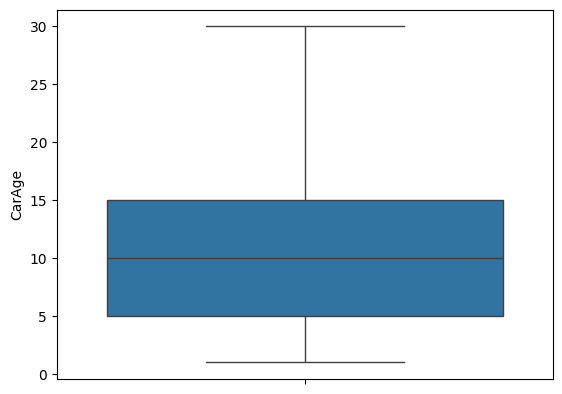

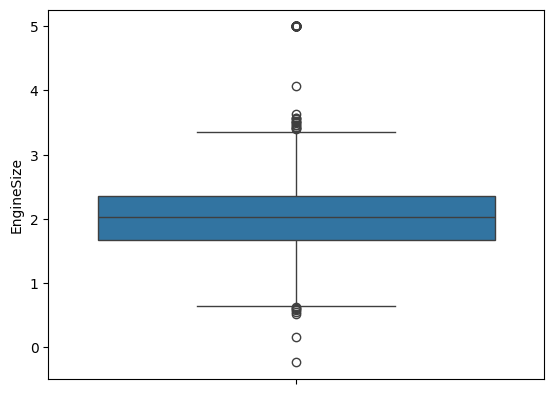

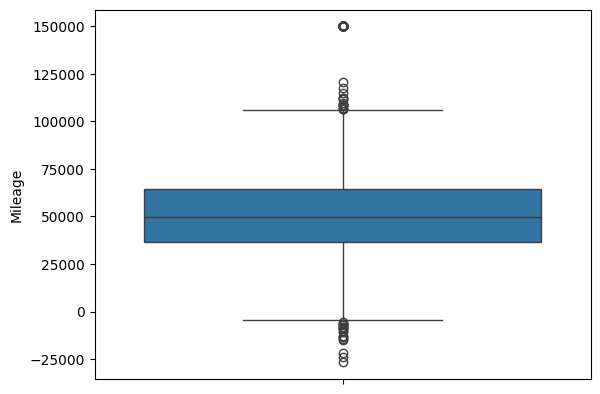

In [636]:
for i in ['CarAge','EngineSize','Mileage']:
    sns.boxplot(mode_data_X[i])
    plt.show()

In [639]:
print(mode_data['EngineSize'].min())
print(mode_data['EngineSize'].max())

-0.2392611444027386
5.0


In [640]:
print(mode_data['Mileage'].min())
print(mode_data['Mileage'].max())

-26733.110969187383
150000.0


In [654]:
pd.set_option('display.max_rows',100)
print(mode_data['Mileage'][(mode_data['Mileage'] < -1000) | (mode_data['Mileage'] > 110000)].value_counts().sort_index(ascending=False))
print(mode_data['Mileage'][(mode_data['Mileage'] < -1000) | (mode_data['Mileage'] > 110000)].value_counts().count())

Mileage
 150000.000000    83
 120581.103751     1
 117547.658382     1
 114861.859392     1
 112353.622584     1
 112258.204021     1
 111965.988681     1
 111537.207404     1
-1070.991921       1
-2062.741757       1
-2362.663974       1
-2496.341127       1
-2614.602737       1
-3491.342563       1
-4066.960942       1
-4087.832632       1
-4150.877108       1
-4252.251276       1
-5476.298799       1
-6646.518500       1
-6660.605803       1
-6750.128828       1
-6781.573190       1
-7000.602186       1
-7990.277597       1
-8285.119796       1
-8588.973800       1
-8862.831309       1
-9084.978825       1
-10152.646794      1
-10893.130785      1
-12770.293325      1
-13408.514718      1
-13534.076264      1
-14420.327120      1
-14830.276507      1
-22021.702089      1
-23767.305829      1
-26733.110969      1
Name: count, dtype: int64
39


In [653]:
pd.set_option('display.max_rows',15)
print(mode_data['EngineSize'][(mode_data['EngineSize'] < 0.75) | (mode_data['EngineSize'] > 3.25)].value_counts())
print(mode_data['EngineSize'][(mode_data['EngineSize'] < 0.75) | (mode_data['EngineSize'] > 3.25)].value_counts().count())

EngineSize
5.000000    48
3.570555     1
0.549607     1
0.508034     1
3.427342     1
            ..
3.270883     1
3.505660     1
0.641845     1
3.359956     1
3.351927     1
Name: count, Length: 54, dtype: int64
54


In [ ]:
car_ds_1['Transmission_Automatic'].value_counts()

Transmission_Automatic
0    2364
1    2302
Name: count, dtype: int64

In [ ]:
car_ds_1['Transmission_Manual'].value_counts()

Transmission_Manual
1    2364
0    2302
Name: count, dtype: int64

In [ ]:
car_ds_1.dtypes

CarAge                      int64
Mileage                   float64
OwnerCount                float64
EngineSize                float64
Horsepower                float64
CarCondition               object
ResalePrice               float64
Brand_Audi                  int64
Brand_BMW                   int64
Brand_Ford                  int64
Brand_Honda                 int64
Brand_Hyundai               int64
Brand_Kia                   int64
Brand_Mercedes              int64
Brand_Nissan                int64
Brand_Toyota                int64
FuelType_Diesel             int64
FuelType_Electric           int64
FuelType_Hybrid             int64
FuelType_Petrol             int64
Transmission_Automatic      int64
Transmission_Manual         int64
dtype: object

In [ ]:
car_ds_1['CarCondition'].value_counts()

CarCondition
Fair         1190
Excellent    1188
Poor         1148
Good         1140
Name: count, dtype: int64

In [ ]:
# Define a mapping from category to integer
CarCondition_ordinal_map = {
    "Poor": 0,
    "Fair": 1,
    "Good": 2,
    "Excellent": 3
}

In [ ]:
car_ds_1['CarCondition']=car_ds_1['CarCondition'].map(CarCondition_ordinal_map)

In [ ]:
car_ds_1

CarAge       Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0         15  70539.725266         3.0    1.858776  116.781923             0   
1         11  72118.008487         4.0    2.464409  150.064915             1   
2          8  38721.050239         2.0    1.666394  140.577568             1   
3          7  33675.655109         3.0    2.799322  157.020208             0   
4         19  51562.861259         4.0    2.423886  196.907490             1   
...      ...           ...         ...         ...         ...           ...   
4661       4  22710.582928         2.0    1.839159  170.177585             1   
4662       4  66193.150603         4.0    1.838883  162.177454             0   
4663       1  54614.234981         2.0    2.478123  178.078306             3   
4664       7  52035.766674         4.0    1.629055  191.210803             3   
4665      18  56126.950679         1.0    0.988205  173.368420             1   

       ResalePrice  Brand_Audi  Brand_BMW  Brand_Ford  ...  Brand_Kia  \
0     37380.232721           0          0           0  ...          0   
1     58279.184367           0          0           0  ...          0   
2     52420.515613           0          0           1  ...          0   
3     54195.804720           0          0           0  ...          1   
4     57287.511089           0          0           0  ...          0   
...            ...         ...        ...         ...  ...        ...   
4661  56808.958580           1          0           0  ...          0   
4662  56224.633133           0          0           0  ...          0   
4663  68440.018358           0          0           1  ...          0   
4664  64847.894059           0          0           0  ...          0   
4665  43329.185500           0          0           0  ...          0   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0                  0             0             0                0   
1                  0             0             0                0   
2                  0             0             0                0   
3                  0             0             0                0   
4                  1             0             0                0   
...              ...           ...           ...              ...   
4661               0             0             0                0   
4662               0             0             0                1   
4663               0             0             0                0   
4664               0             0             1                0   
4665               0             0             1                0   

      FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0                     1                0                0   
1                     1                0                0   
2                     0                1                0   
3                     0                0                1   
4                     0                0                1   
...                 ...              ...              ...   
4661                  0                1                0   
4662                  0                0                0   
4663                  1                0                0   
4664                  0                1                0   
4665                  0                0                1   

      Transmission_Automatic  Transmission_Manual  
0                          0                    1  
1                          1                    0  
2                          0                    1  
3                          1                    0  
4                          1                    0  
...                      ...                  ...  
4661                       0                    1  
4662                       1                    0  
4663                       1                    0  
4664                       0                    1  
4665                       0      

In [630]:
car_ds_1.dtypes

CarAge                    float64
Mileage                   float64
OwnerCount                float64
EngineSize                float64
Horsepower                float64
                           ...   
FuelType_Electric         float64
FuelType_Hybrid           float64
FuelType_Petrol           float64
Transmission_Automatic    float64
Transmission_Manual       float64
Length: 22, dtype: object

In [632]:
pd.set_option('display.max_rows',25)
car_ds_1.corr()

CarAge   Mileage  OwnerCount  EngineSize  \
CarAge                  1.000000  0.061936   -0.028693    0.027316   
Mileage                 0.061936  1.000000   -0.003691    0.055866   
OwnerCount             -0.028693 -0.003691    1.000000   -0.020292   
EngineSize              0.027316  0.055866   -0.020292    1.000000   
Horsepower              0.009051 -0.000176    0.017384   -0.011504   
CarCondition            0.031123  0.005211    0.026093    0.015749   
ResalePrice            -0.477215 -0.210357    0.037084    0.204210   
Brand_Audi             -0.010257 -0.007303    0.006607    0.015836   
Brand_BMW              -0.019583 -0.008059    0.004995   -0.007469   
Brand_Ford              0.007997  0.006746   -0.007226   -0.014371   
Brand_Honda             0.022864  0.019955    0.008107   -0.021329   
Brand_Hyundai           0.005472  0.004015    0.003291    0.000207   
Brand_Kia              -0.013413 -0.006049   -0.019841    0.015660   
Brand_Mercedes         -0.014615  0.000533    0.008246    0.009507   
Brand_Nissan            0.007161 -0.012309    0.006747    0.015094   
Brand_Toyota            0.014754  0.002316   -0.010425   -0.012593   
FuelType_Diesel         0.002003 -0.016137   -0.017314    0.004817   
FuelType_Electric      -0.018453  0.022229    0.002285    0.009689   
FuelType_Hybrid         0.006952 -0.019380    0.007783   -0.001522   
FuelType_Petrol         0.009460  0.013894    0.007597   -0.013163   
Transmission_Automatic  0.003388 -0.001807    0.008648    0.008359   
Transmission_Manual    -0.003388  0.001807   -0.008648   -0.008359   

                        Horsepower  CarCondition  ResalePrice  Brand_Audi  \
CarAge                    0.009051      0.031123    -0.477215   -0.010257   
Mileage                  -0.000176      0.005211    -0.210357   -0.007303   
OwnerCount                0.017384      0.026093     0.037084    0.006607   
EngineSize               -0.011504      0.015749     0.204210    0.015836   
Horsepower                1.000000      0.008639     0.654101    0.011851   
CarCondition              0.008639      1.000000     0.124087    0.023343   
ResalePrice               0.654101      0.124087     1.000000    0.019150   
Brand_Audi                0.011851      0.023343     0.019150    1.000000   
Brand_BMW                 0.012216     -0.019017     0.017619   -0.125817   
Brand_Ford                0.005049     -0.014404    -0.000224   -0.127287   
Brand_Honda               0.010023      0.021122    -0.013488   -0.122438   
Brand_Hyundai             0.003157     -0.001164    -0.009875   -0.124876   
Brand_Kia                 0.003740     -0.000557     0.023511   -0.124876   
Brand_Mercedes           -0.014854      0.000370    -0.007907   -0.124471   
Brand_Nissan             -0.022589     -0.006986    -0.005571   -0.120386   
Brand_Toyota             -0.009144     -0.002090    -0.023471   -0.125548   
FuelType_Diesel          -0.003231     -0.017723     0.009347   -0.017915   
FuelType_Electric        -0.006174      0.016649     0.000492   -0.008336   
FuelType_Hybrid          -0.002680     -0.013160    -0.004327    0.024364   
FuelType_Petrol           0.012260      0.014824    -0.005712    0.002069   
Transmission_Automatic   -0.001694      0.009478     0.010877   -0.003539   
Transmission_Manual       0.001694     -0.009478    -0.010877    0.003539   

                        Brand_BMW  Brand_Ford  ...  Brand_Kia  Brand_Mercedes  \
CarAge                  -0.019583    0.007997  ...  -0.013413       -0.014615   
Mileage                 -0.008059    0.006746  ...  -0.006049        0.000533   
OwnerCount               0.004995   -0.007226  ...  -0.019841        0.008246   
EngineSize              -0.007469   -0.014371  ...   0.015660        0.009507   
Horsepower               0.012216    0.005049  ...   0.003740       -0.014854   
CarCondition            -0.019017   -0.014404  ...  -0.000557        0.000370   
ResalePrice              0.017619   -0.000224  ...   0.023511       -0.00790

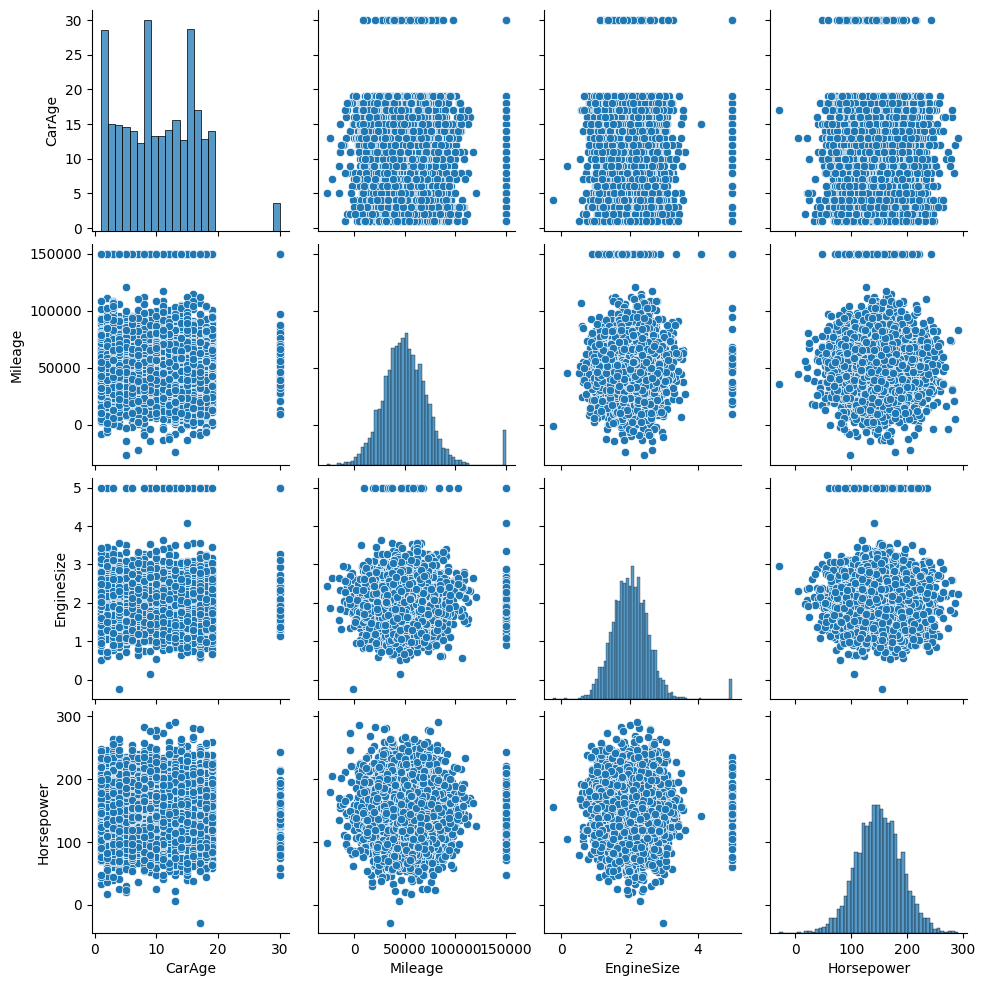

In [ ]:
sns.pairplot(car_ds_1[['CarAge','Mileage','EngineSize','Horsepower']])

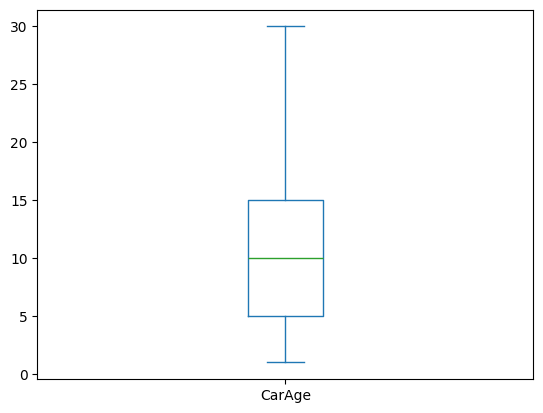

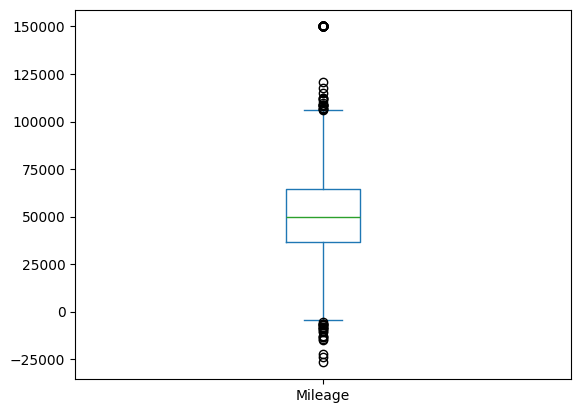

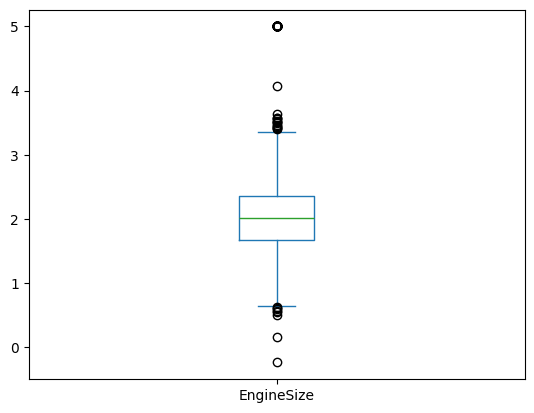

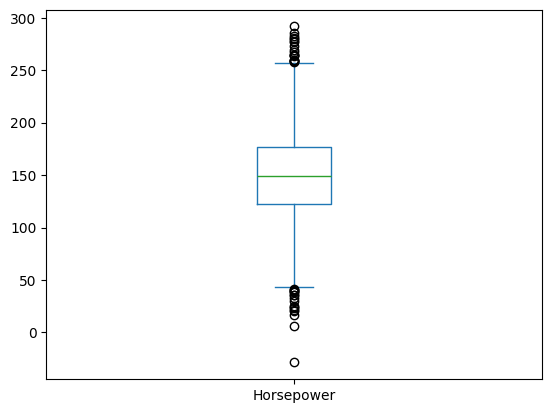

In [ ]:
for i in ['CarAge','Mileage','EngineSize','Horsepower']:
    car_ds_1[i].plot(kind='box')
    plt.show()

In [655]:
scaling=StandardScaler()

In [673]:
scaling = StandardScaler()

In [657]:
mode_data_X.head()

CarAge       Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0      15  70539.725266         3.0    1.858776  116.781923             1   
1      11  72118.008487         4.0    2.464409  150.064915             2   
2       8  38721.050239         2.0    1.666394  140.577568             2   
3       7  33675.655109         3.0    2.799322  157.020208             1   
4      19  51562.861259         4.0    2.423886  196.907490             2   

   Brand_Audi  Brand_BMW  Brand_Ford  Brand_Honda  ...  Brand_Kia  \
0           0          0           0            1  ...          0   
1           0          0           0            1  ...          0   
2           0          0           1            0  ...          0   
3           0          0           0            0  ...          1   
4           0          0           0            0  ...          0   

   Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0               0             0             0                0   
1               0             0             0                0   
2               0             0             0                0   
3               0             0             0                0   
4               1             0             0                0   

   FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0                  1                0                0   
1                  1                0                0   
2                  0                1                0   
3                  0                0                1   
4                  0                0                1   

   Transmission_Automatic  Transmission_Manual  
0                       0                    1  
1                       1                    0  
2                       0                    1  
3                       1                    0  
4                       1                    0  

[5 rows x 21 columns]

In [664]:
scaling.fit_transform(mode_data_X[mode_data_X.columns])

array([[ 0.79583611,  0.78981135,  0.48889714, ..., -0.56299469,
        -0.98679951,  0.98679951],
       [ 0.1224835 ,  0.85503013,  1.36124667, ..., -0.56299469,
         1.01337708, -1.01337708],
       [-0.38253095, -0.52501937, -0.3834524 , ..., -0.56299469,
        -0.98679951,  0.98679951],
       ...,
       [-1.56089801,  0.13172851, -0.3834524 , ..., -0.56299469,
         1.01337708, -1.01337708],
       [-0.5508691 ,  0.02517947,  1.36124667, ..., -0.56299469,
        -0.98679951,  0.98679951],
       [ 1.30085056,  0.19423788, -1.25580194, ...,  1.77621567,
        -0.98679951,  0.98679951]])

In [660]:
mode_data_X.head()

CarAge       Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0      15  70539.725266         3.0    1.858776  116.781923             1   
1      11  72118.008487         4.0    2.464409  150.064915             2   
2       8  38721.050239         2.0    1.666394  140.577568             2   
3       7  33675.655109         3.0    2.799322  157.020208             1   
4      19  51562.861259         4.0    2.423886  196.907490             2   

   Brand_Audi  Brand_BMW  Brand_Ford  Brand_Honda  ...  Brand_Kia  \
0           0          0           0            1  ...          0   
1           0          0           0            1  ...          0   
2           0          0           1            0  ...          0   
3           0          0           0            0  ...          1   
4           0          0           0            0  ...          0   

   Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0               0             0             0                0   
1               0             0             0                0   
2               0             0             0                0   
3               0             0             0                0   
4               1             0             0                0   

   FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0                  1                0                0   
1                  1                0                0   
2                  0                1                0   
3                  0                0                1   
4                  0                0                1   

   Transmission_Automatic  Transmission_Manual  
0                       0                    1  
1                       1                    0  
2                       0                    1  
3                       1                    0  
4                       1                    0  

[5 rows x 21 columns]

In [666]:
mode_data_X_cols=mode_data_X.columns

In [669]:
mode_data_X_sc_fe=scaling.fit_transform(mode_data_X[mode_data_X_cols])

In [672]:
mode_data_X[mode_data_X_cols]

CarAge       Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0         15  70539.725266         3.0    1.858776  116.781923             1   
1         11  72118.008487         4.0    2.464409  150.064915             2   
2          8  38721.050239         2.0    1.666394  140.577568             2   
3          7  33675.655109         3.0    2.799322  157.020208             1   
4         19  51562.861259         4.0    2.423886  196.907490             2   
...      ...           ...         ...         ...         ...           ...   
4661       4  22710.582928         2.0    1.839159  170.177585             2   
4662       4  66193.150603         4.0    1.838883  162.177454             1   
4663       1  54614.234981         2.0    2.478123  178.078306             4   
4664       7  52035.766674         4.0    1.629055  191.210803             4   
4665      18  56126.950679         1.0    0.988205  173.368420             2   

      Brand_Audi  Brand_BMW  Brand_Ford  Brand_Honda  ...  Brand_Kia  \
0              0          0           0            1  ...          0   
1              0          0           0            1  ...          0   
2              0          0           1            0  ...          0   
3              0          0           0            0  ...          1   
4              0          0           0            0  ...          0   
...          ...        ...         ...          ...  ...        ...   
4661           1          0           0            0  ...          0   
4662           0          0           0            0  ...          0   
4663           0          0           1            0  ...          0   
4664           0          0           0            0  ...          0   
4665           0          0           0            0  ...          0   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0                  0             0             0                0   
1                  0             0             0                0   
2                  0             0             0                0   
3                  0             0             0                0   
4                  1             0             0                0   
...              ...           ...           ...              ...   
4661               0             0             0                0   
4662               0             0             0                1   
4663               0             0             0                0   
4664               0             0             1                0   
4665               0             0             1                0   

      FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0                     1                0                0   
1                     1                0                0   
2                     0                1                0   
3                     0                0                1   
4                     0                0                1   
...                 ...              ...              ...   
4661                  0                1                0   
4662                  0                0                0   
4663                  1                0                0   
4664                  0                1                0   
4665                  0                0                1   

      Transmission_Automatic  Transmission_Manual  
0                          0                    1  
1                          1                    0  
2                          0                    1  
3                          1                    0  
4                          1                    0  
...                      ...                  ...  
4661                       0                    1  
4662                       1                    0  
4663                       1                    0  
4664                       0                    1  
4665                       0                  

In [678]:
mode_data_X_sc_fe[mode_data_X_cols]=scaling.fit_transform(mode_data_X[mode_data_X_cols])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [676]:
mode_data_X[mode_data_X_cols]=scaling.fit_transform(mode_data_X[mode_data_X_cols])
# car_ds_1[scaled_features]=scaling.fit_transform(car_ds_1[scaled_features])

In [681]:
mode_data_X.head()

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0  0.795836  0.789811    0.488897   -0.310932   -0.827016     -1.347687   
1  0.122484  0.855030    1.361247    0.736355    0.005449     -0.453700   
2 -0.382531 -0.525019   -0.383452   -0.643607   -0.231846     -0.453700   
3 -0.550869 -0.733508    0.488897    1.315501    0.179413     -1.347687   
4  1.469189  0.005638    1.361247    0.666281    1.177063     -0.453700   

   Brand_Audi  Brand_BMW  Brand_Ford  Brand_Honda  ...  Brand_Kia  \
0   -0.351846   -0.35759   -0.361770     2.873663  ...  -0.354916   
1   -0.351846   -0.35759   -0.361770     2.873663  ...  -0.354916   
2   -0.351846   -0.35759    2.764189    -0.347988  ...  -0.354916   
3   -0.351846   -0.35759   -0.361770    -0.347988  ...   2.817569   
4   -0.351846   -0.35759   -0.361770    -0.347988  ...  -0.354916   

   Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0       -0.353766     -0.342154     -0.356827        -0.595337   
1       -0.353766     -0.342154     -0.356827        -0.595337   
2       -0.353766     -0.342154     -0.356827        -0.595337   
3       -0.353766     -0.342154     -0.356827        -0.595337   
4        2.826724     -0.342154     -0.356827        -0.595337   

   FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0           1.752585        -0.580485        -0.562995   
1           1.752585        -0.580485        -0.562995   
2          -0.570586         1.722698        -0.562995   
3          -0.570586        -0.580485         1.776216   
4          -0.570586        -0.580485         1.776216   

   Transmission_Automatic  Transmission_Manual  
0               -0.986800             0.986800  
1                1.013377            -1.013377  
2               -0.986800             0.986800  
3                1.013377            -1.013377  
4                1.013377            -1.013377  

[5 rows x 21 columns]

In [682]:
mode_data_X['ResalePrice']=orig_Data['ResalePrice']

In [683]:
mode_data_X.shape

(4666, 22)

<Axes: >

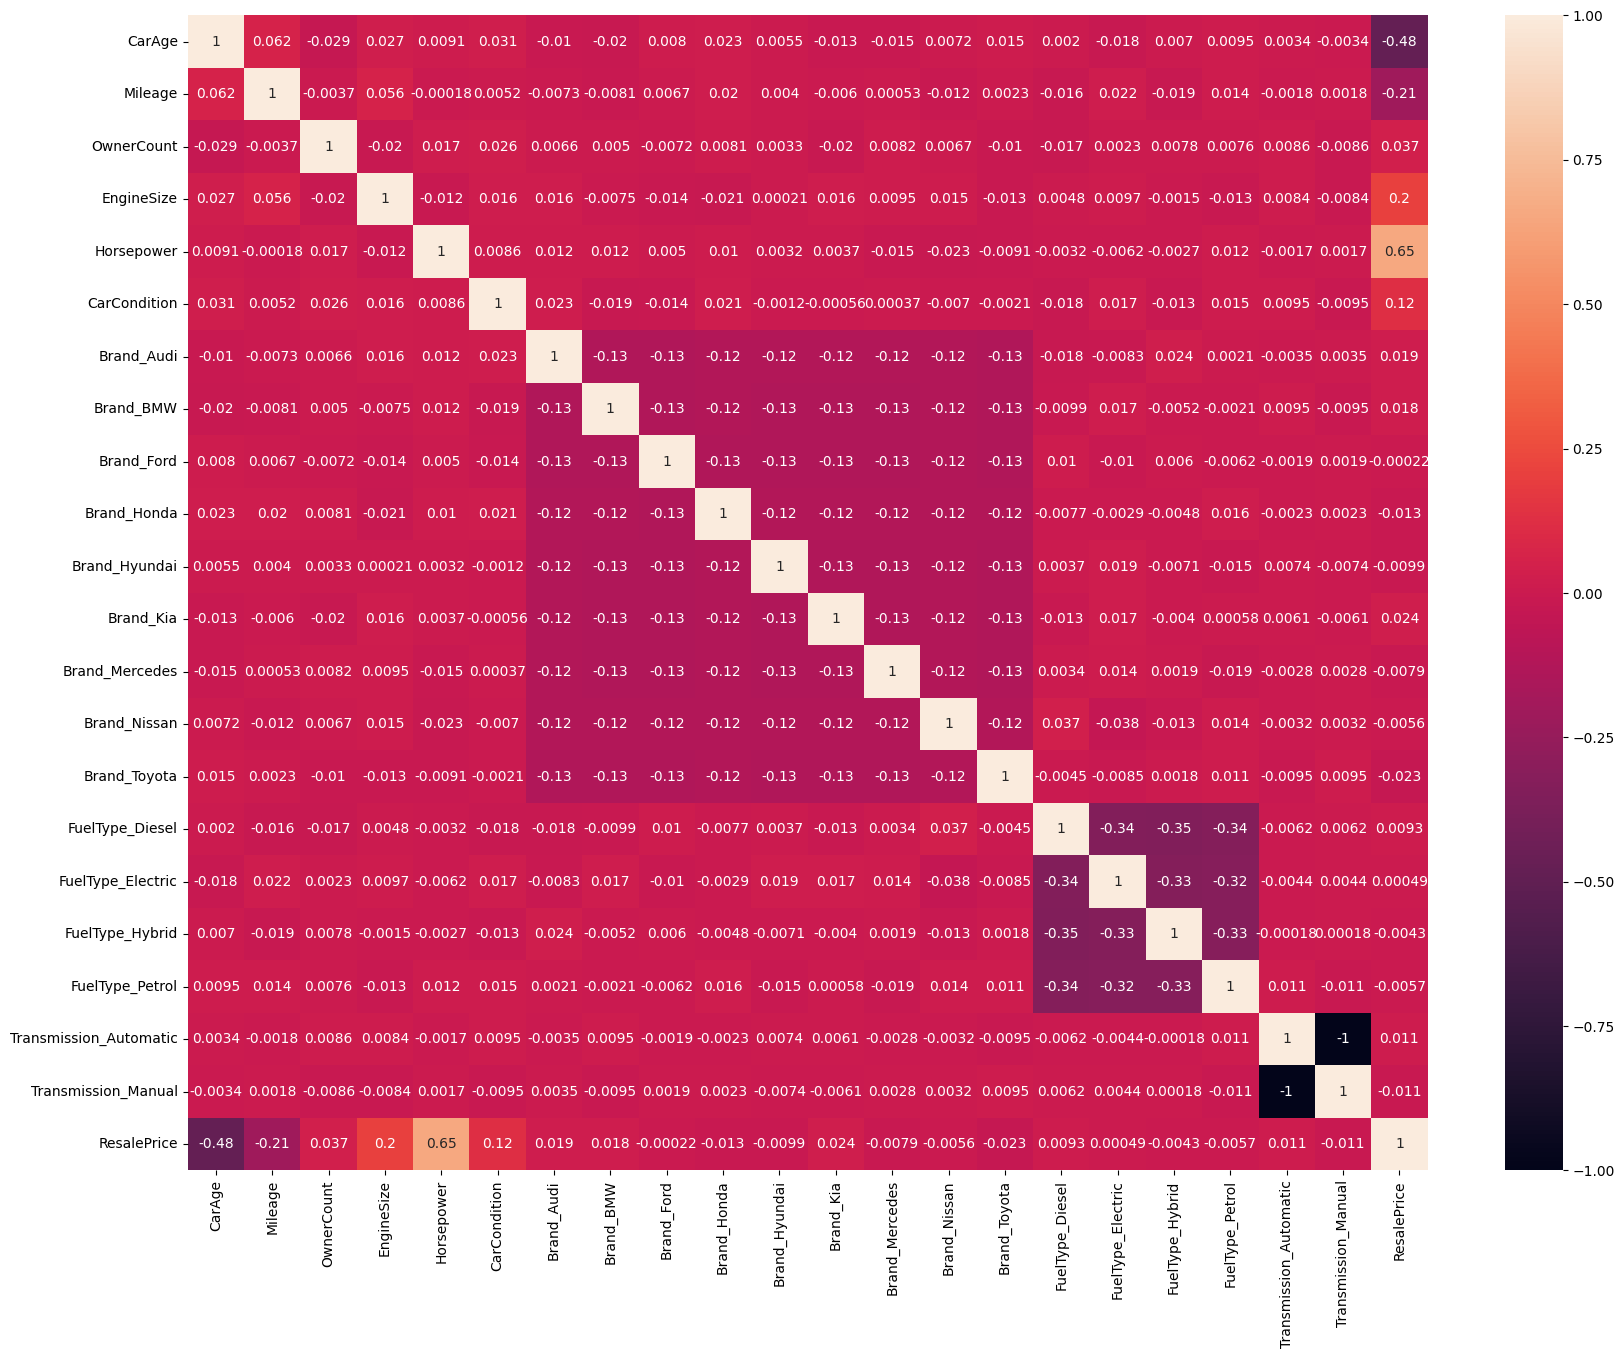

In [687]:
plt.figure(figsize=(20,15))
sns.heatmap(mode_data_X.corr(),annot=True)

In [701]:
mode_data_X=mode_data_X.drop(columns='ResalePrice')

In [ ]:
car_ds_1.dtypes

CarAge                      int64
Mileage                   float64
OwnerCount                float64
EngineSize                float64
Horsepower                float64
CarCondition                int64
ResalePrice               float64
Brand_Audi                  int64
Brand_BMW                   int64
Brand_Ford                  int64
Brand_Honda                 int64
Brand_Hyundai               int64
Brand_Kia                   int64
Brand_Mercedes              int64
Brand_Nissan                int64
Brand_Toyota                int64
FuelType_Diesel             int64
FuelType_Electric           int64
FuelType_Hybrid             int64
FuelType_Petrol             int64
Transmission_Automatic      int64
Transmission_Manual         int64
dtype: object

In [ ]:
scaled_features = car_ds_1.columns

In [ ]:
scaling.fit_transform(car_ds_1[scaled_features])

array([[ 0.79583611,  0.78981135,  0.48889714, ..., -0.56299469,
        -0.98679951,  0.98679951],
       [ 0.1224835 ,  0.85503013,  1.36124667, ..., -0.56299469,
         1.01337708, -1.01337708],
       [-0.38253095, -0.52501937, -0.3834524 , ..., -0.56299469,
        -0.98679951,  0.98679951],
       ...,
       [-1.56089801,  0.13172851, -0.3834524 , ..., -0.56299469,
         1.01337708, -1.01337708],
       [-0.5508691 ,  0.02517947,  1.36124667, ..., -0.56299469,
        -0.98679951,  0.98679951],
       [ 1.30085056,  0.19423788, -1.25580194, ...,  1.77621567,
        -0.98679951,  0.98679951]])

In [ ]:
car_ds_1[scaled_features]

CarAge       Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0         15  70539.725266         3.0    1.858776  116.781923             0   
1         11  72118.008487         4.0    2.464409  150.064915             1   
2          8  38721.050239         2.0    1.666394  140.577568             1   
3          7  33675.655109         3.0    2.799322  157.020208             0   
4         19  51562.861259         4.0    2.423886  196.907490             1   
...      ...           ...         ...         ...         ...           ...   
4661       4  22710.582928         2.0    1.839159  170.177585             1   
4662       4  66193.150603         4.0    1.838883  162.177454             0   
4663       1  54614.234981         2.0    2.478123  178.078306             3   
4664       7  52035.766674         4.0    1.629055  191.210803             3   
4665      18  56126.950679         1.0    0.988205  173.368420             1   

       ResalePrice  Brand_Audi  Brand_BMW  Brand_Ford  ...  Brand_Kia  \
0     37380.232721           0          0           0  ...          0   
1     58279.184367           0          0           0  ...          0   
2     52420.515613           0          0           1  ...          0   
3     54195.804720           0          0           0  ...          1   
4     57287.511089           0          0           0  ...          0   
...            ...         ...        ...         ...  ...        ...   
4661  56808.958580           1          0           0  ...          0   
4662  56224.633133           0          0           0  ...          0   
4663  68440.018358           0          0           1  ...          0   
4664  64847.894059           0          0           0  ...          0   
4665  43329.185500           0          0           0  ...          0   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0                  0             0             0                0   
1                  0             0             0                0   
2                  0             0             0                0   
3                  0             0             0                0   
4                  1             0             0                0   
...              ...           ...           ...              ...   
4661               0             0             0                0   
4662               0             0             0                1   
4663               0             0             0                0   
4664               0             0             1                0   
4665               0             0             1                0   

      FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0                     1                0                0   
1                     1                0                0   
2                     0                1                0   
3                     0                0                1   
4                     0                0                1   
...                 ...              ...              ...   
4661                  0                1                0   
4662                  0                0                0   
4663                  1                0                0   
4664                  0                1                0   
4665                  0                0                1   

      Transmission_Automatic  Transmission_Manual  
0                          0                    1  
1                          1                    0  
2                          0                    1  
3                          1                    0  
4                          1                    0  
...                      ...                  ...  
4661                       0                    1  
4662                       1                    0  
4663                       1                    0  
4664                       0                    1  
4665                       0      

In [ ]:
car_ds_1[scaled_features]=scaling.fit_transform(car_ds_1[scaled_features])

In [675]:
car_ds_1[scaled_features]=scaling.fit_transform(car_ds_1[scaled_features])

In [ ]:
car_ds_1[scaled_features]

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0     0.795836  0.789811    0.488897   -0.310932   -0.827016     -1.347687   
1     0.122484  0.855030    1.361247    0.736355    0.005449     -0.453700   
2    -0.382531 -0.525019   -0.383452   -0.643607   -0.231846     -0.453700   
3    -0.550869 -0.733508    0.488897    1.315501    0.179413     -1.347687   
4     1.469189  0.005638    1.361247    0.666281    1.177063     -0.453700   
...        ...       ...         ...         ...         ...           ...   
4661 -1.055884 -1.186614   -0.383452   -0.344854    0.508502     -0.453700   
4662 -1.055884  0.610200    1.361247   -0.345330    0.308405     -1.347687   
4663 -1.560898  0.131729   -0.383452    0.760070    0.706112      1.334276   
4664 -0.550869  0.025179    1.361247   -0.708175    1.034579      1.334276   
4665  1.300851  0.194238   -1.255802   -1.816360    0.588310     -0.453700   

      ResalePrice  Brand_Audi  Brand_BMW  Brand_Ford  ...  Brand_Kia  \
0       -1.222697   -0.351846   -0.35759   -0.361770  ...  -0.354916   
1        0.503683   -0.351846   -0.35759   -0.361770  ...  -0.354916   
2        0.019721   -0.351846   -0.35759    2.764189  ...  -0.354916   
3        0.166371   -0.351846   -0.35759   -0.361770  ...   2.817569   
4        0.421765   -0.351846   -0.35759   -0.361770  ...  -0.354916   
...           ...         ...        ...         ...  ...        ...   
4661     0.382233    2.842151   -0.35759   -0.361770  ...  -0.354916   
4662     0.333965   -0.351846   -0.35759   -0.361770  ...  -0.354916   
4663     1.343030   -0.351846   -0.35759    2.764189  ...  -0.354916   
4664     1.046298   -0.351846   -0.35759   -0.361770  ...  -0.354916   
4665    -0.731278   -0.351846   -0.35759   -0.361770  ...  -0.354916   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0          -0.353766     -0.342154     -0.356827        -0.595337   
1          -0.353766     -0.342154     -0.356827        -0.595337   
2          -0.353766     -0.342154     -0.356827        -0.595337   
3          -0.353766     -0.342154     -0.356827        -0.595337   
4           2.826724     -0.342154     -0.356827        -0.595337   
...              ...           ...           ...              ...   
4661       -0.353766     -0.342154     -0.356827        -0.595337   
4662       -0.353766     -0.342154     -0.356827         1.679720   
4663       -0.353766     -0.342154     -0.356827        -0.595337   
4664       -0.353766     -0.342154      2.802479        -0.595337   
4665       -0.353766     -0.342154      2.802479        -0.595337   

      FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0              1.752585        -0.580485        -0.562995   
1              1.752585        -0.580485        -0.562995   
2             -0.570586         1.722698        -0.562995   
3             -0.570586        -0.580485         1.776216   
4             -0.570586        -0.580485         1.776216   
...                 ...              ...              ...   
4661          -0.570586         1.722698        -0.562995   
4662          -0.570586        -0.580485        -0.562995   
4663           1.752585        -0.580485        -0.562995   
4664          -0.570586         1.722698        -0.562995   
4665          -0.570586        -0.580485         1.776216   

      Transmission_Automatic  Transmission_Manual  
0                  -0.986800             0.986800  
1                   1.013377            -1.013377  
2                  -0.986800             0.986800  
3                   1.013377            -1.013377  
4                   1.013377            -1.013377  
...                      ...                  ...  
4661               -0.986800             0.986800  
4662                1.013377            -1.013377  
4663                1.013377            -1.013377  
4664               -0.986800             0.986800  
4665               -0.986800             0.986800  

[4666 rows x 22 col

In [ ]:
car_ds_1

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0     0.795836  0.789811    0.488897   -0.310932   -0.827016     -1.347687   
1     0.122484  0.855030    1.361247    0.736355    0.005449     -0.453700   
2    -0.382531 -0.525019   -0.383452   -0.643607   -0.231846     -0.453700   
3    -0.550869 -0.733508    0.488897    1.315501    0.179413     -1.347687   
4     1.469189  0.005638    1.361247    0.666281    1.177063     -0.453700   
...        ...       ...         ...         ...         ...           ...   
4661 -1.055884 -1.186614   -0.383452   -0.344854    0.508502     -0.453700   
4662 -1.055884  0.610200    1.361247   -0.345330    0.308405     -1.347687   
4663 -1.560898  0.131729   -0.383452    0.760070    0.706112      1.334276   
4664 -0.550869  0.025179    1.361247   -0.708175    1.034579      1.334276   
4665  1.300851  0.194238   -1.255802   -1.816360    0.588310     -0.453700   

      ResalePrice  Brand_Audi  Brand_BMW  Brand_Ford  ...  Brand_Kia  \
0       -1.222697   -0.351846   -0.35759   -0.361770  ...  -0.354916   
1        0.503683   -0.351846   -0.35759   -0.361770  ...  -0.354916   
2        0.019721   -0.351846   -0.35759    2.764189  ...  -0.354916   
3        0.166371   -0.351846   -0.35759   -0.361770  ...   2.817569   
4        0.421765   -0.351846   -0.35759   -0.361770  ...  -0.354916   
...           ...         ...        ...         ...  ...        ...   
4661     0.382233    2.842151   -0.35759   -0.361770  ...  -0.354916   
4662     0.333965   -0.351846   -0.35759   -0.361770  ...  -0.354916   
4663     1.343030   -0.351846   -0.35759    2.764189  ...  -0.354916   
4664     1.046298   -0.351846   -0.35759   -0.361770  ...  -0.354916   
4665    -0.731278   -0.351846   -0.35759   -0.361770  ...  -0.354916   

      Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0          -0.353766     -0.342154     -0.356827        -0.595337   
1          -0.353766     -0.342154     -0.356827        -0.595337   
2          -0.353766     -0.342154     -0.356827        -0.595337   
3          -0.353766     -0.342154     -0.356827        -0.595337   
4           2.826724     -0.342154     -0.356827        -0.595337   
...              ...           ...           ...              ...   
4661       -0.353766     -0.342154     -0.356827        -0.595337   
4662       -0.353766     -0.342154     -0.356827         1.679720   
4663       -0.353766     -0.342154     -0.356827        -0.595337   
4664       -0.353766     -0.342154      2.802479        -0.595337   
4665       -0.353766     -0.342154      2.802479        -0.595337   

      FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0              1.752585        -0.580485        -0.562995   
1              1.752585        -0.580485        -0.562995   
2             -0.570586         1.722698        -0.562995   
3             -0.570586        -0.580485         1.776216   
4             -0.570586        -0.580485         1.776216   
...                 ...              ...              ...   
4661          -0.570586         1.722698        -0.562995   
4662          -0.570586        -0.580485        -0.562995   
4663           1.752585        -0.580485        -0.562995   
4664          -0.570586         1.722698        -0.562995   
4665          -0.570586        -0.580485         1.776216   

      Transmission_Automatic  Transmission_Manual  
0                  -0.986800             0.986800  
1                   1.013377            -1.013377  
2                  -0.986800             0.986800  
3                   1.013377            -1.013377  
4                   1.013377            -1.013377  
...                      ...                  ...  
4661               -0.986800             0.986800  
4662                1.013377            -1.013377  
4663                1.013377            -1.013377  
4664               -0.986800             0.986800  
4665               -0.986800             0.986800  

[4666 rows x 22 col

In [ ]:
car_ds_1.dtypes

CarAge                    float64
Mileage                   float64
OwnerCount                float64
EngineSize                float64
Horsepower                float64
CarCondition              float64
ResalePrice               float64
Brand_Audi                float64
Brand_BMW                 float64
Brand_Ford                float64
Brand_Honda               float64
Brand_Hyundai             float64
Brand_Kia                 float64
Brand_Mercedes            float64
Brand_Nissan              float64
Brand_Toyota              float64
FuelType_Diesel           float64
FuelType_Electric         float64
FuelType_Hybrid           float64
FuelType_Petrol           float64
Transmission_Automatic    float64
Transmission_Manual       float64
dtype: object

<Axes: >

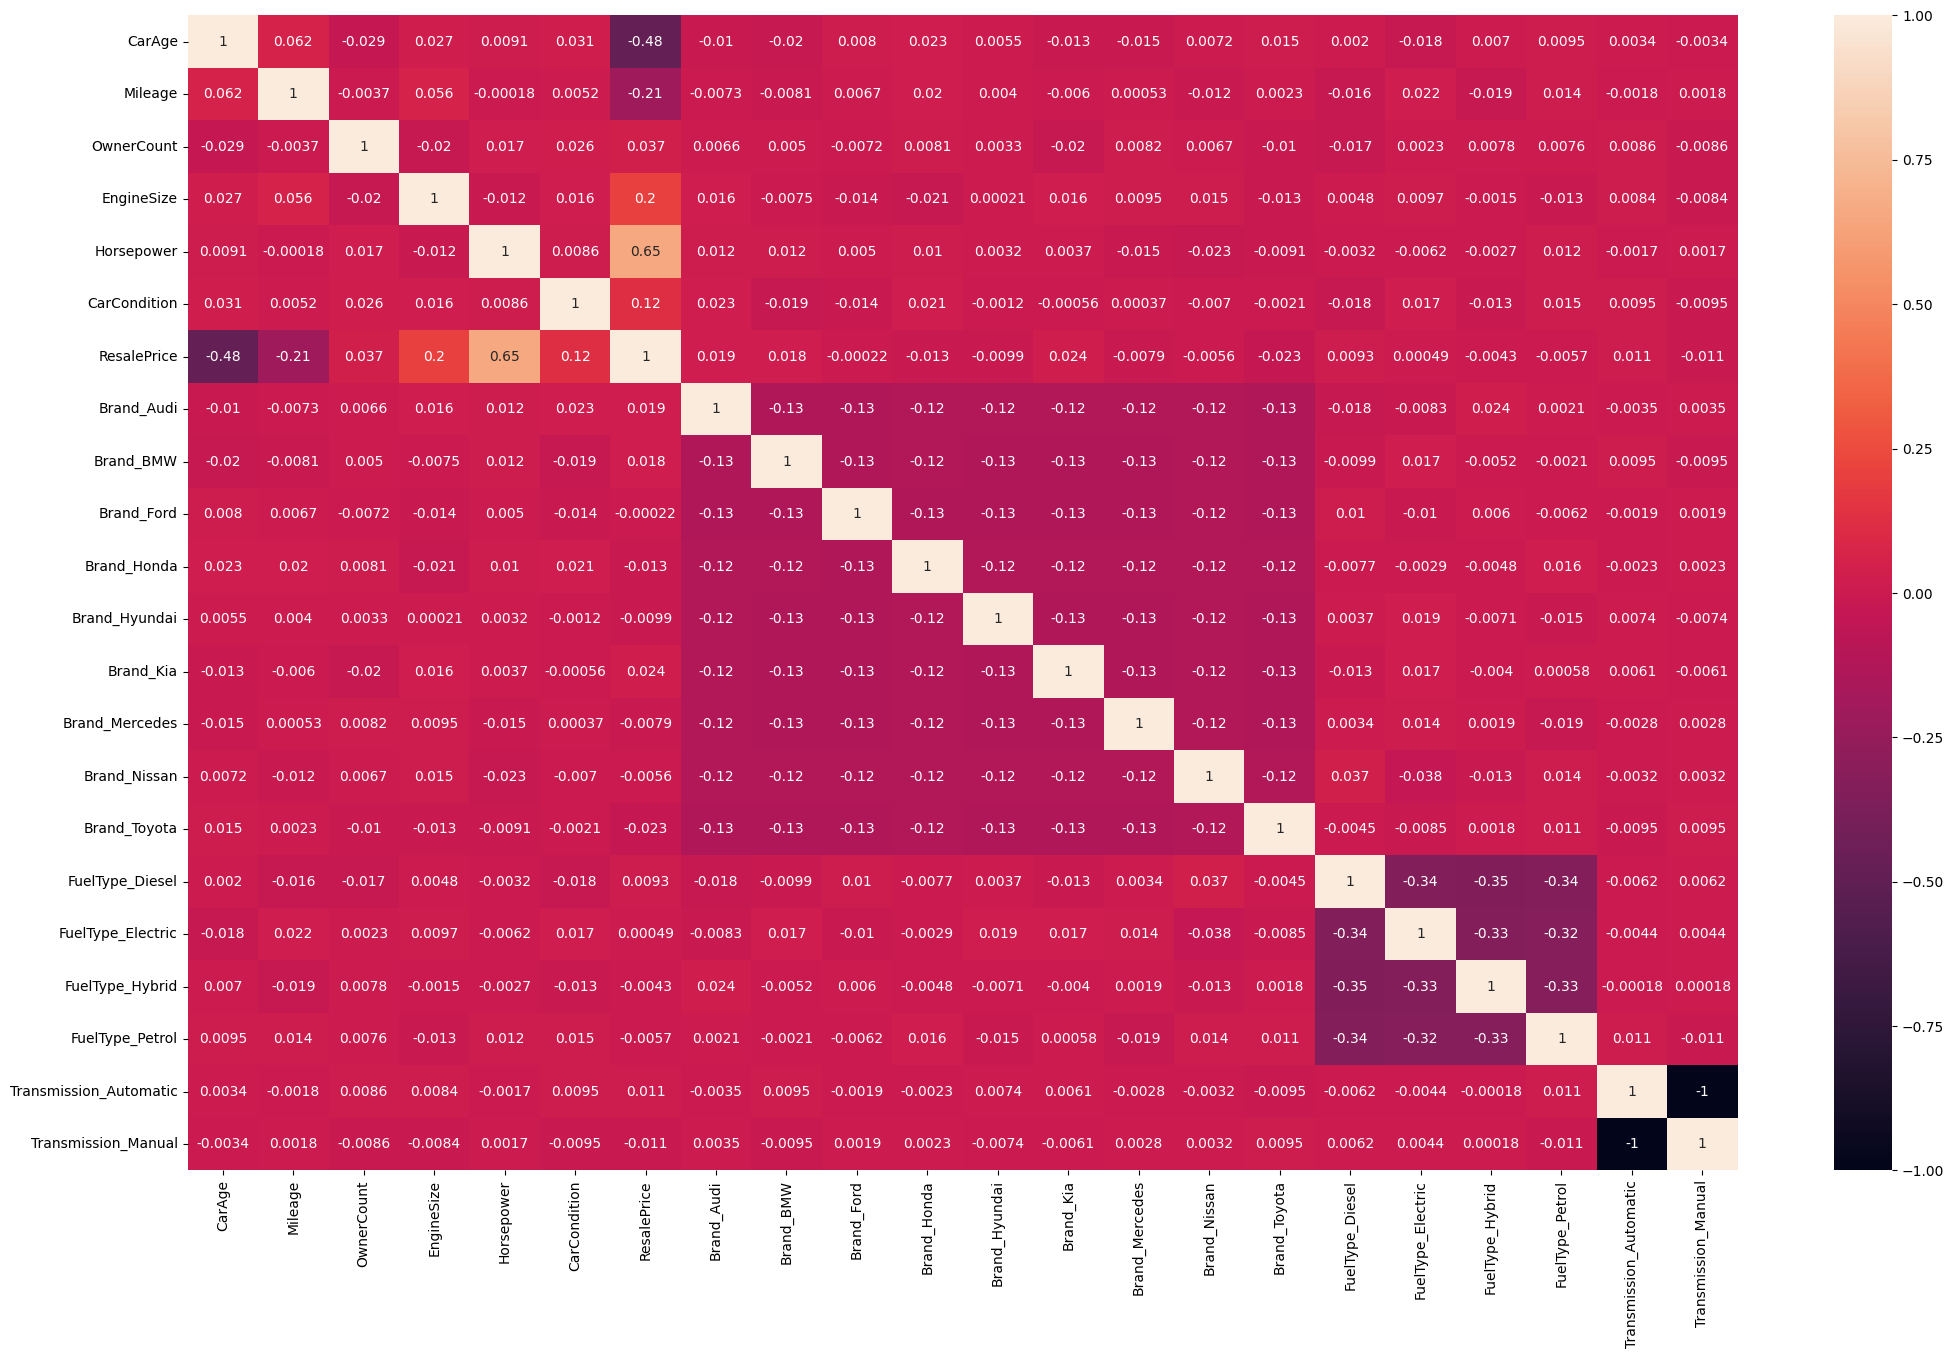

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(car_ds_1.corr(),annot=True)

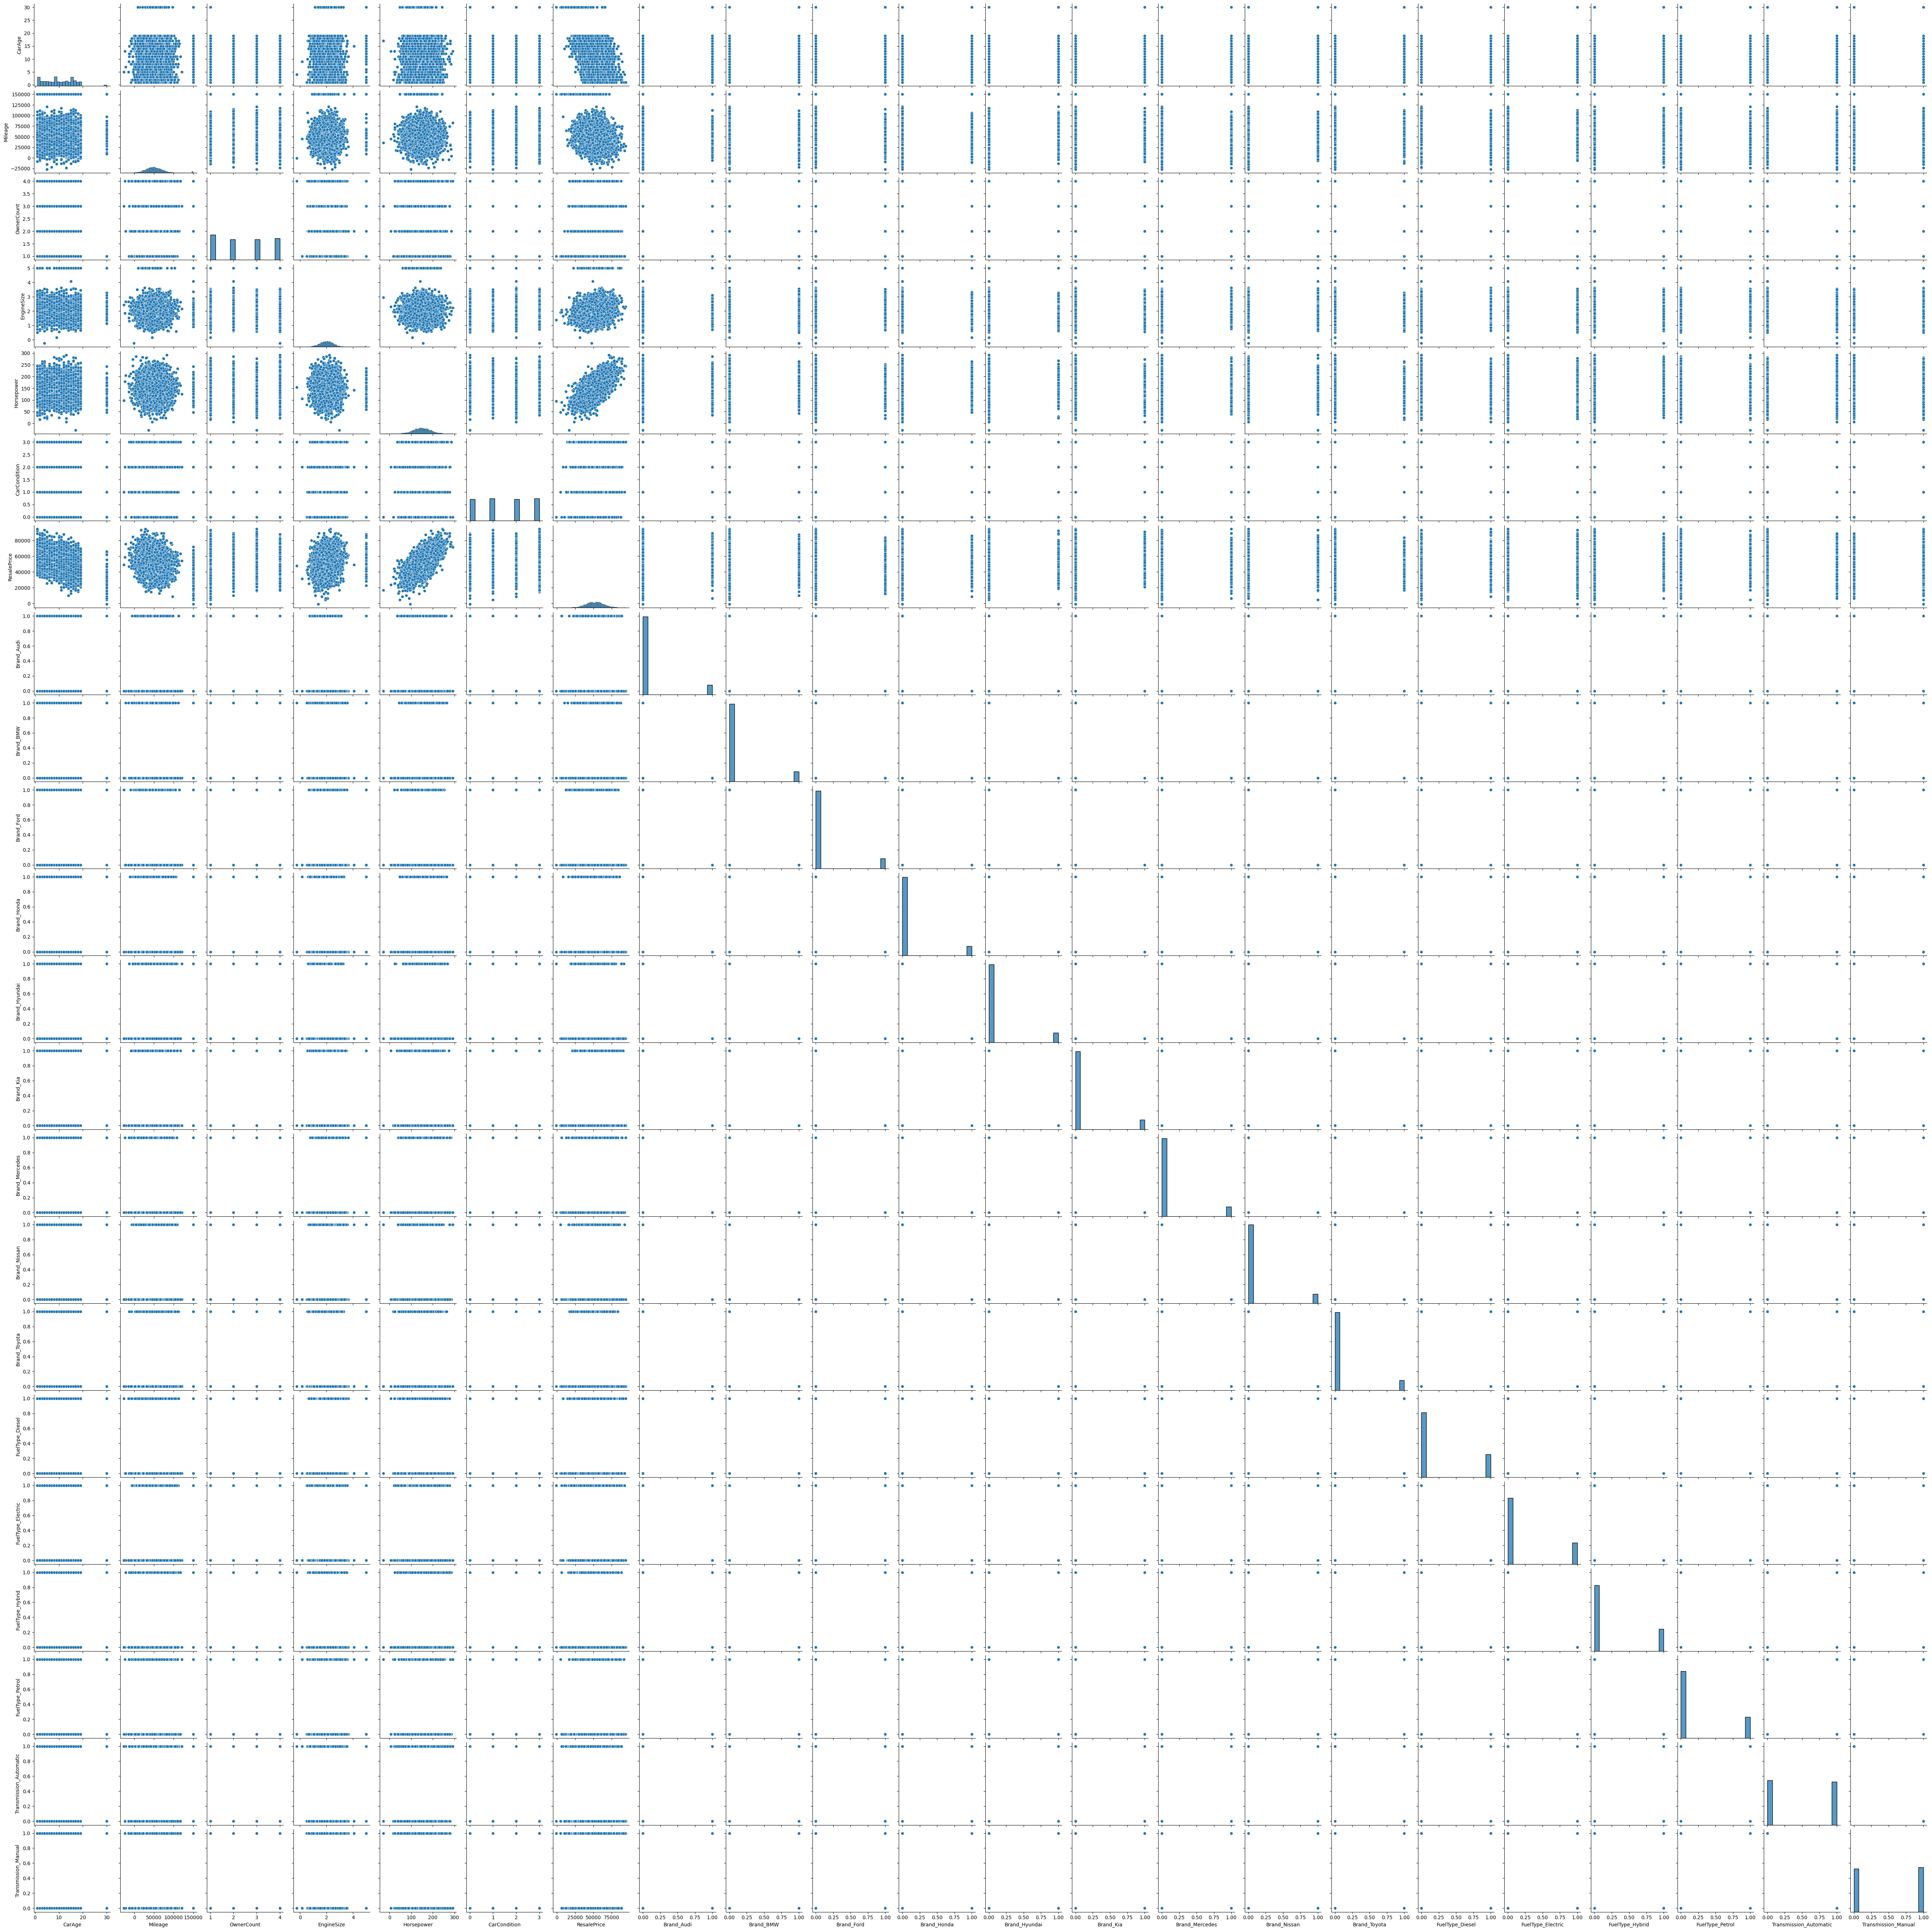

In [ ]:
sns.pairplot(car_ds_1)

<Axes: >

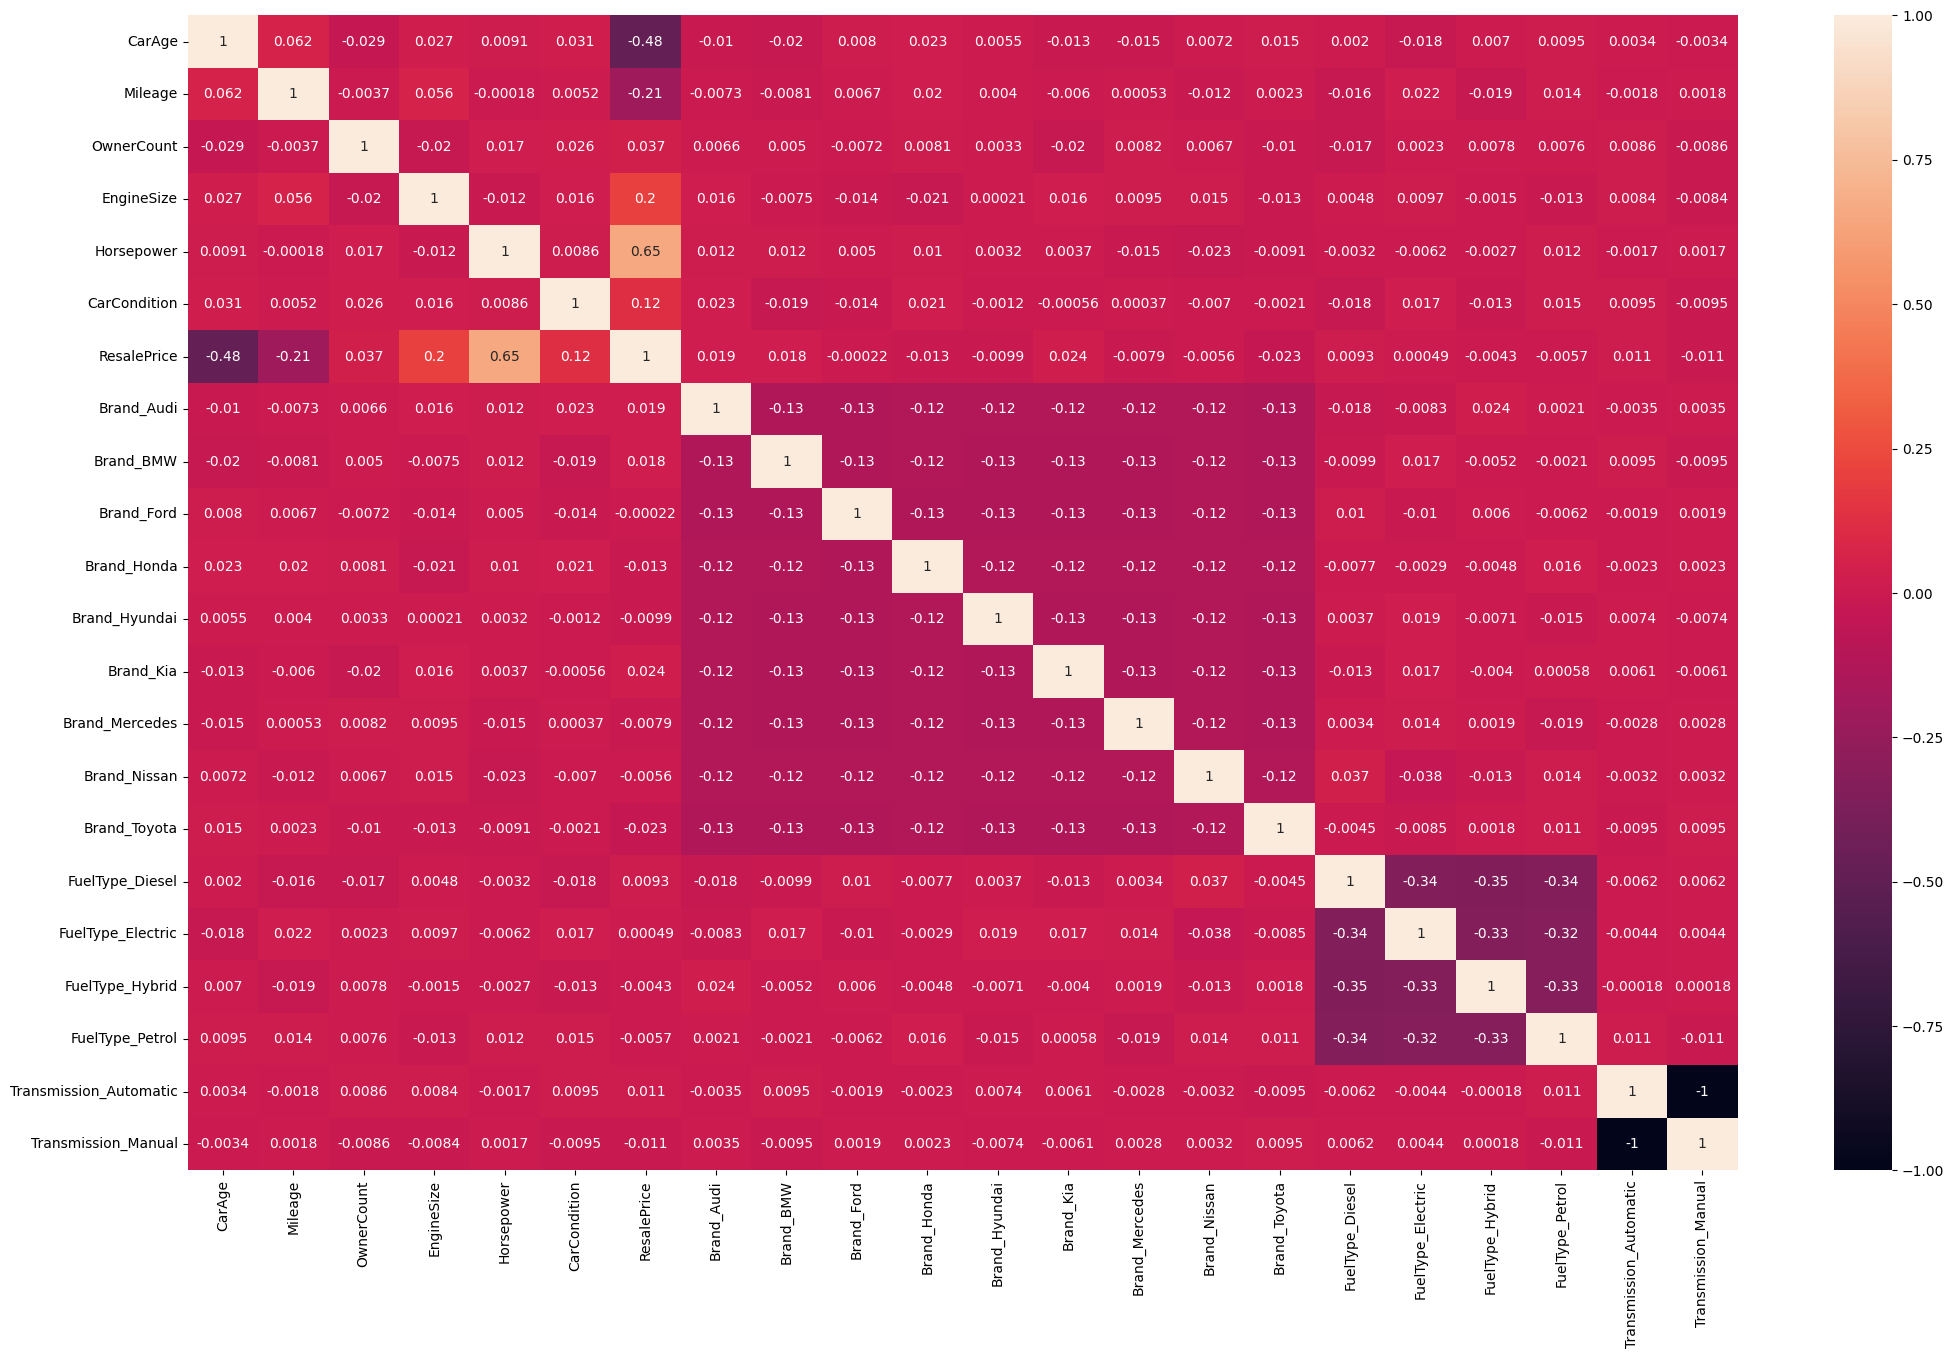

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(car_ds_1.corr(),annot=True)

In [ ]:
orig_Data.select_dtypes(exclude='object').corr()

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  \
CarAge       1.000000  0.061936   -0.028693    0.027316    0.009051   
Mileage      0.061936  1.000000   -0.003691    0.055866   -0.000176   
OwnerCount  -0.028693 -0.003691    1.000000   -0.020292    0.017384   
EngineSize   0.027316  0.055866   -0.020292    1.000000   -0.011504   
Horsepower   0.009051 -0.000176    0.017384   -0.011504    1.000000   
ResalePrice -0.477215 -0.210357    0.037084    0.204210    0.654101   

             ResalePrice  
CarAge         -0.477215  
Mileage        -0.210357  
OwnerCount      0.037084  
EngineSize      0.204210  
Horsepower      0.654101  
ResalePrice     1.000000

TEST-Modeling1

In [ ]:
orig_Data_X=orig_Data.select_dtypes(exclude='object').drop(columns='ResalePrice')

In [ ]:
orig_Data_X.dtypes

CarAge          int64
Mileage       float64
OwnerCount    float64
EngineSize    float64
Horsepower    float64
dtype: object

In [ ]:
orig_Data_X.corr()

CarAge   Mileage  OwnerCount  EngineSize  Horsepower
CarAge      1.000000  0.061936   -0.028693    0.027316    0.009051
Mileage     0.061936  1.000000   -0.003691    0.055866   -0.000176
OwnerCount -0.028693 -0.003691    1.000000   -0.020292    0.017384
EngineSize  0.027316  0.055866   -0.020292    1.000000   -0.011504
Horsepower  0.009051 -0.000176    0.017384   -0.011504    1.000000

In [ ]:
orig_Data.select_dtypes(exclude='object').corr()

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  \
CarAge       1.000000  0.061936   -0.028693    0.027316    0.009051   
Mileage      0.061936  1.000000   -0.003691    0.055866   -0.000176   
OwnerCount  -0.028693 -0.003691    1.000000   -0.020292    0.017384   
EngineSize   0.027316  0.055866   -0.020292    1.000000   -0.011504   
Horsepower   0.009051 -0.000176    0.017384   -0.011504    1.000000   
ResalePrice -0.477215 -0.210357    0.037084    0.204210    0.654101   

             ResalePrice  
CarAge         -0.477215  
Mileage        -0.210357  
OwnerCount      0.037084  
EngineSize      0.204210  
Horsepower      0.654101  
ResalePrice     1.000000

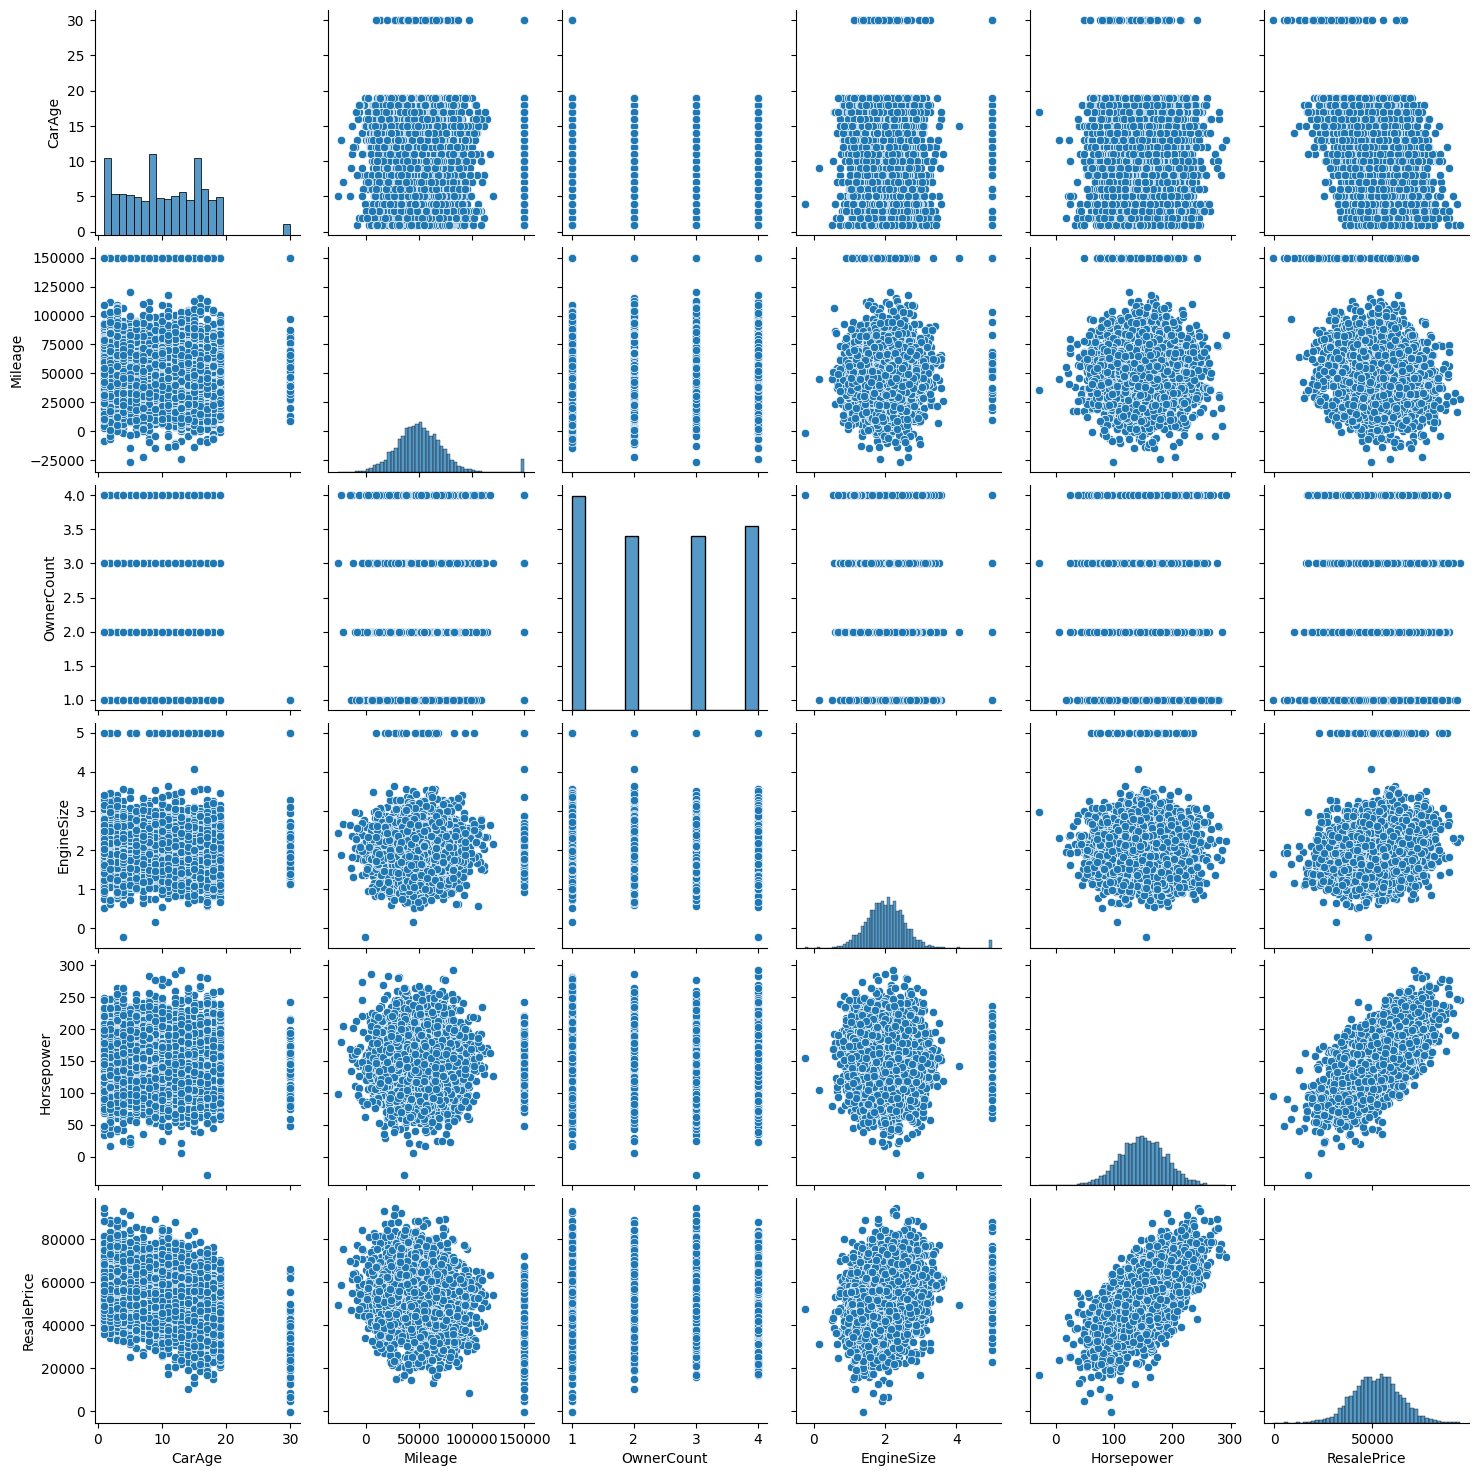

In [ ]:
sns.pairplot(orig_Data[num_data.columns])

In [ ]:
orig_Data_y=orig_Data['ResalePrice']

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(orig_Data_X,orig_Data_y,test_size=0.3,random_state=99)

In [702]:
train_mode_X,test_mode_X,train_mode_y,test_mode_y=train_test_split(mode_data_X,mode_data_y,test_size=0.3,random_state=99)

In [703]:
model=LinearRegression()

In [ ]:
model.fit()

In [ ]:
model.fit(train_X,train_y)

LinearRegression()

In [692]:
train_X.columns

Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
       'CarCondition', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota', 'FuelType_Diesel', 'FuelType_Electric',
       'FuelType_Hybrid', 'FuelType_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'ResalePrice'],
      dtype='object')

In [694]:
train_mode_X.columns

Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
       'CarCondition', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota', 'FuelType_Diesel', 'FuelType_Electric',
       'FuelType_Hybrid', 'FuelType_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'ResalePrice'],
      dtype='object')

In [704]:
model.fit(train_mode_X,train_mode_y)

LinearRegression()

In [696]:
model.coef_

array([ 5.50563271e-13, -2.58042000e-12,  1.36120058e-13,  1.09148708e-12,
        4.07888784e-12,  5.00114081e-13, -1.36361897e-14,  1.34216667e-14,
        3.62294333e-14, -1.37314549e-14, -1.65864866e-14,  5.11895125e-14,
       -3.14264293e-14,  1.78354305e-14, -4.36072084e-14,  9.65007314e-15,
       -2.49156915e-14, -4.00146010e-15,  1.92295836e-14,  1.71485371e-14,
       -1.71485448e-14,  1.00000000e+00])

In [705]:
model.coef_

array([-5.89104336e+03, -2.34843054e+03,  1.45529449e+02,  2.84292176e+03,
        8.04687247e+03,  1.60002430e+03,  6.09333646e+15,  6.17043134e+15,
        6.22596134e+15,  6.04103336e+15,  6.13465371e+15,  6.13465371e+15,
        6.11921376e+15,  5.96117121e+15,  6.16024449e+15,  9.28471011e+16,
        9.09242116e+16,  9.17132910e+16,  9.03007501e+16,  1.39841612e+15,
        1.39841612e+15])

In [706]:
model.intercept_

np.float64(52176.5690607697)

In [698]:
model.intercept_

np.float64(2.9103830456733704e-11)

<Axes: >

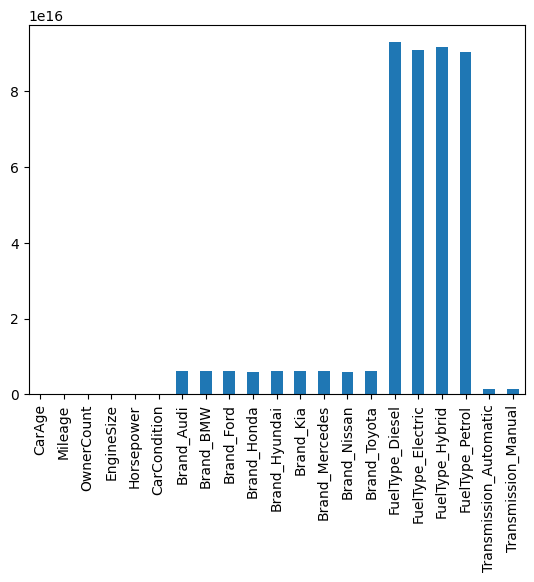

In [707]:
pd.Series(model.coef_,index=train_mode_X.columns).plot(kind='bar')

In [ ]:
model.coef_

array([-9.79616732e+02, -9.74314376e-02,  1.57744731e+02,  5.00664768e+03,
        2.01520018e+02])

In [ ]:
model.intercept_

np.float64(26464.831232842)

<Axes: >

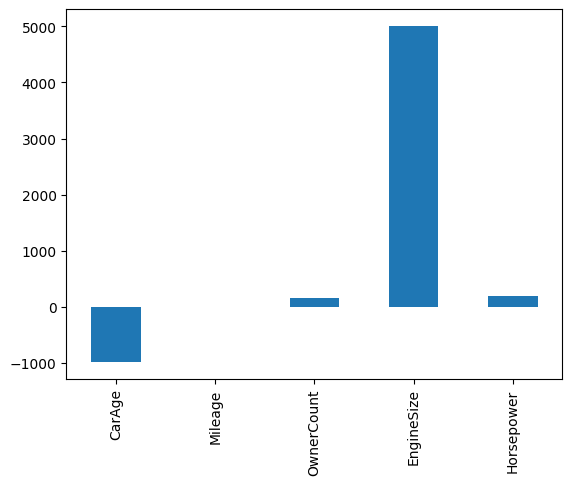

In [ ]:
pd.Series(model.coef_,index=train_X.columns).plot(kind='bar')

In [708]:
train_pred=model.predict(train_X)
test_pred=model.predict(test_X)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ResalePrice


In [710]:
train_pred_mode = model.predict(train_mode_X)
test_pred_mode= model.predict(test_mode_X)

In [712]:
train_pred_mode

array([74368.56906077, 41056.56906077, 56048.56906077, ...,
       38144.56906077, 48992.56906077, 50864.56906077])

In [711]:
train_pred

array([74262.38156077, 40962.38156077, 56058.38156077, ...,
       38114.38156077, 49002.38156077, 51042.38156077])

In [ ]:
def eval (actual,pred,source):
    print(source,': ',"MSE")
    print(mean_squared_error(actual,pred))
    MSE=mean_squared_error(actual,pred)
    print(source,': ',"MAE")
    print(mean_absolute_error(actual,pred))
    MAE=mean_absolute_error(actual,pred)
    print(source,': ',"MAPE")
    print(mean_absolute_percentage_error(actual,pred))
    MAPE=mean_absolute_percentage_error(actual,pred)
    print(source,': ',"RMSE")
    print(np.sqrt(mean_squared_error(actual,pred)))
    RMSE=np.sqrt(mean_squared_error(actual,pred))
    print(source,': ',"R2_Score")
    print(r2_score(actual,pred))
    R2_Score=r2_score(actual,pred)
    return(float(MSE),float(RMSE),float(MAE),float(MAPE),R2_Score)


In [ ]:
train_res=eval(train_y,train_pred,"Train Dataset")
print('======================================')
test_res=eval(test_y,test_pred,"Train Dataset")

Train Dataset :  MSE
36105733.312467724
Train Dataset :  MAE
4821.429152031506
Train Dataset :  MAPE
0.10360851934477057
Train Dataset :  RMSE
6008.804649218322
Train Dataset :  R2_Score
0.756438650434681
Train Dataset :  MSE
38133122.316330545
Train Dataset :  MAE
4880.61791858817
Train Dataset :  MAPE
0.10059871051705126
Train Dataset :  RMSE
6175.202208537834
Train Dataset :  R2_Score
0.7325767202152893


In [713]:
train_res=eval(train_mode_y,train_pred_mode,"Train Dataset")
print('======================================')
test_res=eval(test_mode_y,test_pred_mode,"Train Dataset")

Train Dataset :  MSE
33513496.4601848
Train Dataset :  MAE
4645.53381352363
Train Dataset :  MAPE
0.09885325543939985
Train Dataset :  RMSE
5789.084250568893
Train Dataset :  R2_Score
0.7739253110896791
Train Dataset :  MSE
35771646.25181274
Train Dataset :  MAE
4717.207107914013
Train Dataset :  MAPE
0.09788231630222319
Train Dataset :  RMSE
5980.940248139313
Train Dataset :  R2_Score
0.7491374851342426


In [714]:
res=[train_res]+[test_res]

In [715]:
res

[(33513496.4601848,
  5789.084250568893,
  4645.53381352363,
  0.09885325543939985,
  0.7739253110896791),
 (35771646.25181274,
  5980.940248139313,
  4717.207107914013,
  0.09788231630222319,
  0.7491374851342426)]

In [ ]:
pd.DataFrame(res,columns=['MSE','RMSE','MAE','MAPE','R2'],index=['Train','Test'])

MSE         RMSE          MAE      MAPE        R2
Train  3.610573e+07  6008.804649  4821.429152  0.103609  0.756439
Test   3.813312e+07  6175.202209  4880.617919  0.100599  0.732577

In [716]:
pd.DataFrame(res,columns=['MSE','RMSE','MAE','MAPE','R2'],index=['Train','Test'])

MSE         RMSE          MAE      MAPE        R2
Train  3.351350e+07  5789.084251  4645.533814  0.098853  0.773925
Test   3.577165e+07  5980.940248  4717.207108  0.097882  0.749137

TEST-Modeling2: With scaled features

In [ ]:
car_ds_1_X=car_ds_1.drop(columns=['ResalePrice'])

In [ ]:
car_ds_1_y=orig_Data['ResalePrice']

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(car_ds_1_X,car_ds_1_y,test_size=0.3,random_state=99)

In [ ]:
train_X.shape

(3266, 21)

In [ ]:
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
model.coef_

array([-5.88810846e+03, -2.34061817e+03,  1.64675934e+02,  2.85713685e+03,
        8.02526210e+03,  1.59009030e+03,  3.32555163e+16,  3.36762759e+16,
        3.39793412e+16,  3.29700624e+16,  3.34810128e+16,  3.34810128e+16,
        3.33967464e+16,  3.25341998e+16,  3.36206792e+16, -6.46321343e+15,
       -6.32935847e+15, -6.38428736e+15, -6.28595846e+15, -1.67913779e+16,
       -1.67913779e+16])

In [ ]:
model.intercept_

np.float64(52178.3815607697)

<Axes: >

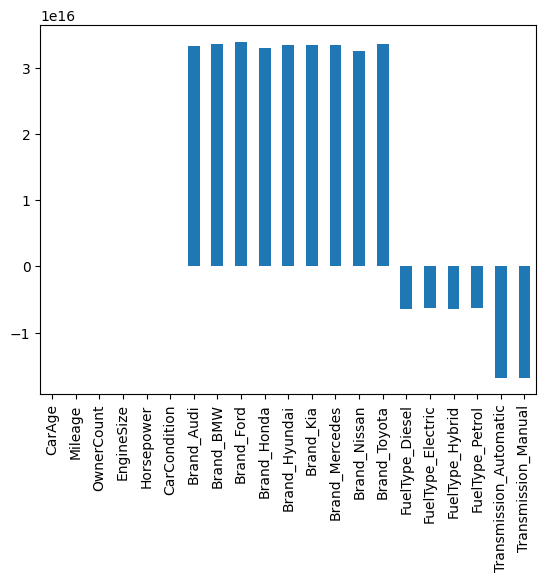

In [ ]:
pd.Series(model.coef_,index=train_X.columns).plot(kind='bar')

In [ ]:
train_pred=model.predict(train_X)
test_pred=model.predict(test_X)

In [ ]:
train_res=eval(train_y,train_pred,"Train Dataset")
print('======================================')
test_res=eval(test_y,test_pred,"Train Dataset")

Train Dataset :  MSE
33510890.363545902
Train Dataset :  MAE
4644.839255617791
Train Dataset :  MAPE
0.09879960539228319
Train Dataset :  RMSE
5788.859159069764
Train Dataset :  R2_Score
0.7739428912454116
Train Dataset :  MSE
35717074.99842644
Train Dataset :  MAE
4713.12836004654
Train Dataset :  MAPE
0.09780409227695537
Train Dataset :  RMSE
5976.376410369952
Train Dataset :  R2_Score
0.7495201871705843


In [ ]:
res=[train_res]+[test_res]

In [ ]:
pd.DataFrame(res,columns=['MSE','RMSE','MAE','MAPE','R2'],index=['Train','Test'])

MSE         RMSE          MAE      MAPE        R2
Train  3.351089e+07  5788.859159  4644.839256  0.098800  0.773943
Test   3.571707e+07  5976.376410  4713.128360  0.097804  0.749520

In [ ]:
car_ds_1_X.head()

CarAge   Mileage  OwnerCount  EngineSize  Horsepower  CarCondition  \
0  0.795836  0.789811    0.488897   -0.310932   -0.827016     -1.347687   
1  0.122484  0.855030    1.361247    0.736355    0.005449     -0.453700   
2 -0.382531 -0.525019   -0.383452   -0.643607   -0.231846     -0.453700   
3 -0.550869 -0.733508    0.488897    1.315501    0.179413     -1.347687   
4  1.469189  0.005638    1.361247    0.666281    1.177063     -0.453700   

   Brand_Audi  Brand_BMW  Brand_Ford  Brand_Honda  ...  Brand_Kia  \
0   -0.351846   -0.35759   -0.361770     2.873663  ...  -0.354916   
1   -0.351846   -0.35759   -0.361770     2.873663  ...  -0.354916   
2   -0.351846   -0.35759    2.764189    -0.347988  ...  -0.354916   
3   -0.351846   -0.35759   -0.361770    -0.347988  ...   2.817569   
4   -0.351846   -0.35759   -0.361770    -0.347988  ...  -0.354916   

   Brand_Mercedes  Brand_Nissan  Brand_Toyota  FuelType_Diesel  \
0       -0.353766     -0.342154     -0.356827        -0.595337   
1       -0.353766     -0.342154     -0.356827        -0.595337   
2       -0.353766     -0.342154     -0.356827        -0.595337   
3       -0.353766     -0.342154     -0.356827        -0.595337   
4        2.826724     -0.342154     -0.356827        -0.595337   

   FuelType_Electric  FuelType_Hybrid  FuelType_Petrol  \
0           1.752585        -0.580485        -0.562995   
1           1.752585        -0.580485        -0.562995   
2          -0.570586         1.722698        -0.562995   
3          -0.570586        -0.580485         1.776216   
4          -0.570586        -0.580485         1.776216   

   Transmission_Automatic  Transmission_Manual  
0               -0.986800             0.986800  
1                1.013377            -1.013377  
2               -0.986800             0.986800  
3                1.013377            -1.013377  
4                1.013377            -1.013377  

[5 rows x 21 columns]

In [ ]:
car_ds_1_X.columns

Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
       'CarCondition', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota', 'FuelType_Diesel', 'FuelType_Electric',
       'FuelType_Hybrid', 'FuelType_Petrol', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [717]:
car_ds_1_y

0       37380.232721
1       58279.184367
2       52420.515613
3       54195.804720
4       57287.511089
            ...     
4661    56808.958580
4662    56224.633133
4663    68440.018358
4664    64847.894059
4665    43329.185500
Name: ResalePrice, Length: 4666, dtype: float64

Feature Selection

In [753]:
select_k_best=SelectKBest(f_regression,k=6)

In [754]:
seelct_k_col=SelectKBest(f_regression,k=7)

In [755]:
X_mode_select = select_k_best.fit_transform(mode_data_X,mode_data_y)

In [757]:
X_sel_col = seelct_k_col.fit_transform(mode_data_X,mode_data_y)

In [759]:
seelct_k_col.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])

In [761]:
chk = [mode_data_X.columns] + [seelct_k_col.get_support()]

In [763]:
chk

[Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
        'CarCondition', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
        'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
        'Brand_Toyota', 'FuelType_Diesel', 'FuelType_Electric',
        'FuelType_Hybrid', 'FuelType_Petrol', 'Transmission_Automatic',
        'Transmission_Manual'],
       dtype='object'),
 array([ True,  True,  True,  True,  True,  True, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False])]

In [770]:
chk_df=pd.DataFrame(chk,index=['col_name','best_Col']).T

In [772]:
chk_df[chk_df['best_Col']==True]

col_name best_Col
0         CarAge     True
1        Mileage     True
2     OwnerCount     True
3     EngineSize     True
4     Horsepower     True
5   CarCondition     True
11     Brand_Kia     True

In [ ]:
mode_data_X[]

In [726]:
select_k_best.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [727]:
mode_data_X.columns

Index(['CarAge', 'Mileage', 'OwnerCount', 'EngineSize', 'Horsepower',
       'CarCondition', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes', 'Brand_Nissan',
       'Brand_Toyota', 'FuelType_Diesel', 'FuelType_Electric',
       'FuelType_Hybrid', 'FuelType_Petrol', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [741]:
type(X_mode_select)

numpy.ndarray

In [728]:
train_X,test_X,train_y,test_y = train_test_split(mode_data_X,mode_data_y,test_size=0.3,random_state=99)

In [730]:
train_X.shape

(3266, 21)

In [735]:
model.fit(train_X,train_y)

LinearRegression()

In [745]:
model.coef_

array([-5.89104336e+03, -2.34843054e+03,  1.45529449e+02,  2.84292176e+03,
        8.04687247e+03,  1.60002430e+03,  6.09333646e+15,  6.17043134e+15,
        6.22596134e+15,  6.04103336e+15,  6.13465371e+15,  6.13465371e+15,
        6.11921376e+15,  5.96117121e+15,  6.16024449e+15,  9.28471011e+16,
        9.09242116e+16,  9.17132910e+16,  9.03007501e+16,  1.39841612e+15,
        1.39841612e+15])

In [738]:
model.intercept_

np.float64(52176.5690607697)

In [742]:
train_res=eval(train_y,train_pred,"Train Dataset")
print('======================================')
test_res=eval(test_y,test_pred,"Train Dataset")

Train Dataset :  MSE
33510890.363545902
Train Dataset :  MAE
4644.839255617791
Train Dataset :  MAPE
0.09879960539228319
Train Dataset :  RMSE
5788.859159069764
Train Dataset :  R2_Score
0.7739428912454116
Train Dataset :  MSE
35717074.99842644
Train Dataset :  MAE
4713.12836004654
Train Dataset :  MAPE
0.09780409227695537
Train Dataset :  RMSE
5976.376410369952
Train Dataset :  R2_Score
0.7495201871705843


In [749]:
res = [train_res] + [test_res]

In [750]:
res

[(33510890.363545902,
  5788.859159069764,
  4644.839255617791,
  0.09879960539228319,
  0.7739428912454116),
 (35717074.99842644,
  5976.376410369952,
  4713.12836004654,
  0.09780409227695537,
  0.7495201871705843)]

In [752]:
pd.DataFrame(res, columns=['MSE','RMSE','MAE','MAPE','R2 Score'], index = ['Train', 'Test'])

MSE         RMSE          MAE      MAPE  R2 Score
Train  3.351089e+07  5788.859159  4644.839256  0.098800  0.773943
Test   3.571707e+07  5976.376410  4713.128360  0.097804  0.749520